In [1]:
import pandas as pd
import os
from ROOT import TFile
from root_numpy import tree2array
from IPython.display import display
import numpy as np



from matplotlib import pyplot as plt

Welcome to JupyROOT 6.16/00


/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.17.2 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


### read root files

In [2]:
def read_root_file(file):
    rfile = TFile(file) #root file
    intree = rfile.Get("Nominal") #get tree from root file
    array = tree2array(intree)
    df = pd.DataFrame(array)
    return df

## Getting dataframes from root files

In [3]:
root_file_path = "../processed_data/all_2000_full.root"
#data_file_path = "../raw_data/data.root"
df_base = read_root_file(root_file_path)
#df_data =read_root_file(data_file_path)
#display(df)

## Event variables

In [4]:
print(df_base.columns)

Index(['sample', 'EventWeightNoXSec', 'EventWeight', 'EventNumber', 'm_region',
       'm_FJNbtagJets', 'm_AntiBTag', 'm_AntiTauTag', 'm_FJpt', 'm_FJeta',
       'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm',
       'm_DTpt_Eff', 'm_DTeta_Eff', 'm_DTphi_Eff', 'm_DTm_Eff',
       'm_DTpt_ConEff', 'm_DTeta_ConEff', 'm_DTphi_ConEff', 'm_DTm_ConEff',
       'm_DTpt_ConVis', 'm_DTeta_ConVis', 'm_DTphi_ConVis', 'm_DTm_ConVis',
       'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt', 'm_hhm_Coll', 'm_hhm_Eff', 'm_hhm_ConEff', 'm_hhm_ConVis'],
      dtype='object')


## Filtering per region

In [15]:
def get_histogram(region_name, tag_name, feature_name, h_min, h_max,
                 stack_list, weights_list, names, signal_values, signal_weights, signal_name,
                 data_values):
    
    fig = plt.figure(figsize=(10, 10))
    grid = plt.GridSpec(5, 2, hspace=0.25)
    his = fig.add_subplot(grid[:-1, :])
    
    plt.title("{}, {} tag, {}".format(region_name,tag_name,feature_name))   
    plt.grid()
   
    n_back, bin_edges_back, patches_back = plt.hist(stack_list, range=(hmin,hmax), weights = weights_list, bins=30,
             stacked=True,histtype =  'barstacked',label=names)
    
    back_array = np.array(n_back)
    
    sum_back_per_bin = back_array.sum(axis=0)
    
    
    n_signal, bin_edges_signal,patches_signal = plt.hist(signal_values, range=(hmin,hmax), 
             weights = signal_weights, bins=30,label=signal_name,fill=False,color="red")
    bin_centres = (bin_edges_back[:-1] + bin_edges_back[1:])/2.
    
    counts_data,bin_edges_data = np.histogram(data_values,range=(hmin,hmax), 
              bins=30)
    mask_0_data = counts_data != 0
    
    new_array = (counts_data - sum_back_per_bin)/sum_back_per_bin
    
    
    
    print("DATA", counts_data)
    print("BACK", sum_back_per_bin)
    print("DIFF", new_array)
    
    plt.errorbar(bin_centres[mask_0_data], counts_data[mask_0_data],yerr=True, fmt="ok",label="data")
    plt.legend(loc="upper right")
    plt.ylabel('Events')
    
    
    mask_0_back = sum_back_per_bin != 0
    
    
    res = fig.add_subplot(grid[-1, :], sharex=his)
    plt.errorbar(bin_centres[mask_0_data], new_array[mask_0_data], xerr=False, fmt="ok")
    res.set_ylabel('(data-bkg)/bkg')
    res.set_xlabel(feature_name)
    #res.set_ylim((-3,3))
    res.grid()
    
    
    plotname = "../histograms/"+region_name+"_"+tag_name+ "_"+feature_name +".png"
    plt.savefig(plotname)  
    plt.show()

In [16]:
def get_stacks(d,feature):
    stack_list = []
    weights_list = []
    names = []
    for samp, number in d.items():
        df_per_samp = df1[df1["sample"] == samp] #dataframe containing 
                                                 #only one kind of sample
        print(samp, number, df_per_samp["EventWeight"].values.sum())
        stack_list.append(df_per_samp[feature].values)
        weights_list.append(df_per_samp["EventWeight"].values)
        names.append(samp)
    return stack_list, weights_list, names


-->df.shape (58008, 38)
::: SR 0 m_AntiBTag
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509


/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 330]
BACK [   7.36814941    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.         6260.22723715]
DIFF [-1.                 nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan -0.94728626]


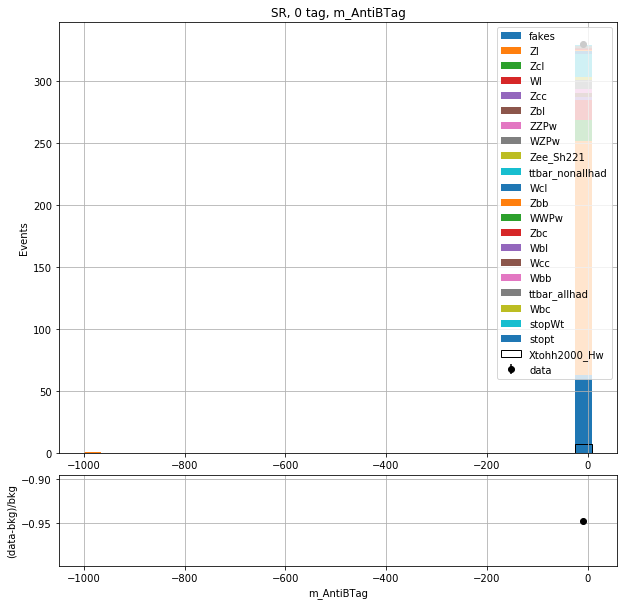

::: SR 0 m_AntiTauTag
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [330   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [4944.93502639    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.         1322.62789536]
DIFF

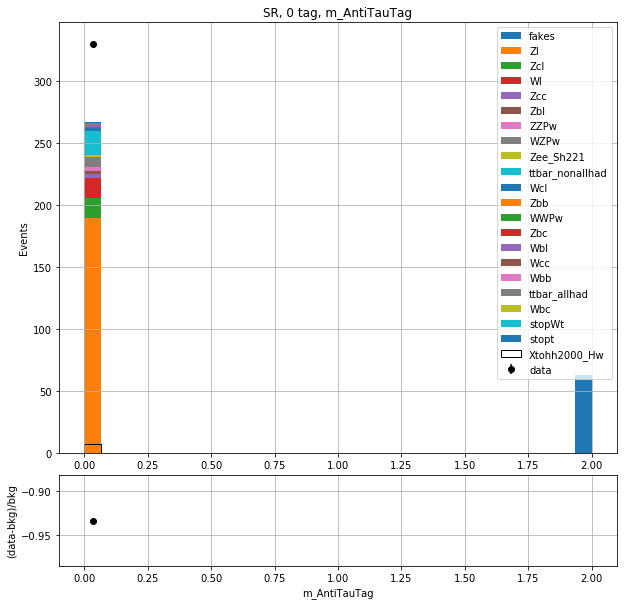

::: SR 0 m_FJpt
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [  3  14  61 100  57  44  20  13   8   4   0   2   1   1   1   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [ 7.85116517e+01  2.15834572e+02  1.09985185e+03  1.88554664e+03
  1.16480833e+03  6.79684807e+02  4.82850530e+02  2.57392033e+02
  1.60314287e+02  1.02576195e+02  5.33173193e+01  3.32670513e+01
  2.37799134e+01  1.22502413e+01  5.19165799e+00  4.82109225e+00
  2.43480754e+00  2.17452407e+00  7.21370697e-01  7.60967672e-01
  4.12113190e-01  4.85549927e-01  2.83126831e-02  2.00759888e-01
  1.348

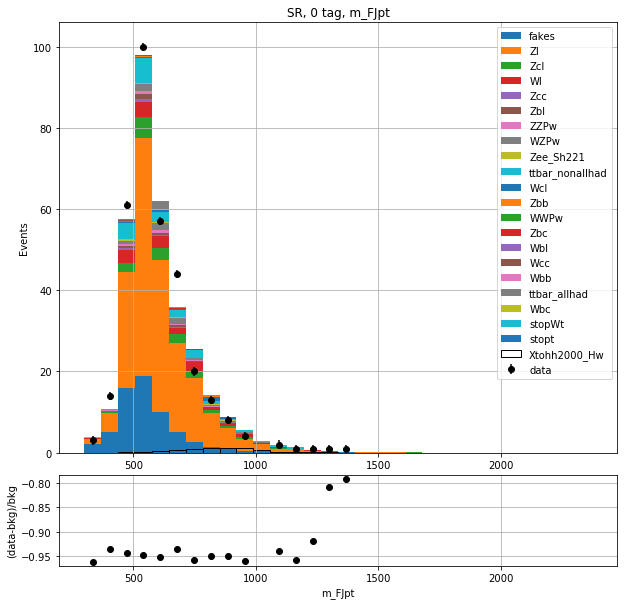

::: SR 0 m_FJeta
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 2  6  3  2  7 10  7 15 13 20 11 13 12 15 31 16 15 16 13 17 17 14  9  9
 11  9  6  3  4  4]
BACK [ 53.47831359  75.94174396  65.07940083 132.98829962 166.81231013
 184.8554536  198.87240716 226.76003345 244.04630695 255.77291551
 302.68571942 312.45222417 294.3261361  333.1106872  321.44484645
 319.75734979 299.3310692  296.78500515 290.15427101 276.82683185
 266.91271463 252.01728621 224.26319992 215.72016168 176.08984718
 148.85233361 111.70284182  88.76768935  80.36526397  51.41580939]
DIFF [-0.96260166 -0.92099207

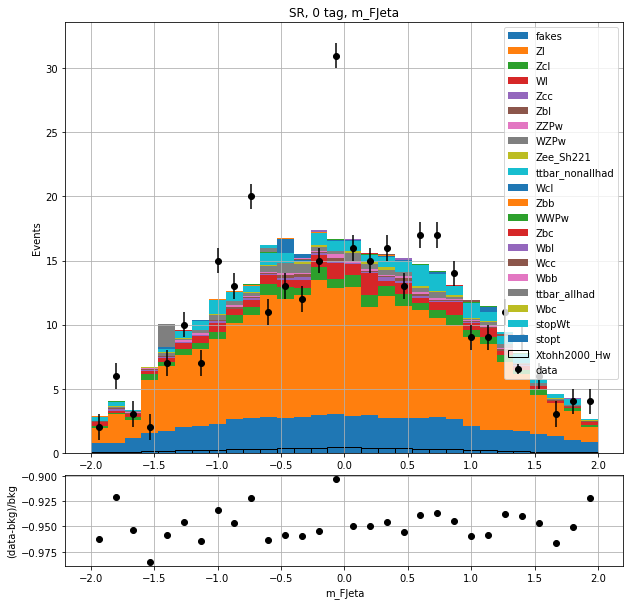

::: SR 0 m_FJphi
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [15 12 17 14 10 11 12 16  8 10 13 12  6  5  8 12 13 12 12  8  7  9 16 13
 14 14  9 11  8  3]
BACK [200.95450321 244.20879851 199.80316401 191.8452513  192.74323232
 208.88966938 181.59724049 225.35993962 211.91041934 227.59645814
 234.84011304 193.96529442 221.79154634 199.60466135 184.15603366
 161.67759347 216.49539995 215.1291932  207.0990527  212.6931314
 222.13792518 206.28665268 211.76177241 205.42355162 206.01200408
 197.79567602 207.86184686 225.94774514 200.58063889 251.43716854]
DIFF [-0.92535624 -0.95086172 

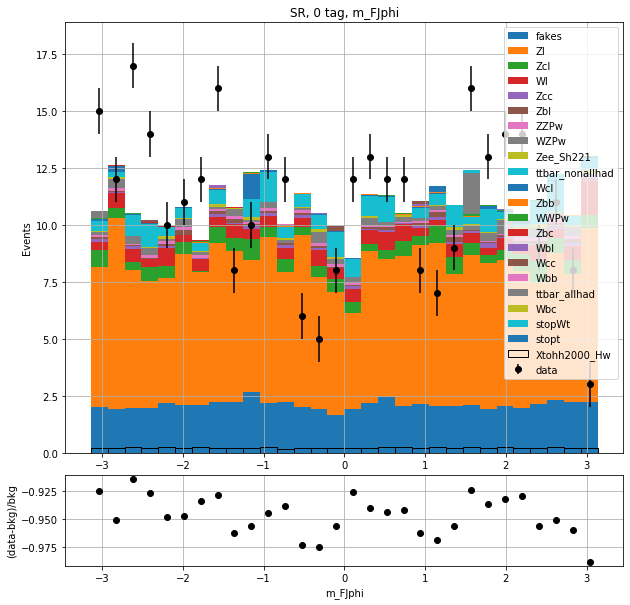

::: SR 0 m_FJm
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [95 52 40 35 24 23 15 14 14  6  6  3  2  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [1.92272898e+03 1.01831077e+03 7.51601009e+02 5.78222605e+02
 4.70932509e+02 4.10719634e+02 3.02803812e+02 2.32873652e+02
 1.91254231e+02 1.42349573e+02 9.19975755e+01 5.20189664e+01
 4.29431888e+01 2.06226327e+01 1.38030157e+01 9.90886664e+00
 5.15928030e+00 4.16502762e+00 2.05531120e+00 9.66953993e-01
 7.59143829e-01 7.16756821e-01 1.50743484e-01 6.52923584e-02
 2.58880615e-01 1.91238403e-01 0.00000000e+00 0.00000000e+00
 

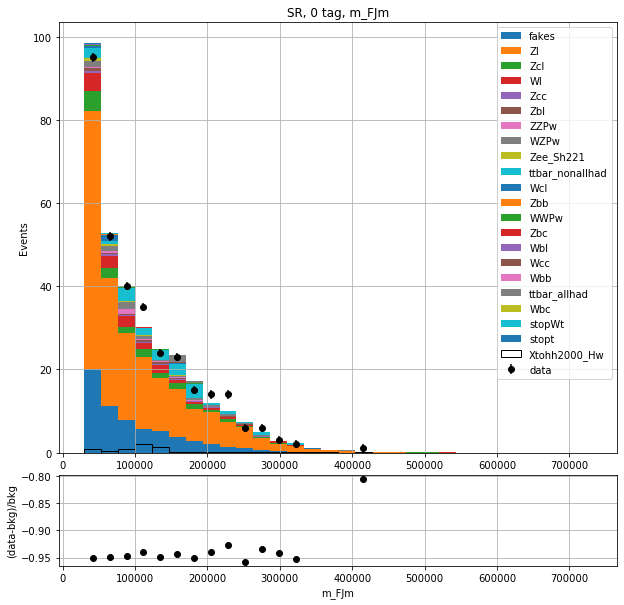

::: SR 0 m_DTpt
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [79 62 66 53 30 17  9  5  6  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.39813937e+03  1.27427452e+03  1.19537305e+03  1.02489667e+03
  6.01431834e+02  3.43639783e+02  1.72239183e+02  1.14909131e+02
  5.37332392e+01  3.83331865e+01  1.87988029e+01  1.14655519e+01
  7.40607643e+00  5.19639945e+00  3.02166629e+00  1.65971869e+00
  8.00258636e-01  6.79218292e-01  1.34275675e-01  5.75038910e-01
  3.44436646e-01  3.16509247e-01  1.64142609e-01  0.00000000e+00
 -1.92260742e-03 -1.28173828e-03  0.0

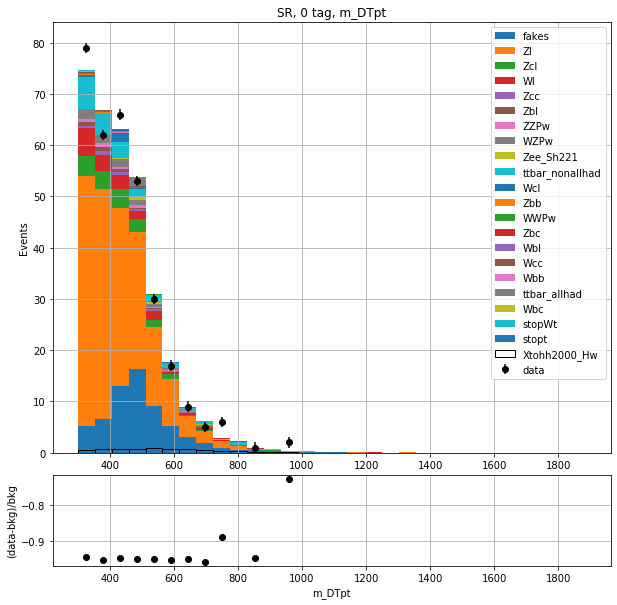

::: SR 0 m_DTeta
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 4  5  7  3  1 12  9  9 13  7 16 12 23 21 16 19 19  9 16 13 16 13 22 12
 13  3  3  7  4  3]
BACK [ 82.1593702   83.27318992 116.36933228  97.89811088  40.72206599
 180.34602664 228.39403972 237.49543195 254.02968074 269.44218364
 289.26364523 280.94836497 325.91959083 302.10805395 315.63548362
 323.67952266 314.98590171 301.91269678 298.62624818 341.65017784
 269.17373404 275.02578247 237.0262145  224.69712567 188.07445723
  44.72653604  80.37634128 121.43115956  84.01536328  58.18960834]
DIFF [-0.95131414 -0.93995667

::: SR 0 m_DTphi
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 7 12 12 14  8  9  7 16 17  8 16  7  9  8  8 16 11 11 12 15 16 11 13  5
 10 13 12  7  6 14]
BACK [183.46193795 214.25192996 203.74477804 208.82078315 209.69490813
 222.50297011 225.26081499 208.14258654 198.14648445 200.46676059
 206.11131862 195.7232755  231.94420096 231.49621394 210.31542915
 232.56792918 218.58646084 196.99010846 206.51082656 192.76504099
 195.88685578 204.01049587 230.39215142 198.3001838  209.25646228
 231.32511802 211.20697141 214.17032117 196.66727337 178.87152171]
DIFF [-0.96184495 -0.94399117

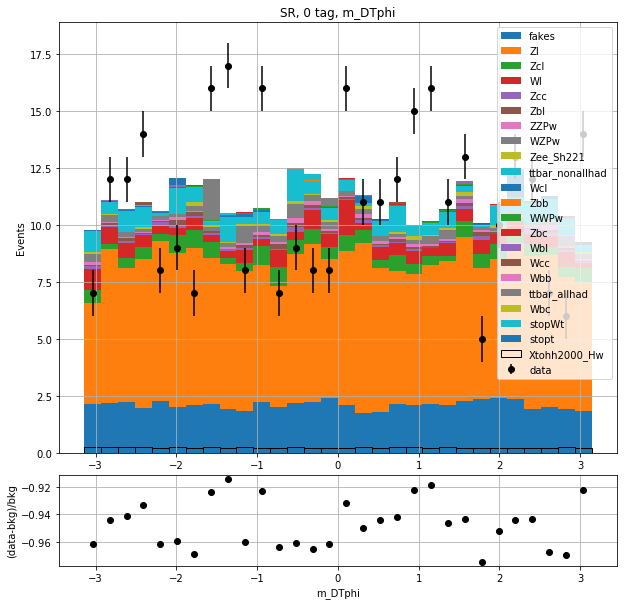

::: SR 0 m_DTm
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [  6  33  99 103  37  15   8  10   6   5   2   1   3   1   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0]
BACK [ 9.13717133e+01  8.46391603e+02  1.84837858e+03  1.78979187e+03
  7.64577016e+02  3.01146871e+02  2.16315614e+02  1.40385991e+02
  9.63949512e+01  6.33587391e+01  4.28474745e+01  2.18936924e+01
  2.00940170e+01  9.72463441e+00  3.37426043e+00  4.30427545e+00
  2.94549298e+00  8.69476318e-01  1.29550552e+00  2.80319214e-01
  7.11170197e-01  5.66207886e-01 -7.04956055e-03  1.51630402e-01
  1.6205

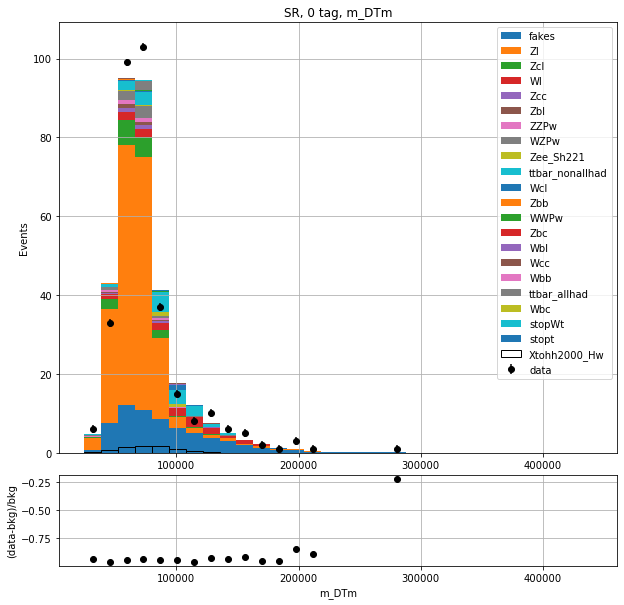

::: SR 0 m_DTpt_Eff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 6 20 61 81 58 45 22 19  9  1  1  3  0  2  1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 9.64421194e+01  4.32017740e+02  1.05056666e+03  1.49400198e+03
  1.17169981e+03  7.72260899e+02  5.09368519e+02  3.12626872e+02
  1.66085780e+02  1.11880112e+02  5.87762718e+01  3.33156283e+01
  2.18108644e+01  1.88153329e+01  6.56753117e+00  5.00922909e+00
  2.42843914e+00  1.12791967e+00  4.85273361e-01  4.76524353e-01
  8.61217916e-01  3.43418121e-01  2.67612457e-01 -9.77325439e-03
  2.51422882e-01 -2.32315063e-03 

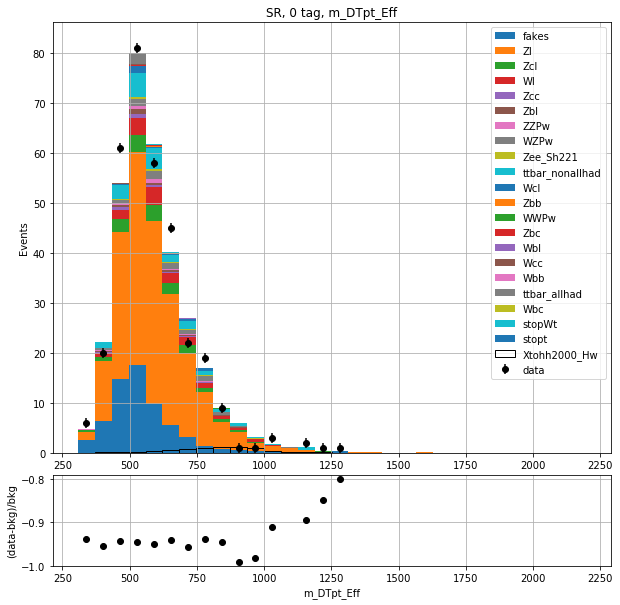

::: SR 0 m_DTeta_Eff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 3  1  4  8  0  7  2  9  9 14 16 14 16 32 23 24 21 18 16 17 15 19 10  8
  9  2  7  4  2  0]
BACK [ 29.14157192  42.35146853  71.48580453  90.03227337  75.44513515
 100.17239241 142.33578735 199.44514146 227.63085142 277.94672393
 326.84959765 319.48288926 384.70232631 387.3390677  429.93280447
 440.35383821 387.44763538 412.33098251 359.30275555 337.88713497
 279.76703101 250.28754672 188.7054106  129.19313312 103.48744375
  66.93173409  90.6870473   67.32557577  28.16259098  21.43628025]
DIFF [-0.89705428 -0.9763

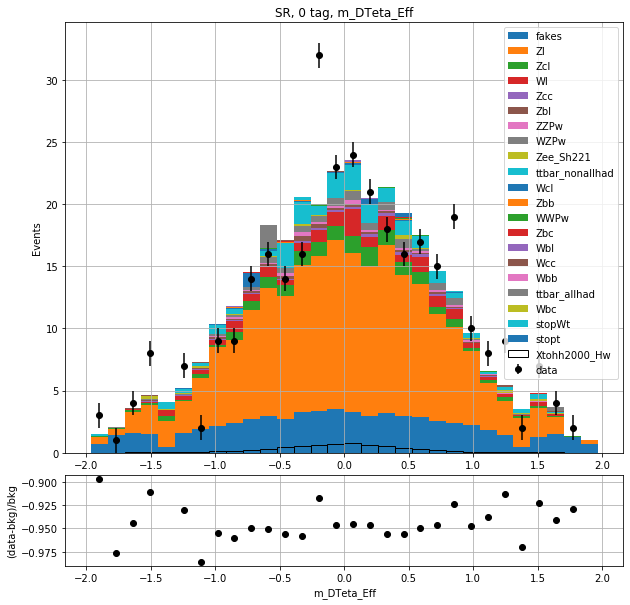

::: SR 0 m_DTphi_Eff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 7 14 10 14  8  9  7 16 18 11 12 12  5  8 10 12 12 15 10 16 13 13 11  7
  8 16 12  6  4 14]
BACK [163.63827321 224.23034535 206.29196869 213.68850022 212.92147765
 220.02264329 214.98674596 206.39187826 199.80557638 212.18108252
 197.0696765  198.26795411 227.45835108 235.85342184 228.71753791
 210.38655181 228.90615274 200.78098508 189.2013621  199.11320832
 204.12413463 194.72334349 219.85764632 207.58365875 211.09774649
 234.41996947 207.68578296 212.28818545 196.42536107 189.47484168]
DIFF [-0.95722272 -0.9375

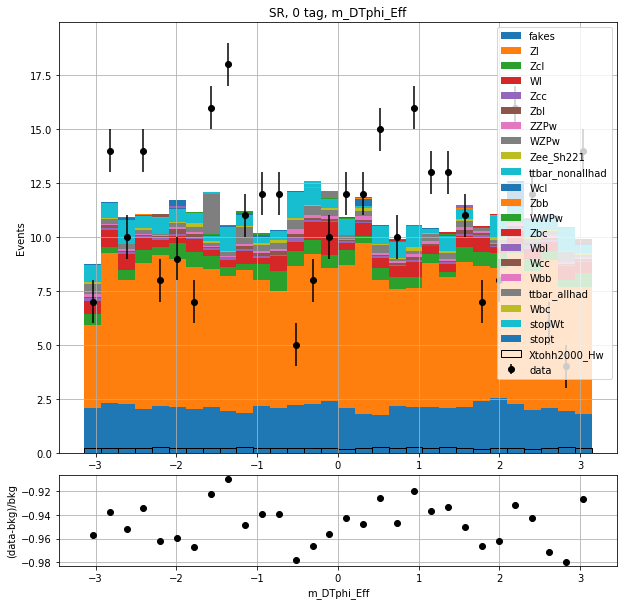

::: SR 0 m_DTm_Eff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 7 66 60 48 41 26 23 19  9  9  7  6  2  1  2  1  2  1  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 2.20799731e+02  1.14581517e+03  1.15537075e+03  9.96922033e+02
  7.06215048e+02  5.53509374e+02  3.51253906e+02  3.06742143e+02
  2.33247595e+02  1.50848119e+02  1.26210000e+02  1.17108155e+02
  6.55329604e+01  4.36889496e+01  2.07804093e+01  2.13234054e+01
  2.22836673e+01  1.54842060e+01  6.33810234e+00  3.40147543e+00
  1.88497353e+00  7.45501041e-01  3.37059021e-01  2.45716095e-01
  1.02109790e+00  4.32083130e-01 -

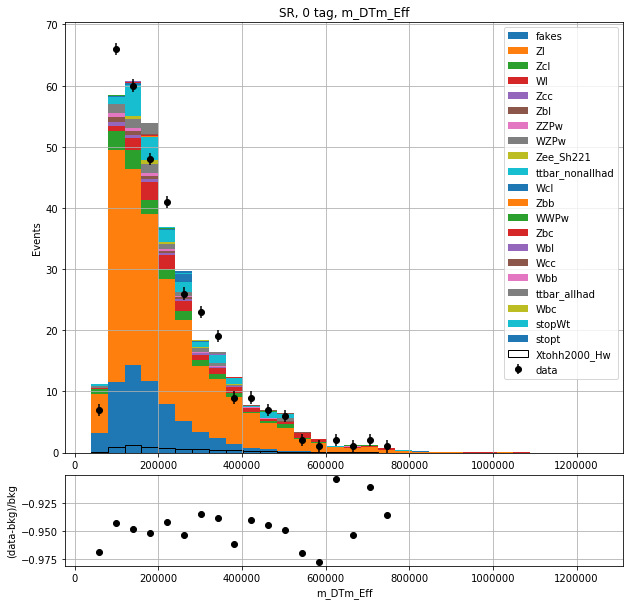

::: SR 0 m_DTpt_ConEff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [27 65 60 45 34 34 22 18  7  6  6  0  3  1  1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 5.14685376e+02  1.13907556e+03  1.08878413e+03  1.04415121e+03
  7.21750614e+02  4.87453391e+02  3.77304636e+02  2.92806883e+02
  2.07362978e+02  1.32522738e+02  9.89292555e+01  6.40955552e+01
  3.81075003e+01  3.06358318e+01  1.05617495e+01  9.21496582e+00
  3.47580767e+00  1.21898842e+00  3.11226511e+00  3.88641357e-01
  1.35083389e+00  6.53179169e-01 -1.16577148e-01  6.62231445e-02
 -1.15051270e-01  1.02539062e-

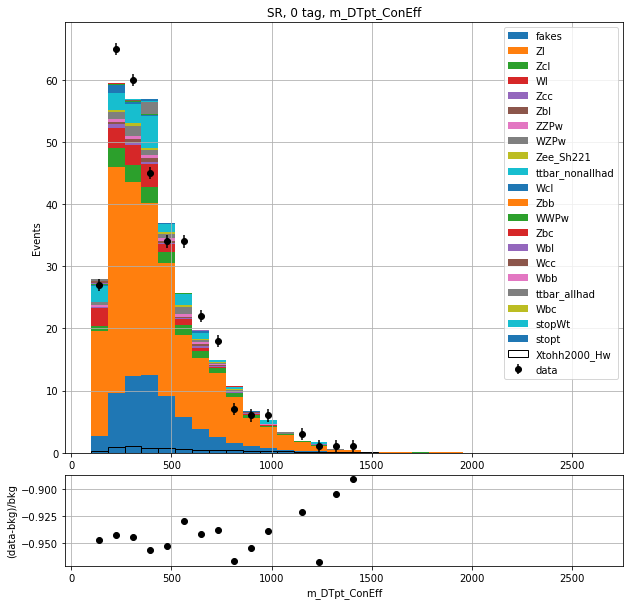

::: SR 0 m_DTeta_ConEff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 3  1  4  8  0  7  2  9  9 14 16 14 16 32 23 24 21 18 16 17 15 19 10  8
  9  2  7  4  2  0]
BACK [ 29.14157192  42.35146853  71.48580453  90.03227337  75.44513515
 100.17239241 142.33578735 199.44514146 227.63085142 277.94672393
 326.84959765 319.48288926 384.70232631 387.3390677  429.93280447
 440.35383821 387.44763538 412.33098251 359.30275555 337.88713497
 279.76703101 250.28754672 188.7054106  129.19313312 103.48744375
  66.93173409  90.6870473   67.32557577  28.16259098  21.43628025]
DIFF [-0.89705428 -0.9

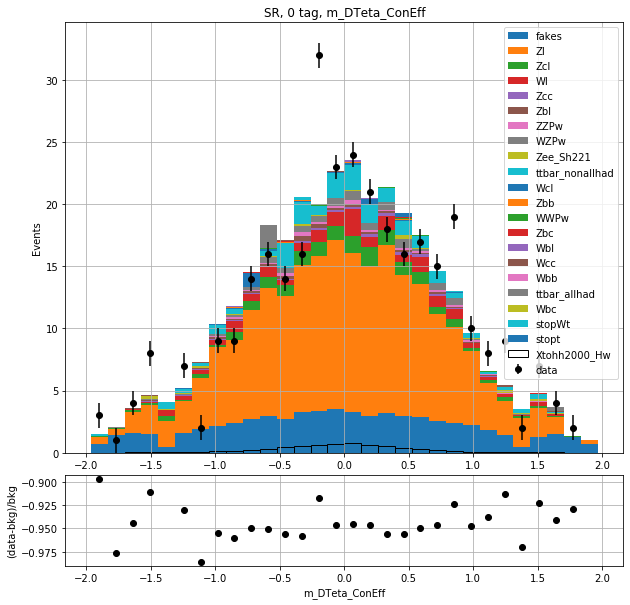

::: SR 0 m_DTphi_ConEff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 7 14 10 14  8  9  7 16 18 11 12 12  5  8 10 12 12 15 10 16 13 13 11  7
  8 16 12  6  4 14]
BACK [163.63827321 224.23034535 206.29196869 213.68850022 212.92147765
 220.02264329 214.98674596 206.39187826 199.80557638 212.18108252
 197.0696765  198.26795411 227.45835108 235.85342184 228.71753791
 210.38655181 228.90615274 200.78098508 189.2013621  199.11320832
 204.12413463 194.72334349 219.85764632 207.58365875 211.09774649
 234.41996947 207.68578296 212.28818545 196.42536107 189.47484168]
DIFF [-0.95722272 -0.9

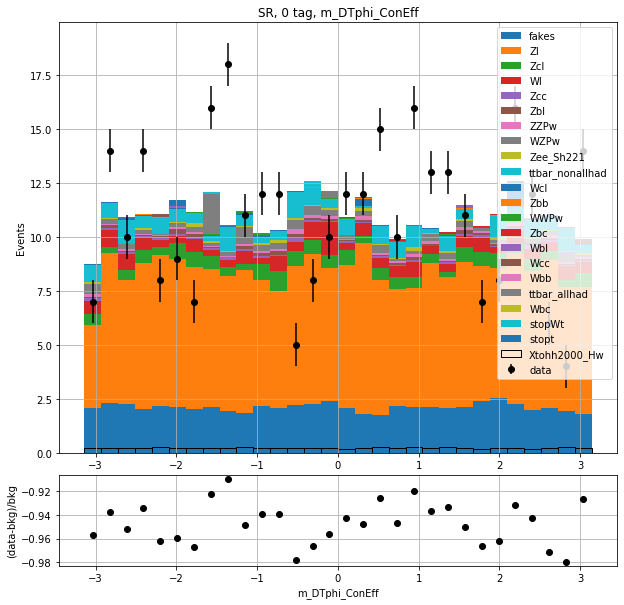

::: SR 0 m_DTm_ConEff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 330   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
 6267.56292174    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
DIFF

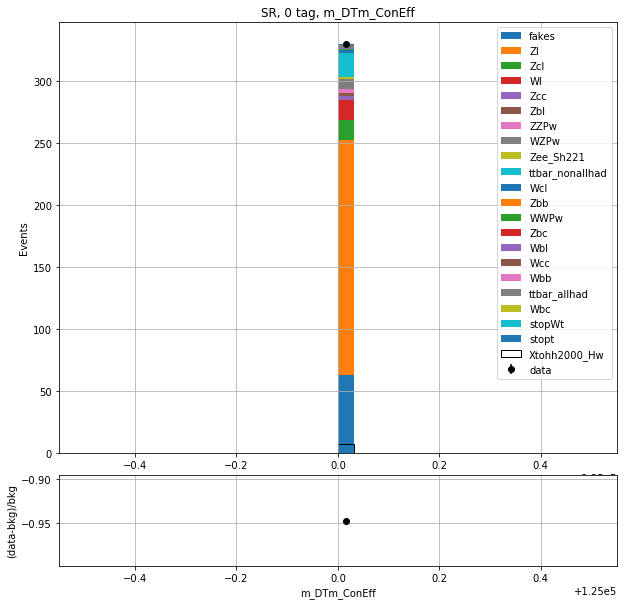

::: SR 0 m_DTpt_ConVis
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [10 13 20 38 46 63 36 32 27 22 11  3  5  2  0  2  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [1.53707948e+02 2.85072746e+02 3.54400284e+02 5.55537395e+02
 8.38725882e+02 9.76017891e+02 8.79970562e+02 6.69147782e+02
 5.23746420e+02 3.86119323e+02 2.67851687e+02 1.41578423e+02
 1.04819244e+02 5.29823040e+01 3.28239470e+01 1.80969121e+01
 1.15472555e+01 6.17922831e+00 2.55695152e+00 3.56145668e+00
 1.69071198e+00 9.21752930e-01 7.68375397e-02 1.73034668e-01
 4.33731079e-03 0.00000000e+00 0.00000000e+00 8.575439

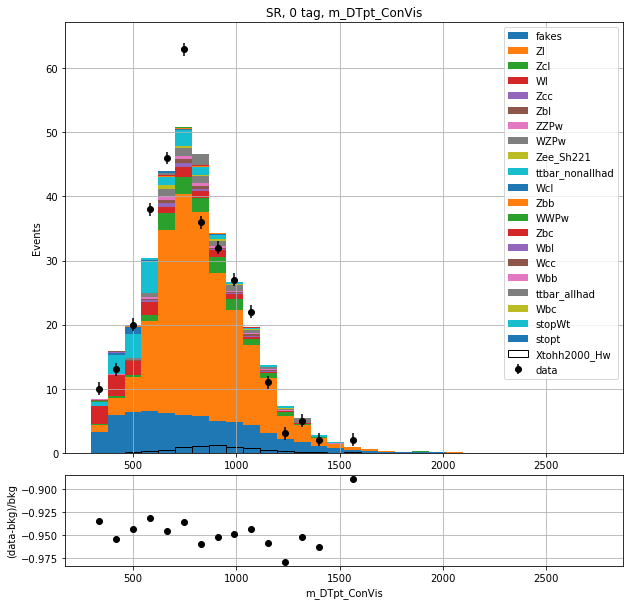

::: SR 0 m_DTeta_ConVis
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 4  5  7  3  1 12  9  9 13  7 16 12 23 21 16 19 19  9 16 13 16 13 22 12
 13  3  3  7  4  3]
BACK [ 82.1593702   83.27318992 116.36933228  97.89811088  40.72206599
 180.34602664 228.39403972 237.49543195 254.02968074 269.44218364
 289.26364523 280.94836497 325.91959083 302.10805395 315.63548362
 323.67952266 314.98590171 301.91269678 298.62624818 341.65017784
 269.17373404 275.02578247 237.0262145  224.69712567 188.07445723
  44.72653604  80.37634128 121.43115956  84.01536328  58.18960834]
DIFF [-0.95131414 -0.9

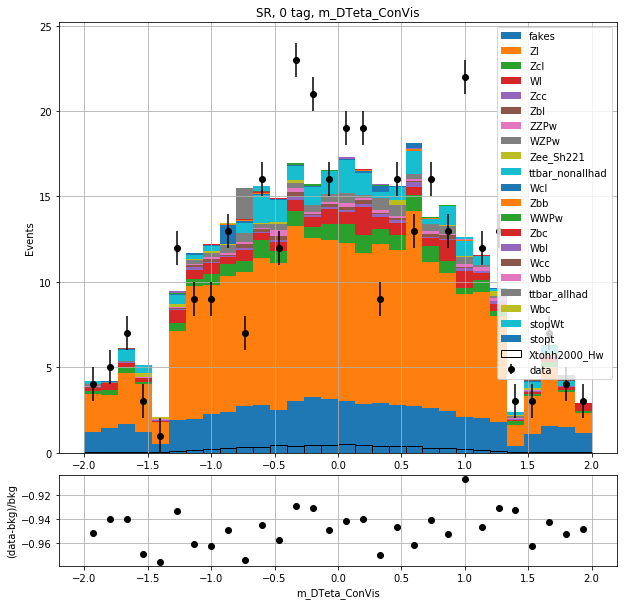

::: SR 0 m_DTphi_ConVis
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 7 12 12 14  8  9  7 16 17  8 16  7  9  8  8 16 11 11 12 15 16 11 13  5
 10 13 12  7  6 14]
BACK [183.46193795 214.25192996 203.74477804 208.82078315 209.69490813
 222.50297011 225.26081499 208.14258654 198.14648445 200.46676059
 206.11131862 195.7232755  231.94420096 231.49621394 210.31542915
 232.56792918 218.58646084 196.99010846 206.51082656 192.76504099
 195.88685578 204.01049587 230.39215142 198.3001838  209.25646228
 231.32511802 211.20697141 214.17032117 196.66727337 178.87152171]
DIFF [-0.96184495 -0.9

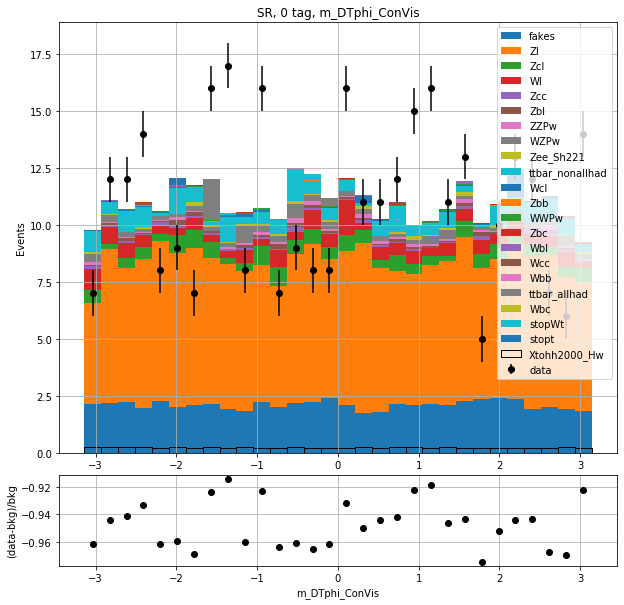

::: SR 0 m_DTm_ConVis
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 330   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
 6267.56292174    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
DIFF

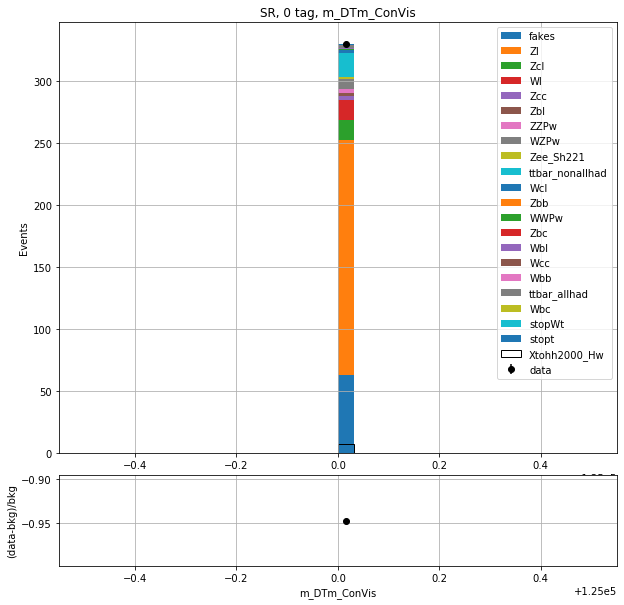

::: SR 0 m_dPhiFTwDT
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   0   1   2   2   5   6   7   9  18  27  60 192]
BACK [4.71260158e-01 5.22928126e-02 0.00000000e+00 5.40114039e-01
 1.63584372e-01 0.00000000e+00 1.51231237e-01 2.01740935e-01
 2.55865477e-01 1.23060445e-01 3.69200223e-01 6.97741704e-02
 4.59293614e-01 6.27129674e-01 1.39034217e+00 2.55688117e+00
 2.61236946e+00 4.35199820e+00 9.71599981e+00 1.50794640e+01
 2.80815886e+01 4.11345528e+01 5.68327735e+01 7.55197304e+01
 1.36699836e+02 1.94578006

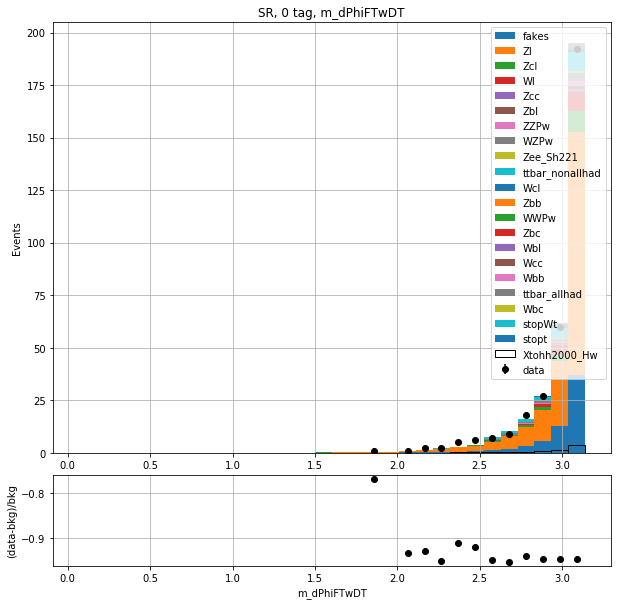

::: SR 0 m_dRFJwDT
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 0  0  0  0  0  0  0  1  0  1  6  6  5 12 25 85 86 49 28 13  5  1  3  1
  1  0  0  2  0  0]
BACK [3.36102397e-01 3.53108848e-01 2.65227404e-01 6.96513635e-01
 1.67214141e+00 1.27396486e+00 3.42042251e+00 7.02741859e+00
 1.10879355e+01 2.70006254e+01 4.98672962e+01 7.13114530e+01
 1.29263908e+02 2.49103221e+02 4.76032095e+02 1.51000173e+03
 1.87623607e+03 7.59662852e+02 3.98593836e+02 2.58397482e+02
 1.58228048e+02 1.08729895e+02 6.87207998e+01 4.52025858e+01
 2.45507143e+01 1.38228745e+01 6.22755861e+00 2.81046677e+

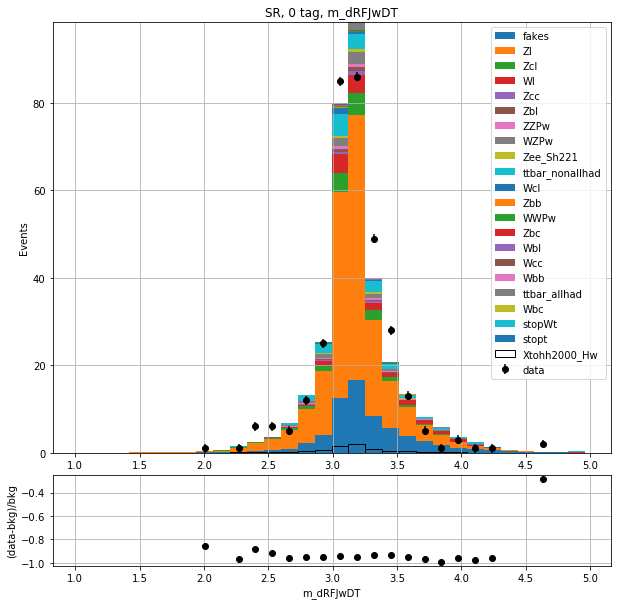

::: SR 0 m_dPhiDTwMET
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 3  0  1  6  8  6  3  5  2  6 10 11 17 33 45 33 44 30 23  9  5  4  5  4
  4  3  2  3  2  3]
BACK [ 35.21162302  38.17557216  44.69774636  52.9483868   69.41887749
  57.00330485  77.4905592  111.93733072 127.33183083 150.33587617
 214.97538175 285.82179551 388.83127405 617.93306691 796.81164604
 797.20557442 653.59202856 429.72637221 311.41296934 228.74943662
 170.77690977 128.33953756  91.80365512  84.19613603  55.44124514
  62.61271122  66.0356456   46.29478538  34.39839733  38.08737028]
DIFF [-0.91480086 -1.   

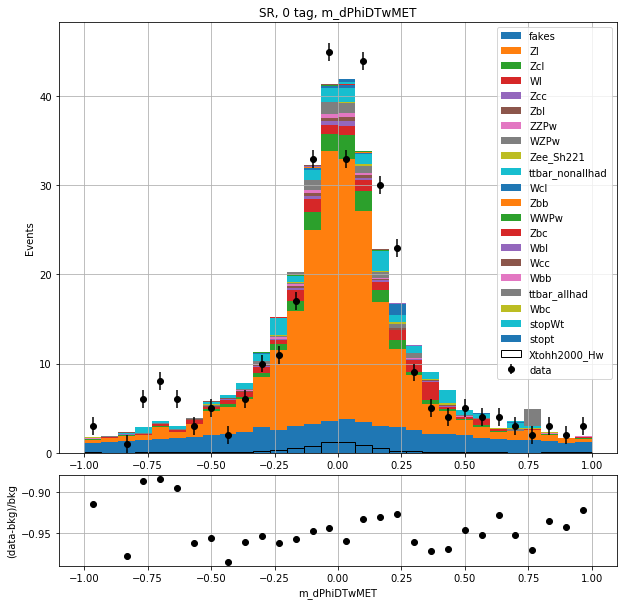

::: SR 0 m_MET
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [87 77 69 30 29 12 16  6  2  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.74249084e+03  1.38131967e+03  1.14372778e+03  7.50225139e+02
  5.60909547e+02  2.86611499e+02  1.54013578e+02  1.13773974e+02
  6.03332087e+01  2.70428257e+01  1.85309462e+01  9.81999272e+00
  6.87050772e+00  6.34335136e+00  2.30897754e+00  8.60347748e-01
  5.69958448e-01  3.80347580e-01  5.65993071e-01  9.17739868e-02
  1.31469727e-01  3.07685852e-01  2.19154358e-01  0.00000000e+00
  6.09626770e-02 -1.28173828e-03  0.00

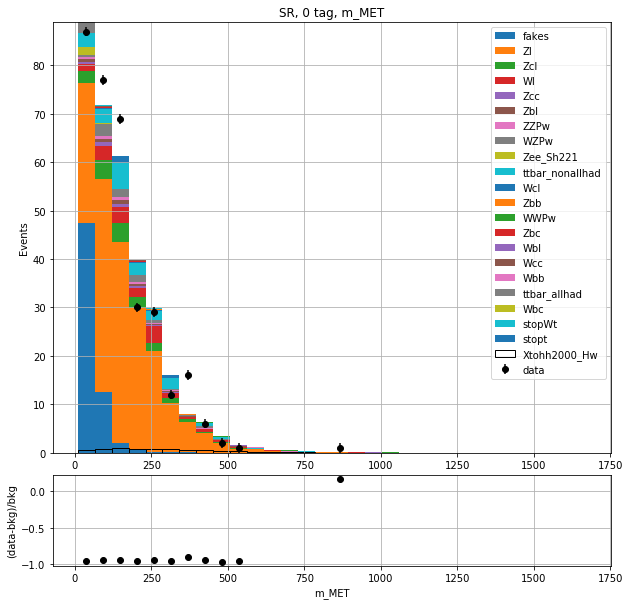

::: SR 0 m_hhm
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [  0   9  98 109  60  22  14   9   1   2   1   1   0   2   1   0   1   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [ 7.50309918e-01  1.27811177e+02  1.88091232e+03  1.93390866e+03
  1.03977894e+03  5.79203353e+02  3.22293794e+02  1.76178767e+02
  8.32158713e+01  4.88206623e+01  3.22591754e+01  1.55714061e+01
  9.93354762e+00  4.66466564e+00  4.36569595e+00  2.03433609e+00
  3.45289993e+00  6.91806793e-01  4.56596375e-01  3.91090393e-01
  3.28285217e-01  4.55017090e-01  8.27026367e-02  0.00000000e+00
  0.0000

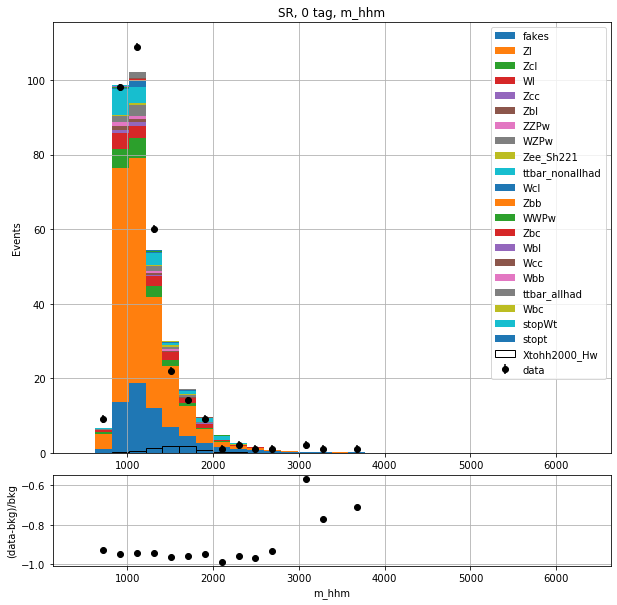

::: SR 0 m_bbttpt
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [30 67 68 67 35 18 20 10  6  3  3  1  0  0  0  0  1  1  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [6.25822369e+02 1.15214246e+03 1.35476850e+03 1.17438350e+03
 7.38295467e+02 4.28388627e+02 2.99655143e+02 2.10142023e+02
 1.01322399e+02 5.52944479e+01 4.12618015e+01 3.31644971e+01
 1.59751842e+01 1.21330693e+01 6.82330638e+00 5.33083153e+00
 3.94400141e+00 2.51959455e+00 1.63921285e+00 8.85906219e-01
 1.02278519e+00 1.05735397e+00 4.71595764e-01 2.21317291e-01
 2.51274109e-01 6.96487427e-02 1.99584961e-01 2.18200684e-0

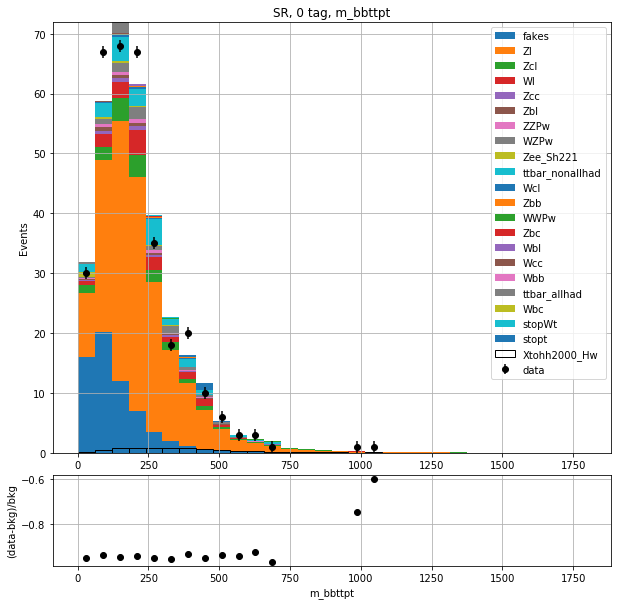

::: SR 0 m_hhm_Coll
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 330   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
 6267.56292174    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
DIFF [

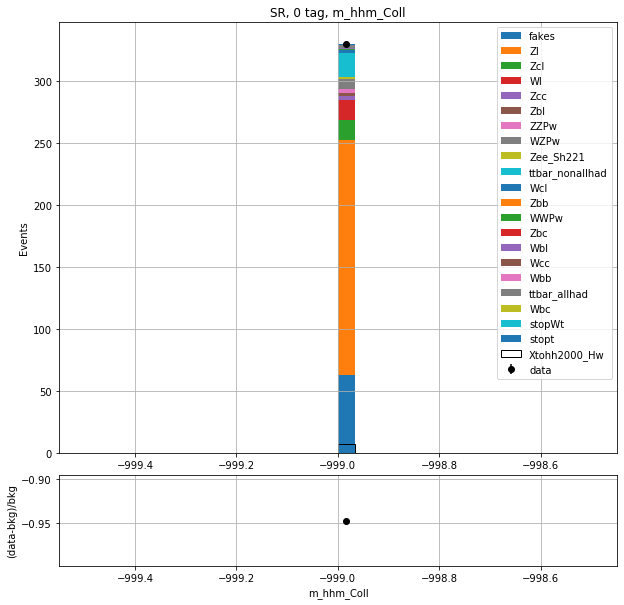

::: SR 0 m_hhm_Eff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [  0  10  83 107  60  31  20   7   2   3   2   1   2   1   0   0   1   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [ 2.08178072e+00  2.38619382e+02  1.52309332e+03  1.83746736e+03
  1.16700970e+03  6.56451363e+02  3.84663703e+02  1.99568910e+02
  1.13973443e+02  6.24762853e+01  3.81182136e+01  1.76375197e+01
  8.48308861e+00  7.41853976e+00  2.23444366e+00  4.91129303e+00
  1.19290966e+00  7.71831512e-01  6.27231598e-01  7.36999512e-02
  6.17877960e-01  8.27026367e-02  0.00000000e+00 -6.56890869e-03
  0.

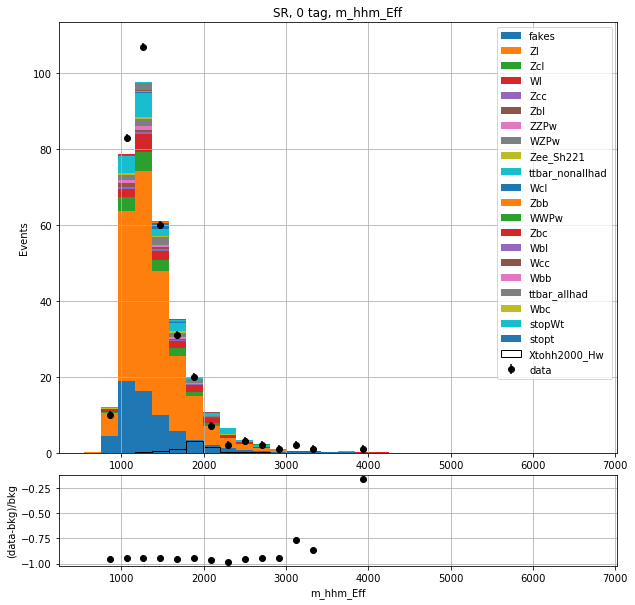

::: SR 0 m_hhm_ConEff
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 0  0  3 33 47 55 46 43 40 21 14  9 10  2  1  3  1  1  0  1  0  0  0  0
  0  0  0  0  0  0]
BACK [-1.86123650e-03  2.53692052e+00  1.32614494e+02  5.45805389e+02
  8.25680135e+02  9.98646065e+02  9.56759499e+02  8.06499599e+02
  5.64139989e+02  4.61674556e+02  3.32053158e+02  2.13607191e+02
  1.61297385e+02  8.31957647e+01  8.19475481e+01  3.61888971e+01
  2.09082501e+01  2.05092735e+01  7.90985751e+00  6.12620342e+00
  4.30889654e+00  1.40290904e+00  1.57081223e+00 -1.18259430e-01
  8.53981018e-01  1.19518280e-0

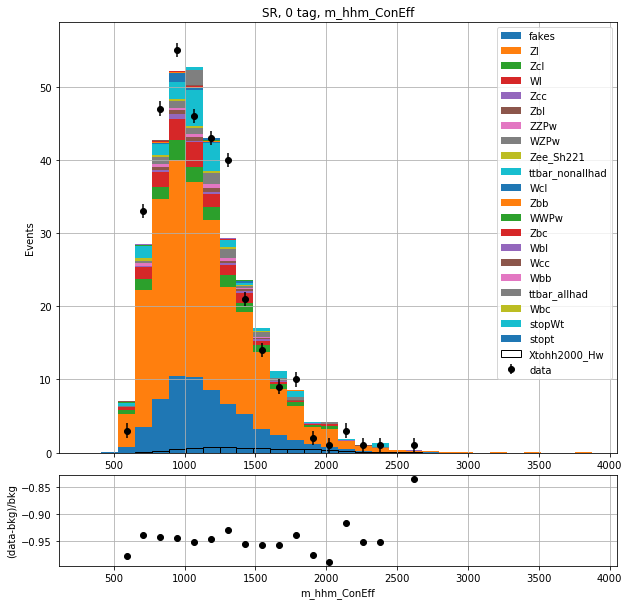

::: SR 0 m_hhm_ConVis
df_data.shape (330, 3)
df_signal.shape (4670, 3)
fakes 30418 62.983093
Zl 18930 189.3602
Zcl 1686 16.407166
Wl 716 16.331032
Zcc 274 2.701147
Zbl 232 2.8056011
ZZPw 160 3.081255
WZPw 145 7.713169
Zee_Sh221 135 1.9834118
ttbar_nonallhad 124 19.011448
Wcl 74 2.4274397
Zbb 29 0.35927305
WWPw 28 0.6539964
Zbc 24 0.2637774
Wbl 13 0.3498408
Wcc 11 0.4462341
Wbb 2 0.037918046
ttbar_allhad 2 2.1130304
Wbc 2 0.016911913
stopWt 2 0.36315823
stopt 1 0.29318509
DATA [ 0  4 30 88 76 57 34 19  9  4  3  4  0  0  1  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0]
BACK [ 2.08020230e+00  7.39405489e+01  5.91011595e+02  1.39555204e+03
  1.43894030e+03  1.06847819e+03  6.39991074e+02  4.30319754e+02
  2.53556553e+02  1.48025457e+02  8.50699727e+01  4.61633359e+01
  2.98839457e+01  2.13299394e+01  1.55380344e+01  9.59070230e+00
  6.97976536e+00  2.82041168e+00  2.45368958e+00  1.85644150e+00
  8.56529236e-01  1.30443192e+00  3.42826843e-01  1.62540436e-01
  7.66414642e-01  4.20234680e-0

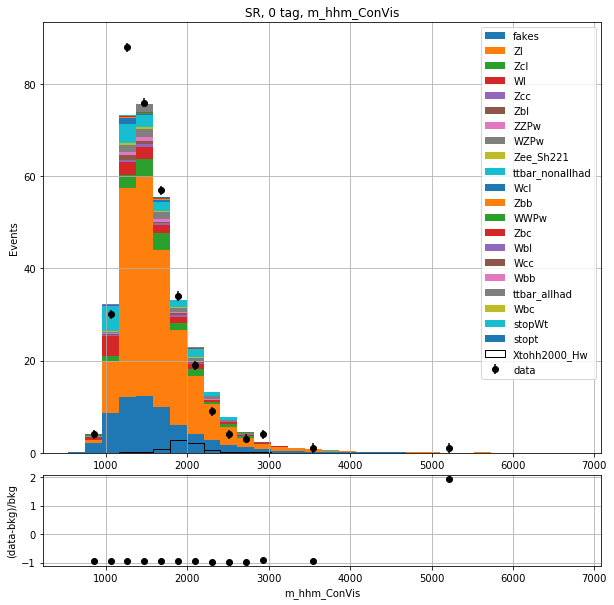

-->df.shape (19476, 38)
::: SR 1 m_AntiBTag
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [ 2  0  0  0  0  5  0  0  0  0 13  0  0  0  0  3  0  0  0  0  1  0  0  0
  0  0  0  0  0  0]
BACK [3.98299022e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.36274088e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.73733936e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.86232283e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.54831413e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.23603225e+00 0.00000000e+00 0.00000000

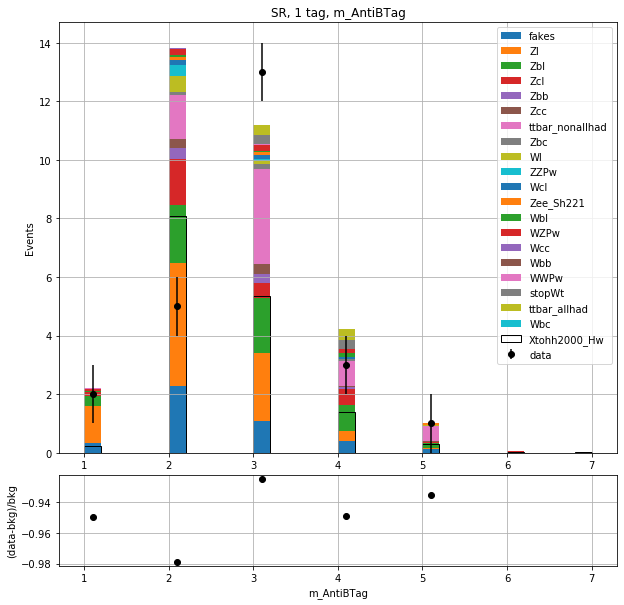

::: SR 1 m_AntiTauTag
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [440.71896693   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.          84.54017639]
DIFF [-0.94554353         nan         nan         nan         nan         nan
         

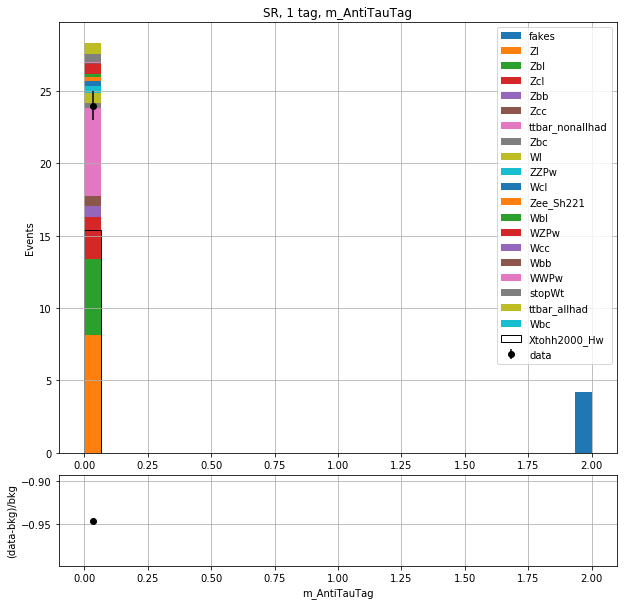

::: SR 1 m_FJpt
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 2 1 8 6 1 1 3 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 4.16849867e+00  6.59517890e+00  5.42930038e+01  1.23817945e+02
  1.12173716e+02  8.49233120e+01  3.76714942e+01  3.82039918e+01
  2.24095886e+01  1.26226893e+01  1.11670651e+01  7.53648949e+00
  2.63583952e+00  3.01652956e+00  1.22013044e+00  1.11471200e+00
  3.11989069e-01  1.95278168e-01  2.44357109e-01  3.80308151e-01
 -4.43458557e-03  1.55611038e-01  0.00000000e+00  1.50394440e-03
  1.31475449e-01  1.92843676e-01  0.00000000e+00  0.00000000e+00
 -2.33650208e-03  8.274936

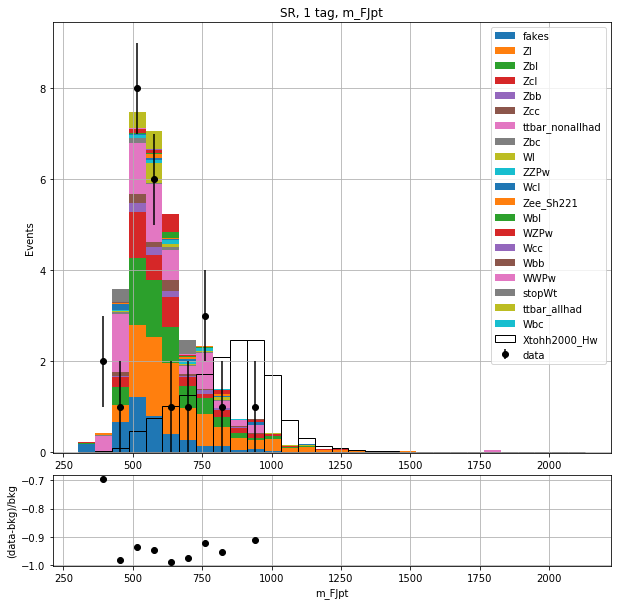

::: SR 1 m_FJeta
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 0 0 1 0 1 0 1 1 1 0 3 0 0 2 1 0 1 2 3 2 0 1 0 1 1 1 0]
BACK [ 1.46344756  3.99428172  8.44944023  2.02998826 15.1944982  10.86763119
 15.99361736 26.30621643 19.85100563 22.93295533 19.83715757 28.11039437
 24.21034862 33.93287633 37.08925831 29.46083764 28.65792584 11.13401346
 32.52219765 20.72089232 28.9782699  13.68494187 16.58321327 14.90301055
 20.49790204  7.68356588  9.20364324 12.01550609  3.06079483  5.88941953]
DIFF [-1.         -1.         -0.88164896 -1.         -1.         -0.90798363
 -1.         -0.96198617 -1.        

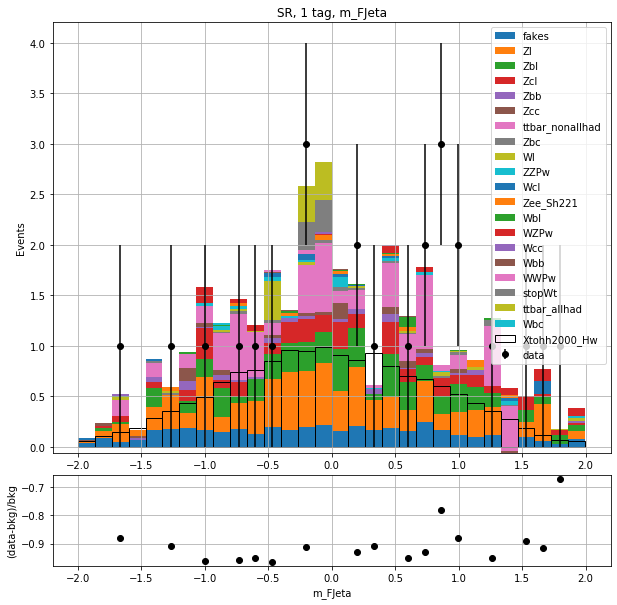

::: SR 1 m_FJphi
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 1 2 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 2 0 1 0 1 2 2 0 2 1 0 2]
BACK [17.18290931 16.13697589 15.93524117 19.38804564 18.25894986 18.05731597
 13.70277611 14.68780869 19.06753469 27.1090722  13.24241607 12.11687057
 19.24667051  7.79096982 14.52790403  3.28543131 21.56142238 20.25465941
 20.43836287 18.66082257 23.83598031 10.78311732 19.79595634 16.36585701
 22.2470928  22.61124761 15.88093281 30.61103617 17.49421507 14.98167315]
DIFF [-1.         -0.93803052 -0.87449202 -1.         -1.         -0.94462078
 -1.         -0.93191632 -1.        

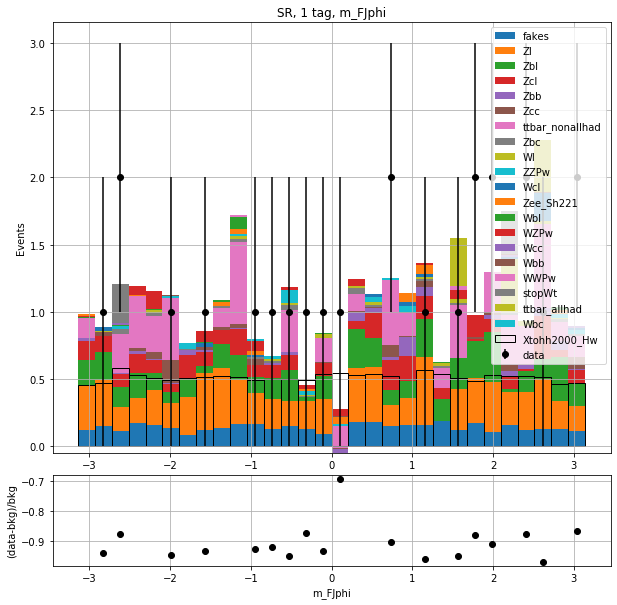

::: SR 1 m_FJm
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [5 3 2 3 4 3 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.52386619e+02  7.89870853e+01  5.67833962e+01  6.15643045e+01
  7.72628173e+01  3.30044388e+01  3.10878938e+01  1.20802230e+01
  7.30771017e+00  5.26060009e+00  6.49215943e+00  2.06015038e+00
  7.95776367e-01  2.79595882e-01 -3.34242821e-01 -1.59263611e-03
 -3.62396240e-04  2.44308472e-01 -2.00271606e-04 -4.00543213e-04
 -2.76565552e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.67028809e-04 -2.47955322e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.0000000

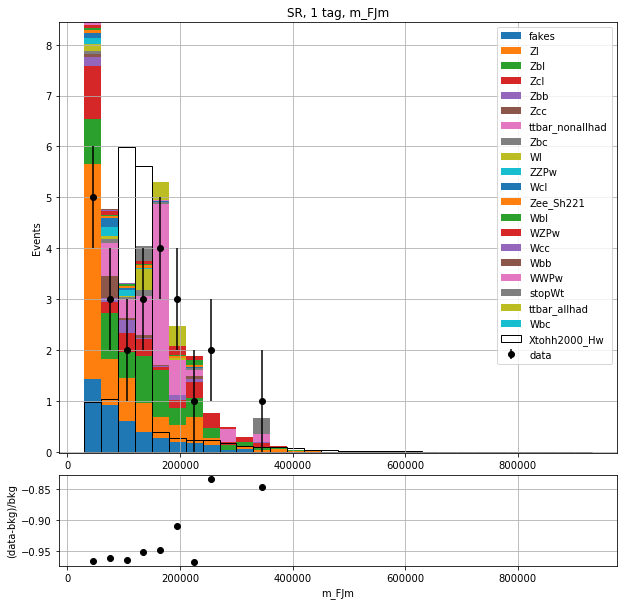

::: SR 1 m_DTpt
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [5 5 7 2 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 8.48865509e+01  9.07781241e+01  7.59435399e+01  6.84901432e+01
  6.76507344e+01  4.35311209e+01  2.27086145e+01  2.34306110e+01
  1.63345019e+01  1.05508782e+01  6.28645212e+00  5.93742919e+00
  3.58592764e+00  9.46170449e-01  2.45650589e+00  2.04152107e-01
  3.07011902e-01  3.28383446e-01  1.89990997e-01  2.77823329e-01
 -4.86373901e-04  1.24078751e-01  0.00000000e+00  1.56316757e-01
  0.00000000e+00  0.00000000e+00 -1.42097473e-03  0.00000000e+00
  0.00000000e+00  1.563167

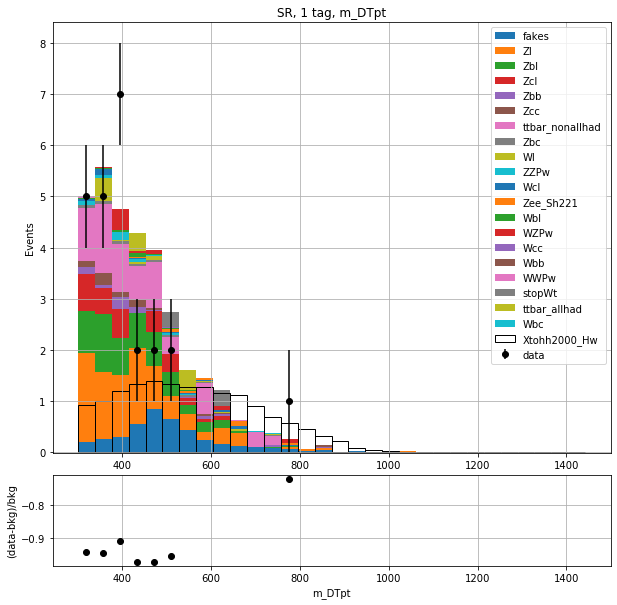

::: SR 1 m_DTeta
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 1 1 1 2 0 1 1 1 1 0 2 1 0 1 1 1 2 1 0 1 1 0 0 2 0 1 0]
BACK [ 7.64401582  5.1332902  15.29420705  5.67735758  3.34754174 10.62351022
 15.82527643 20.05619457 18.36207115 16.88587087 18.18820228 24.50903005
 25.98410683 26.42915376 32.03648653 44.89876418 22.99389446 25.1644603
 32.78607301 18.42260286 25.5656981  25.21920675 21.72674077 17.00181636
  8.43119718  5.07748495  6.68750039 14.14408827  6.80150175  4.34204531]
DIFF [-1.         -1.         -0.93461577 -0.82386172 -0.70127333 -0.90586915
 -0.8736199  -1.         -0.94553991 

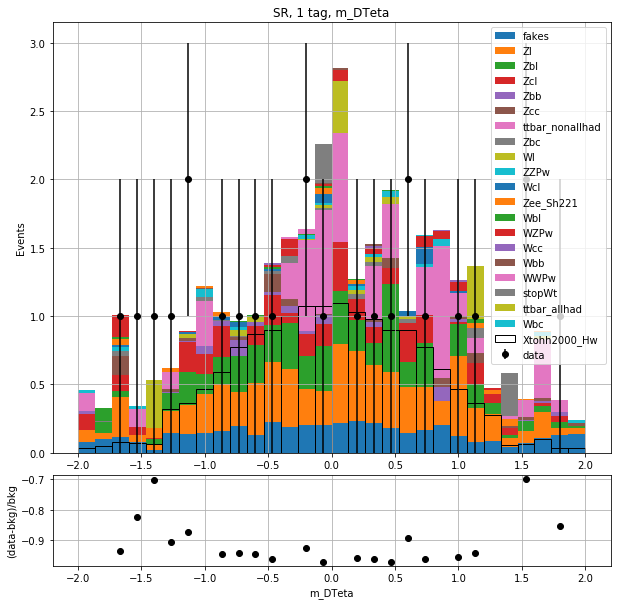

::: SR 1 m_DTphi
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [1 0 0 2 0 0 1 0 1 1 2 0 3 0 1 0 1 3 0 0 1 1 0 0 1 0 0 0 3 2]
BACK [ 5.65093586 19.7374404  15.98111437 23.46330858 16.65601345 18.010538
 15.09672485 24.10396747 18.99186217 17.20193271 22.3320972  19.70154311
 19.54460713 21.61259966 21.20632037 19.3101161  14.99497522 12.59569794
 19.22039472 16.91136934 16.09549654 18.01872262 11.13319151 23.72256254
 23.18739963 14.9462396  14.26739441 14.71633913  7.845597   19.00289039]
DIFF [-0.82303816 -1.         -1.         -0.91476053 -1.         -1.
 -0.93376047 -1.         -0.94734587 -0.941867

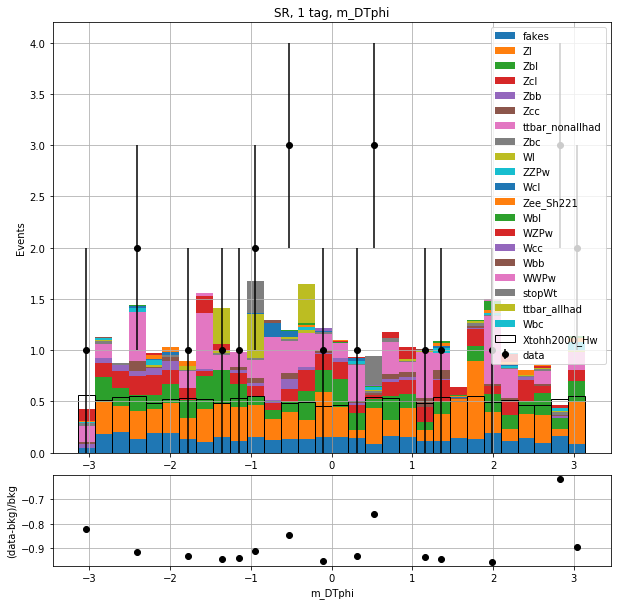

::: SR 1 m_DTm
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 1 2 8 6 2 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 5.18166538e+00  2.98995370e+01  7.30578481e+01  1.01649759e+02
  1.23496395e+02  8.35266981e+01  2.78901774e+01  1.37335498e+01
  1.90137464e+01  1.73085476e+01  6.91836357e+00  8.28624493e+00
  5.03383249e+00  2.81101435e+00  2.58127517e+00  6.81621075e-01
  1.02837563e+00  1.33808295e+00  1.42784119e-01  2.88415053e-01
  3.12690437e-01  1.55989647e-01  2.87157595e-01  1.50461197e-01
  1.56316757e-01  5.79071045e-03  0.00000000e+00 -7.32421875e-03
  1.56316757e-01  1.7411327

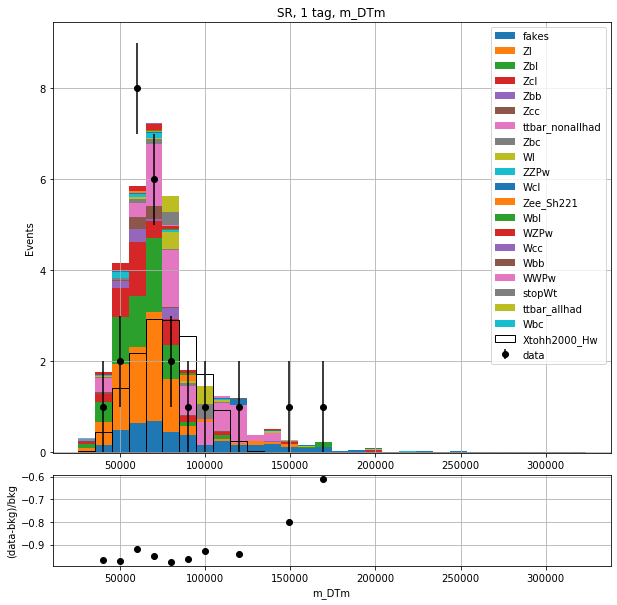

::: SR 1 m_DTpt_Eff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [1 2 3 4 5 3 0 3 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 4.52981424e+00  2.32088166e+01  6.24097913e+01  1.06327302e+02
  8.74835874e+01  7.71656994e+01  5.25452249e+01  3.64812046e+01
  2.27283137e+01  2.19757684e+01  1.49038482e+01  7.73432793e+00
  1.40580726e+00  1.58977276e+00  1.80496460e+00  3.70819509e-01
  2.11614609e-01  6.86572075e-01  9.98056889e-01 -1.34563446e-02
  1.37844086e-01  3.55257034e-01 -9.72747803e-04 -1.03218079e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.88388824e-01
  1.36663437e-01 -2.33

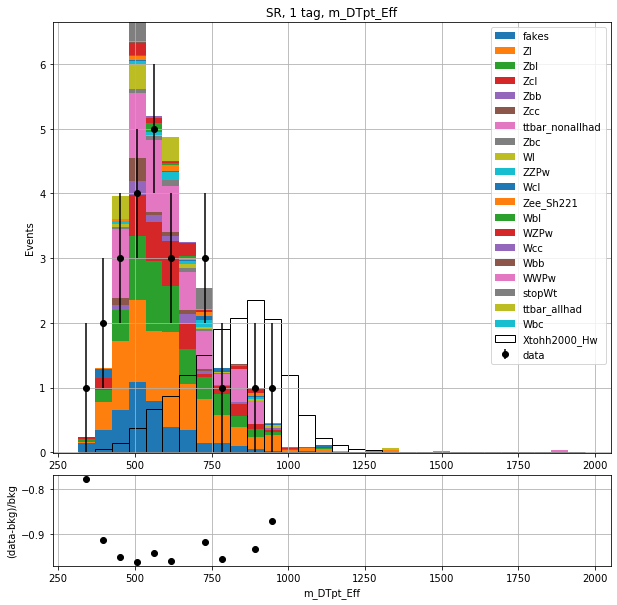

::: SR 1 m_DTeta_Eff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 1 0 0 3 0 0 2 1 2 1 0 3 0 2 0 2 2 0 0 2 1 1 0 0 0 1 0]
BACK [ 0.95529232  3.46544225  7.02169245  8.68841101  3.76709075  6.91542492
  8.75258806 13.85743472 24.11404433 20.87753266 11.66366636 26.94178564
 29.41419464 34.96784937 37.36247892 56.00884505 31.2281304  35.14054967
 33.92744765 31.77012421 25.84971645 16.83962739 12.58251572  5.32484588
 11.52161942  8.59928903  5.64491296  6.60388613  2.98697472  2.46600151]
DIFF [-1.         -1.         -1.         -0.88490416 -1.         -1.
 -0.65724424 -1.         -1.         -0.

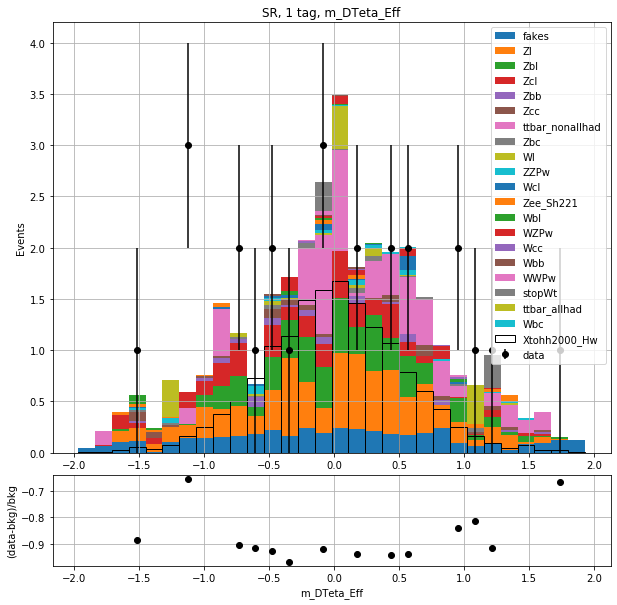

::: SR 1 m_DTphi_Eff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 1 0 0 1 0 1 1 2 2 0 2 0 0 1 3 0 1 0 1 0 1 0 0 0 0 3 3]
BACK [ 8.29542309 21.65169463 13.99881009 24.42342188 16.72825614 18.8437757
 15.31575856 23.91378475 14.19029891 21.30394713 21.76590025 16.91754579
 28.48303935 16.29686598 20.86199677 18.2404908  17.27970028  9.72756573
 23.64467343 13.7736889  17.89499546 15.15722199 13.02523857 23.98453356
 22.44597545 14.89129103 13.90076402 15.91648543  7.93185452 14.45439363]
DIFF [-1.         -1.         -0.92856536 -0.9590557  -1.         -1.
 -0.93470777 -1.         -0.92952932 -0.9

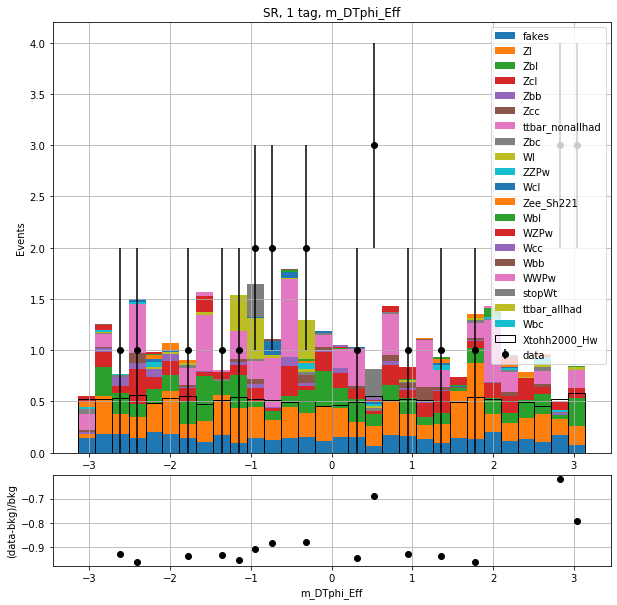

::: SR 1 m_DTm_Eff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 2 2 5 4 2 0 1 1 1 1 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.21727713e+01  8.51344632e+01  9.14443004e+01  6.75079270e+01
  5.79573834e+01  3.47583575e+01  4.28272186e+01  2.43754169e+01
  2.29528856e+01  1.48575234e+01  9.50560708e+00  7.72124657e+00
  1.17246656e+01  7.40843105e+00  2.16796887e+00  4.22853601e+00
  2.36150932e+00  3.23902321e+00  9.16316986e-01  8.18983078e-01
  1.50750160e-01  5.41751862e-01  1.65277719e-01  1.06747627e-01
  2.42303371e-01  0.00000000e+00 -2.77709961e-02  0.00000000e+00
  0.00000000e+00 -1.525

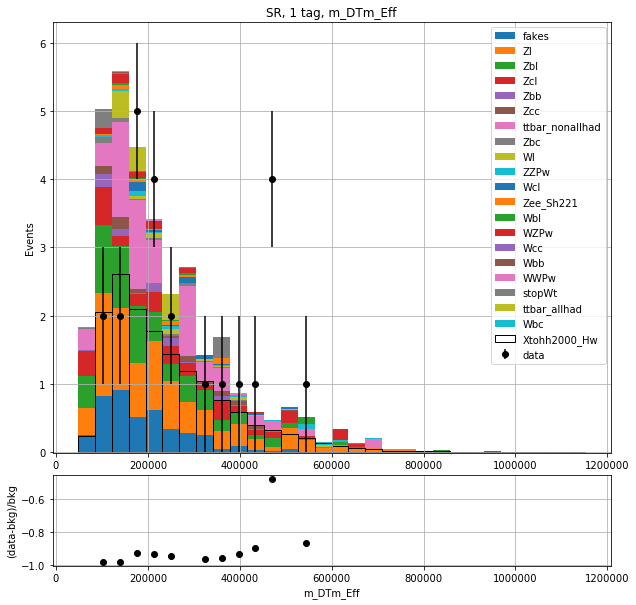

::: SR 1 m_DTpt_ConEff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [4 5 4 6 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 4.89202602e+01  7.40286542e+01  8.59419625e+01  5.74278012e+01
  5.83221651e+01  5.32994699e+01  4.25614546e+01  2.57045575e+01
  1.51713769e+01  1.94955769e+01  1.07963696e+01  9.36757296e+00
  5.31705067e+00  6.22469218e+00  3.65345430e+00  6.18046188e+00
  2.34722048e-01 -2.86102295e-06  1.00263977e+00  9.34558153e-01
  7.88867235e-01  1.05279922e-01 -5.68643570e-01 -6.00814819e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.33514404e-04  3

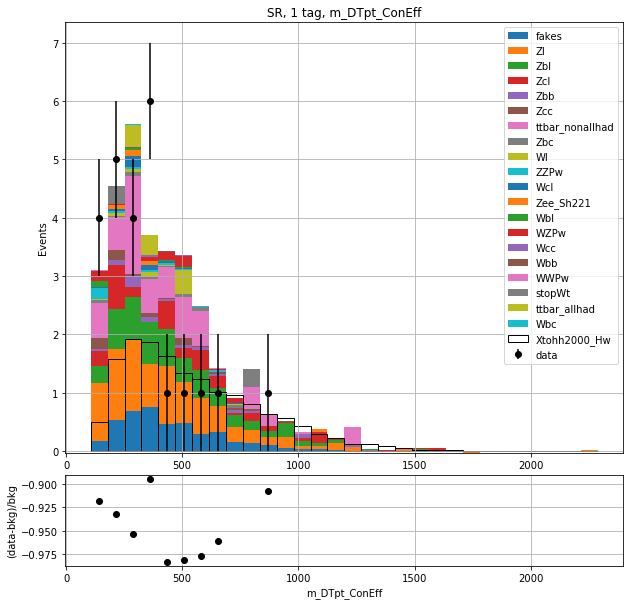

::: SR 1 m_DTeta_ConEff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 1 0 0 3 0 0 2 1 2 1 0 3 0 2 0 2 2 0 0 2 1 1 0 0 0 1 0]
BACK [ 0.95529232  3.46544225  7.02169245  8.68841101  3.76709075  6.91542492
  8.75258806 13.85743472 24.11404433 20.87753266 11.66366636 26.94178564
 29.41419464 34.96784937 37.36247892 56.00884505 31.2281304  35.14054967
 33.92744765 31.77012421 25.84971645 16.83962739 12.58251572  5.32484588
 11.52161942  8.59928903  5.64491296  6.60388613  2.98697472  2.46600151]
DIFF [-1.         -1.         -1.         -0.88490416 -1.         -1.
 -0.65724424 -1.         -1.         

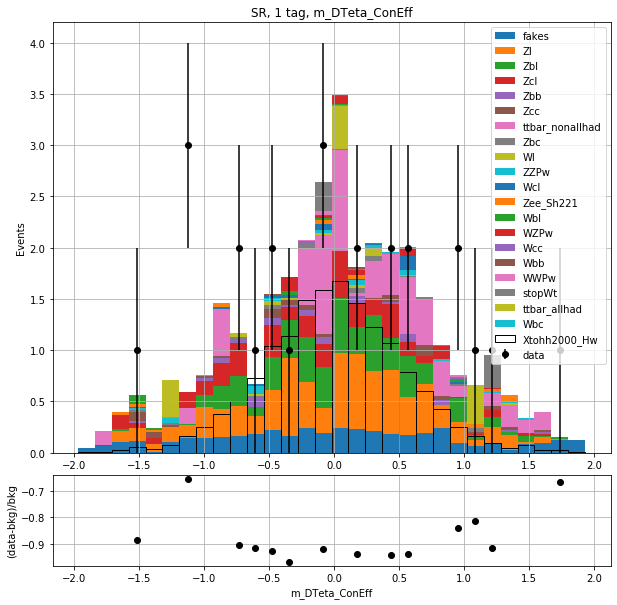

::: SR 1 m_DTphi_ConEff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 1 0 0 1 0 1 1 2 2 0 2 0 0 1 3 0 1 0 1 0 1 0 0 0 0 3 3]
BACK [ 8.29542309 21.65169463 13.99881009 24.42342188 16.72825614 18.8437757
 15.31575856 23.91378475 14.19029891 21.30394713 21.76590025 16.91754579
 28.48303935 16.29686598 20.86199677 18.2404908  17.27970028  9.72756573
 23.64467343 13.7736889  17.89499546 15.15722199 13.02523857 23.98453356
 22.44597545 14.89129103 13.90076402 15.91648543  7.93185452 14.45439363]
DIFF [-1.         -1.         -0.92856536 -0.9590557  -1.         -1.
 -0.93470777 -1.         -0.92952932 -

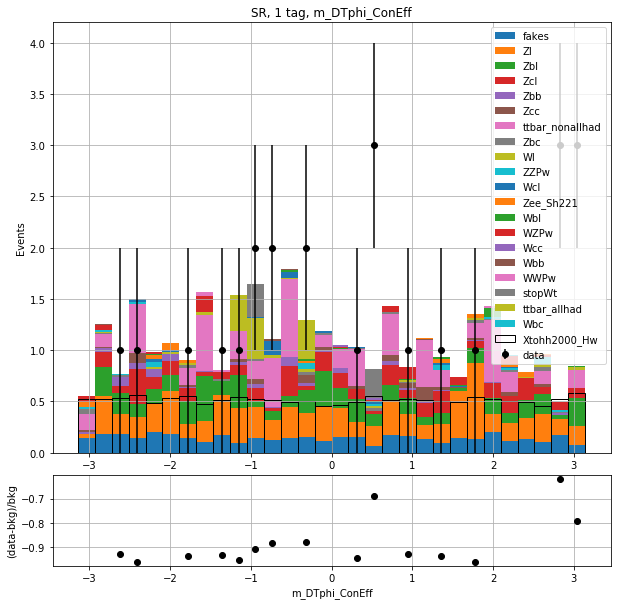

::: SR 1 m_DTm_ConEff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 525.25914332   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         

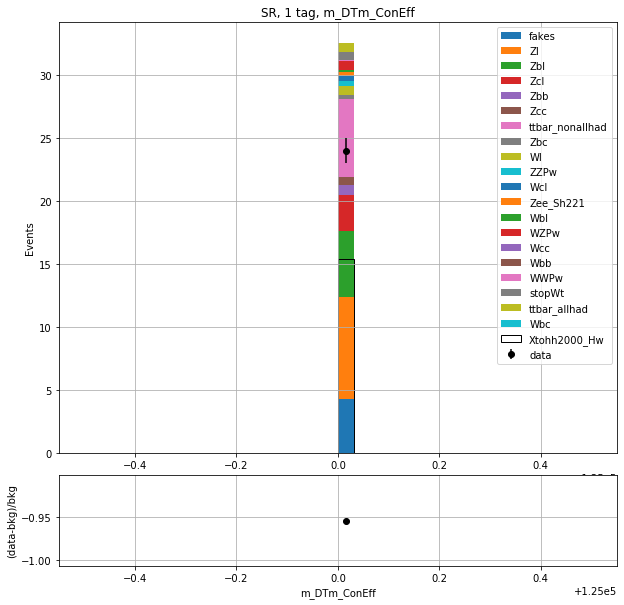

::: SR 1 m_DTpt_ConVis
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495


/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


DATA [1 2 0 4 2 4 1 4 3 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
BACK [ 1.21230305e+01  2.63839946e+01  2.02990761e+01  1.55701392e+01
  5.60689548e+01  6.45982249e+01  6.64449991e+01  5.22264228e+01
  6.01257271e+01  3.99506297e+01  2.13590412e+01  2.78355823e+01
  2.22309577e+01  1.17313781e+01  8.23766461e+00  9.61667812e+00
  2.99580437e+00  2.54878876e+00  1.37955189e+00  8.89276505e-01
  2.70896912e-01  5.84168673e-01  1.22751236e-01  5.81281304e-01
  6.83124542e-01  3.49499702e-01 -2.17437744e-03  5.39481640e-02
  0.00000000e+00  0.00000000e+00]
DIFF [-0.91751237 -0.92419647 -1.         -0.74309799 -0.96432964 -0.93807879
 -0.98494996 -0.92341042 -0.95010455 -0.97496911 -1.         -0.96407476
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.                 nan         inf]


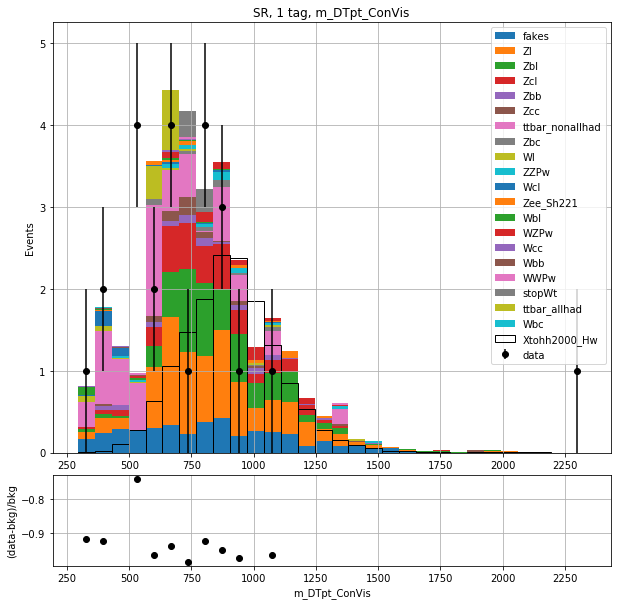

::: SR 1 m_DTeta_ConVis
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 1 1 1 2 0 1 1 1 1 0 2 1 0 1 1 1 2 1 0 1 1 0 0 2 0 1 0]
BACK [ 7.64401582  5.1332902  15.29420705  5.67735758  3.34754174 10.62351022
 15.82527643 20.05619457 18.36207115 16.88587087 18.18820228 24.50903005
 25.98410683 26.42915376 32.03648653 44.89876418 22.99389446 25.1644603
 32.78607301 18.42260286 25.5656981  25.21920675 21.72674077 17.00181636
  8.43119718  5.07748495  6.68750039 14.14408827  6.80150175  4.34204531]
DIFF [-1.         -1.         -0.93461577 -0.82386172 -0.70127333 -0.90586915
 -0.8736199  -1.         -0.94

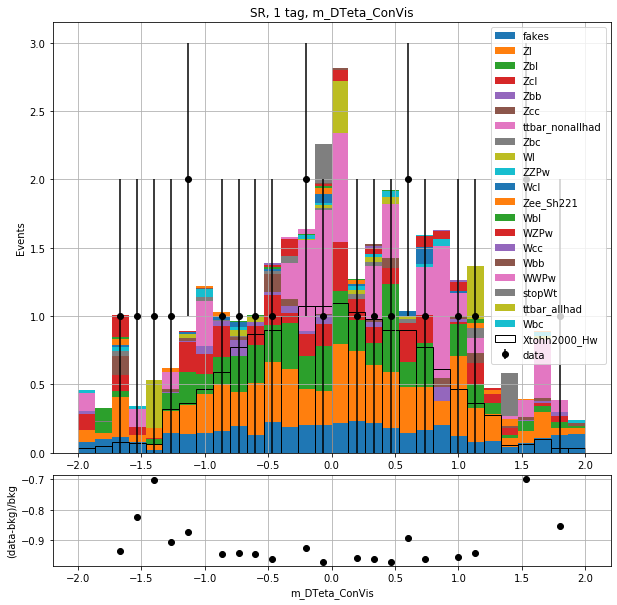

::: SR 1 m_DTphi_ConVis
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [1 0 0 2 0 0 1 0 1 1 2 0 3 0 1 0 1 3 0 0 1 1 0 0 1 0 0 0 3 2]
BACK [ 5.65093586 19.7374404  15.98111437 23.46330858 16.65601345 18.010538
 15.09672485 24.10396747 18.99186217 17.20193271 22.3320972  19.70154311
 19.54460713 21.61259966 21.20632037 19.3101161  14.99497522 12.59569794
 19.22039472 16.91136934 16.09549654 18.01872262 11.13319151 23.72256254
 23.18739963 14.9462396  14.26739441 14.71633913  7.845597   19.00289039]
DIFF [-0.82303816 -1.         -1.         -0.91476053 -1.         -1.
 -0.93376047 -1.         -0.94734587 -0

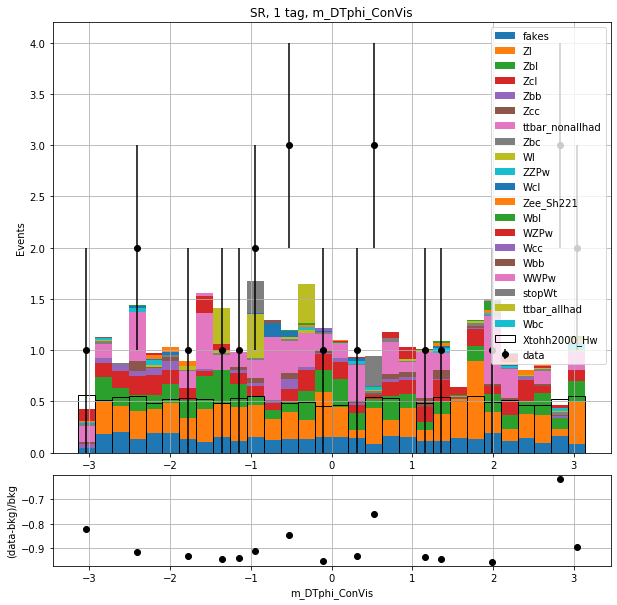

::: SR 1 m_DTm_ConVis
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 525.25914332   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         

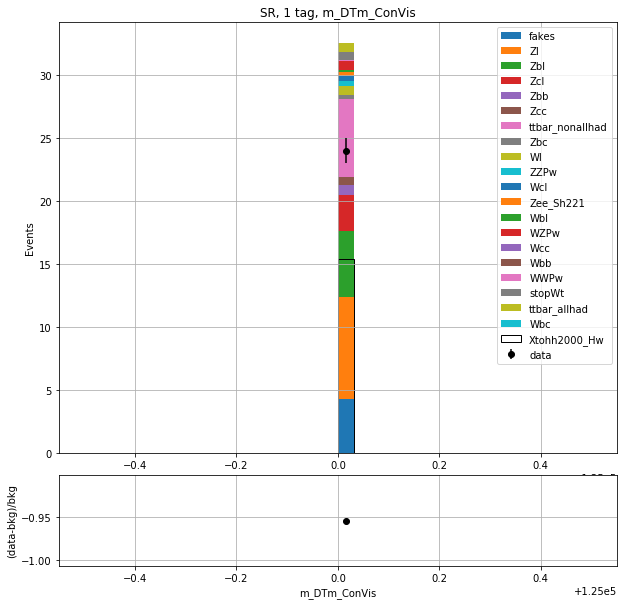

::: SR 1 m_dPhiFTwDT
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 3 3 3 3 9]
BACK [-2.45449762e-02  0.00000000e+00 -8.56814440e-04 -9.43490304e-04
 -2.89345253e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.72172800e-01  3.19215171e-01  6.42815977e-02
  1.82010200e-01  5.58200199e-02  3.43462940e-01  8.57360552e-01
  1.08125601e+00  1.16522691e+00  1.27130744e+00  1.95054110e+00
  2.08490430e+00  3.21658332e+00  5.00082248e+00  1.08318569e+01
  1.68398405e+01  1.75454105e+01  2.83226491e+01  5.21882962e+01
  1.09712835e+02  2.7

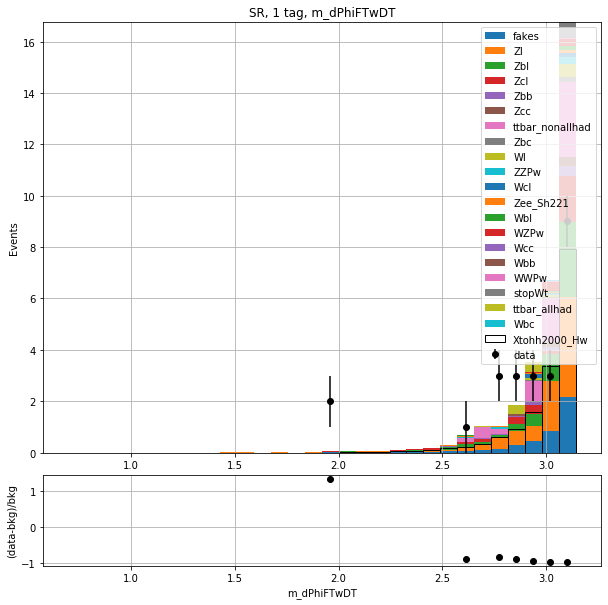

::: SR 1 m_dRFJwDT
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 0 0 0 2 0 0 0 0 0 0 1 5 7 5 1 1 0 0 0 0 1 1 0 0 0 0 0]
BACK [-5.44229941e-02  0.00000000e+00  0.00000000e+00  4.13672935e-01
 -1.37283327e-02 -2.34053005e-02  3.13490021e-01  7.57025686e-01
  1.36278192e+00  1.84147531e+00  2.33069465e+00  5.75488112e+00
  1.29480664e+01  1.93466075e+01  4.29492915e+01  1.40608268e+02
  1.45859365e+02  5.44133872e+01  3.34115033e+01  2.07379474e+01
  1.72306205e+01  1.13034481e+01  3.17800123e+00  5.40083718e+00
  1.67800200e+00  1.81878793e+00  1.05073166e+00  3.21483612e-01
  1.91850662e-01  1.286

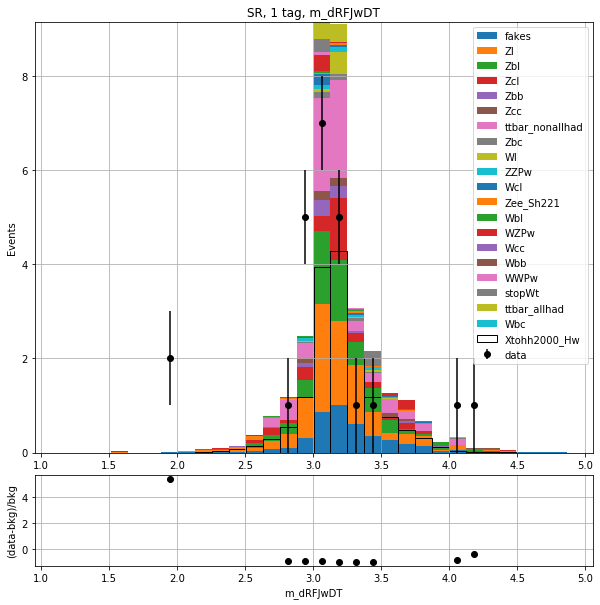

::: SR 1 m_dPhiDTwMET
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 0 0 0 0 1 0 2 0 1 2 2 2 3 0 4 2 0 1 0 1 1 0 1 1 0 0 0]
BACK [ 3.09781823  1.51410098  4.759386   10.68757402  4.34615677  4.32491061
  5.74577383  6.91292176  6.95281485 13.87652771 21.64552587 26.04199875
 43.37068293 58.94315352 66.65893527 70.18865821 42.24209225 28.265755
 29.55344611 17.64225852 21.88592795 12.54696173  7.70750916 -5.41042221
  3.08665602  3.97078997  1.36533406  5.626663    4.1767807   3.53275332]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.85534336 -1.         -0.8

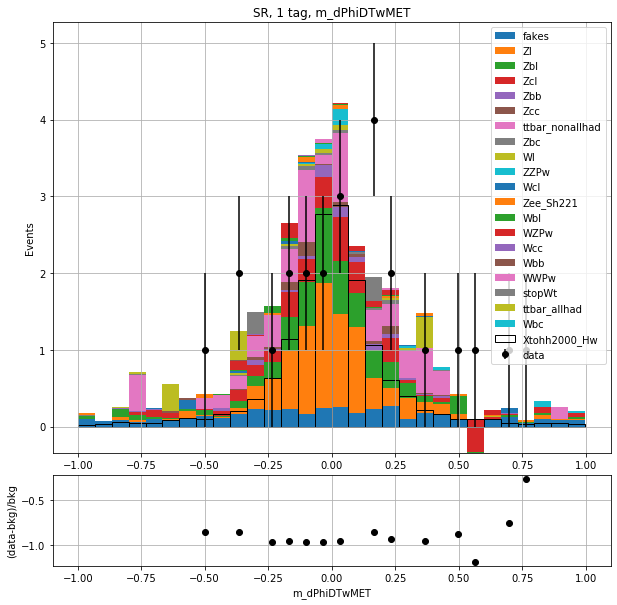

::: SR 1 m_MET
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [2 5 4 3 5 0 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 9.88256019e+01  1.14915733e+02  7.85962298e+01  7.66856250e+01
  4.95124559e+01  3.09148673e+01  1.71176657e+01  1.75149152e+01
  1.11005882e+01  1.76199902e+01  4.33954484e+00  3.64058727e+00
  1.01679635e+00  7.64539242e-01  4.87096786e-01  3.58349085e-01
  1.72409058e-01  1.14356327e+00 -1.31806374e-01  2.62769699e-01
  1.58620834e-01  1.12694025e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.35957718e-01  0.00000000e+00 -2.33650208e-03
  0.00000000e+00 -3.1375885

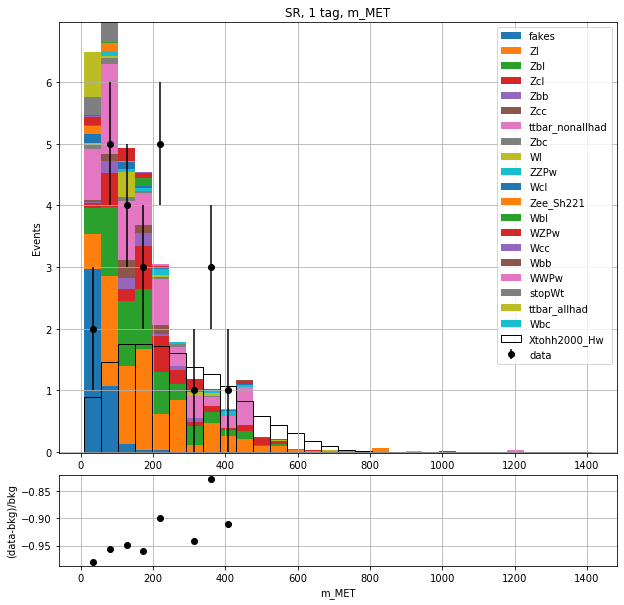

::: SR 1 m_hhm
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 1 6 7 5 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-9.43490522e-04  2.39212110e-01  7.52202915e-02  7.26421269e+01
  1.33941933e+02  1.10588100e+02  7.18646134e+01  4.14912173e+01
  2.51153974e+01  1.86238002e+01  1.72326114e+01  1.08047728e+01
  5.09784678e+00  6.50900925e+00  2.76344436e+00  1.63313675e+00
  3.25787565e+00  1.71189737e+00 -5.98978996e-02  6.28585815e-01
  1.28021240e-01  3.19213867e-01  1.56059265e-01  2.57301331e-01
 -3.57103348e-01  1.59961700e-01  0.00000000e+00 -5.19752502e-03
  0.00000000e+00  4.4128418

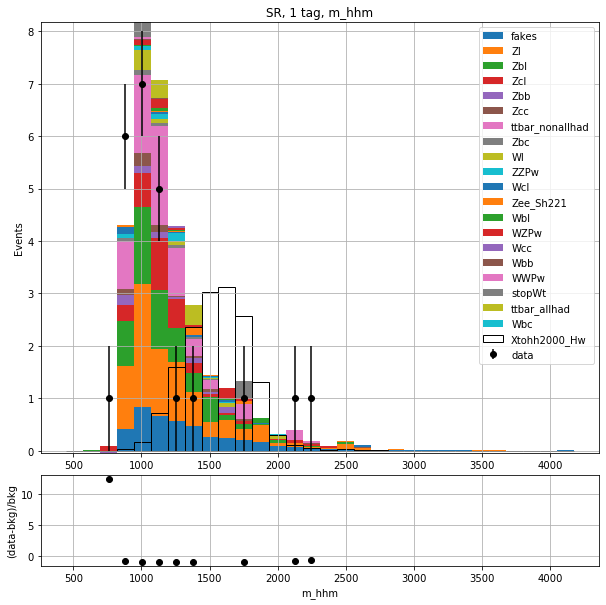

::: SR 1 m_bbttpt
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 3 5 7 4 2 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 4.49426248e+01  9.82208883e+01  1.18326819e+02  8.86014831e+01
  6.43937540e+01  4.00808319e+01  2.38699304e+01  1.81506609e+01
  1.25177805e+01  5.31911230e+00  4.02102980e+00  2.67358160e+00
  1.19683933e+00  1.20886040e+00  2.49632835e-01  6.52573824e-01
  1.56312943e-01  1.84484482e-01  3.13282967e-01 -6.67572021e-05
 -9.34600830e-04 -3.12709808e-02  1.25398636e-01 -1.44958496e-03
  0.00000000e+00  2.95352936e-03  0.00000000e+00  8.27493668e-02
  0.00000000e+00  1.3172

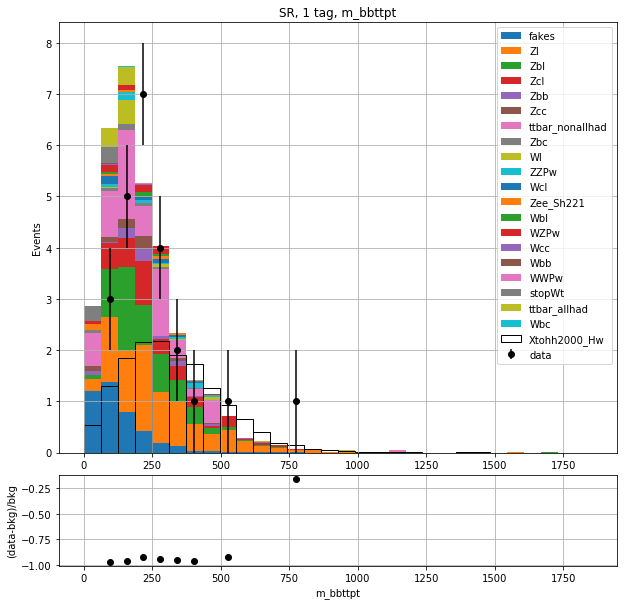

::: SR 1 m_hhm_Coll
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 525.25914332   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         na

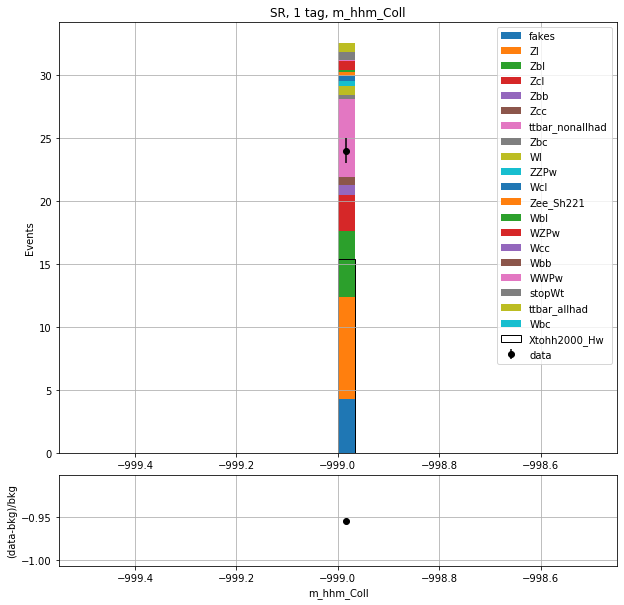

::: SR 1 m_hhm_Eff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 0 1 6 5 5 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-9.43490522e-04 -3.82733066e-02  1.69570218e+00  1.07386079e+01
  8.11961221e+01  1.00801127e+02  1.05024390e+02  6.40610084e+01
  4.25640819e+01  3.33016657e+01  2.55166417e+01  2.19527775e+01
  9.69198272e+00  1.10165523e+01  5.47350917e+00  2.62107384e+00
  4.07551757e+00  3.80568564e-01  2.00565314e+00  8.50445271e-01
  3.87832642e-01  3.17077637e-01  2.52456665e-01  9.07976151e-01
  1.35042191e-01 -2.62755156e-01  1.59961700e-01  0.00000000e+00
  2.80981064e-01  1.527

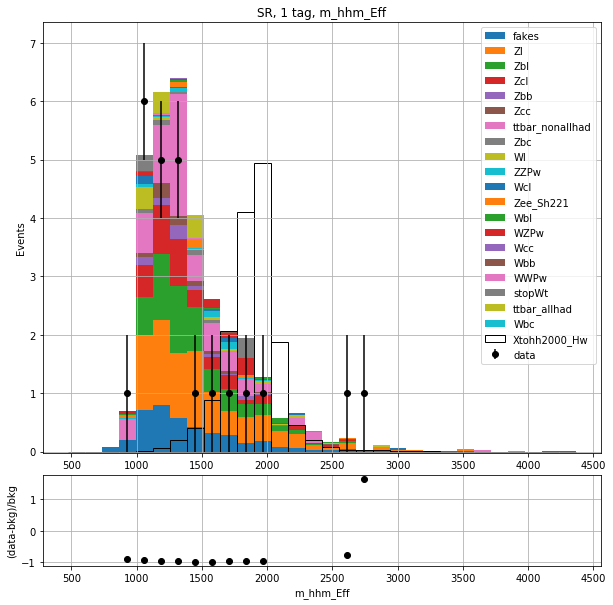

::: SR 1 m_hhm_ConEff
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 3 3 1 1 6 3 0 1 3 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-9.43490522e-04  5.07696099e+00  2.35768559e+01  4.28899074e+01
  4.83908693e+01  6.76915982e+01  6.96613507e+01  6.71207592e+01
  4.21747223e+01  4.23717298e+01  2.39717803e+01  2.27647125e+01
  1.16554008e+01  1.49569809e+01  1.79050593e+01  5.86977699e+00
  6.40945329e+00  5.18923354e+00  2.38258776e+00  2.06544304e+00
  1.16599298e+00  3.39017868e-01  1.09749627e+00 -1.83113396e-01
  2.24919319e-01 -2.83241272e-03  1.46627426e-01  0.00000000e+00
 -2.47955322e-04  3.

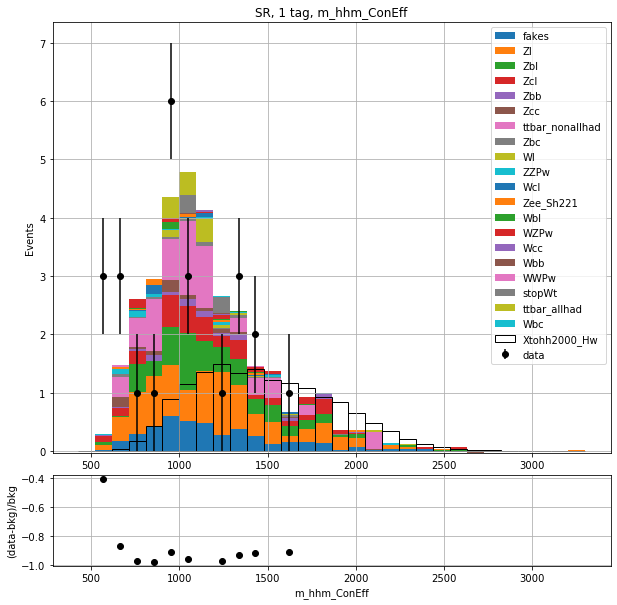

::: SR 1 m_hhm_ConVis
df_data.shape (24, 3)
df_signal.shape (11948, 3)
fakes 5939 4.2270107
Zl 585 8.125347
Zbl 443 5.299444
Zcl 240 2.8465877
Zbb 60 0.7567646
Zcc 52 0.6875743
ttbar_nonallhad 39 6.135286
Zbc 34 0.3532243
Wl 20 0.69261587
ZZPw 19 0.43407068
Wcl 16 0.37479803
Zee_Sh221 15 0.2890992
Wbl 14 0.20982926
WZPw 11 0.66580355
Wcc 5 0.030090112
Wbb 4 0.022925423
WWPw 3 0.073890716
stopWt 2 0.5997298
ttbar_allhad 2 0.7354356
Wbc 1 0.011458495
DATA [0 0 4 3 6 6 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.91993210e-01  6.70491444e+00  8.72617452e+00  5.62042679e+01
  1.09129685e+02  9.33255049e+01  7.52590439e+01  6.80975371e+01
  2.32992504e+01  2.52099266e+01  1.77641404e+01  1.26599710e+01
  9.66049814e+00  4.25187793e+00  5.05834553e+00  2.26569796e+00
  2.45140213e+00  1.41240096e+00  9.31801796e-01  5.60238838e-01
  1.00876999e+00  3.19213867e-01  6.17081881e-01 -1.64985657e-03
 -4.67761755e-01  0.00000000e+00  8.08954239e-02  0.00000000e+00
  9.69791412e-02  4.

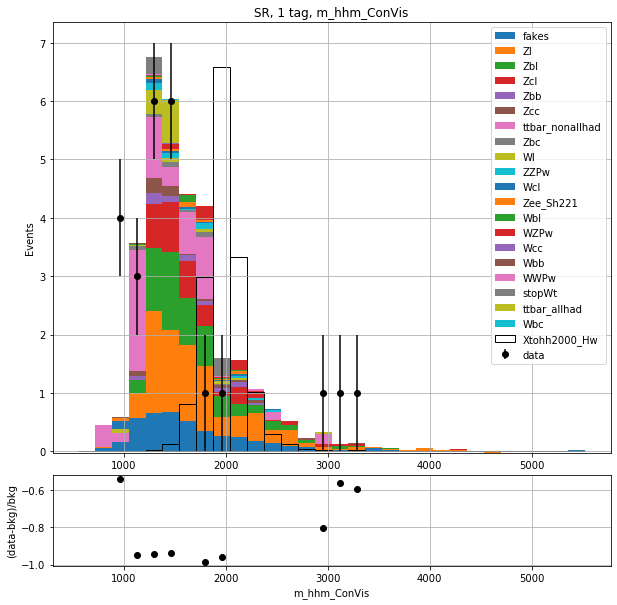

-->df.shape (11192, 38)
::: SR 2 m_AntiBTag
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.24164199e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.99009950e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.15523174e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.18922988e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.58588314e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-0.91946149         nan         nan         nan         nan -0.79960319
         nan         nan         nan         nan -1.             

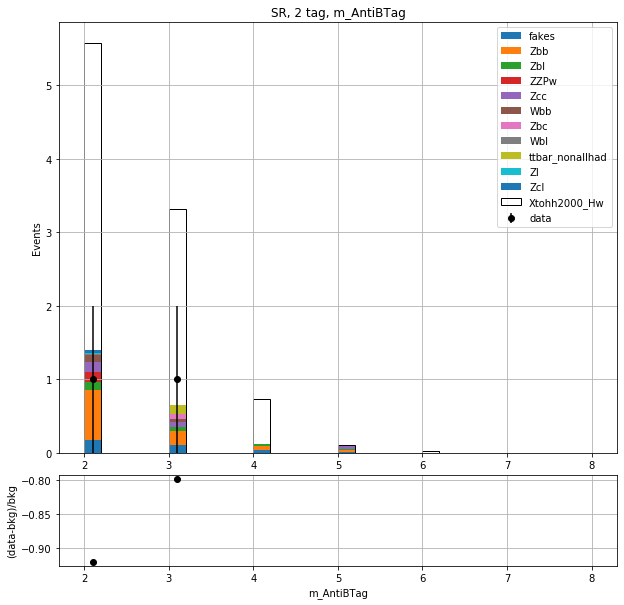

::: SR 2 m_AntiTauTag
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [15.79678068  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          3.48312774]
DIFF [-0.87339192         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         na

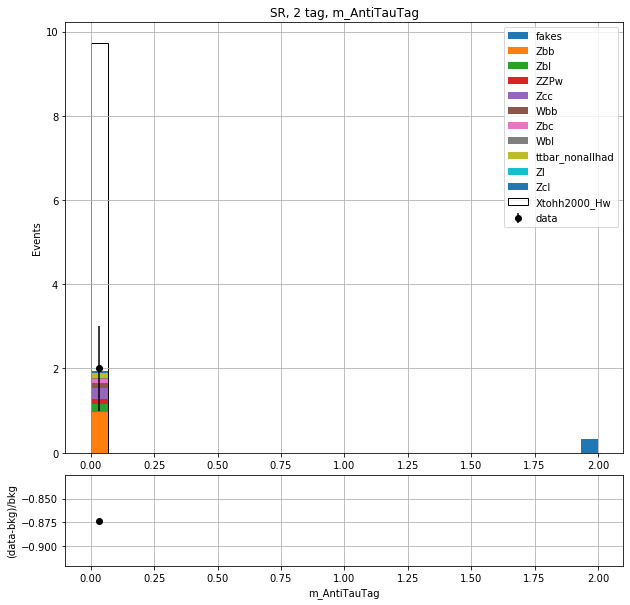

::: SR 2 m_FJpt
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-3.33174501e-04  1.49391351e-01  1.36149223e+00  3.10924888e+00
  5.43224836e+00  3.87923911e+00  1.87109382e+00  1.46813207e+00
  6.29060715e-01  1.82415754e-01  3.25744852e-01  2.94974253e-01
  2.31950089e-01  1.07378920e-01  2.49212980e-02  1.80389717e-01
 -7.19577074e-03 -3.51199508e-03 -1.15165114e-03  4.55852449e-02
 -3.47167253e-04 -8.85128975e-05 -2.68161297e-04 -2.14725733e-04
 -1.17361546e-04 -8.58902931e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.26173210e-05]
DIFF [-1.         -1.         -1.         -1.         -0.63182832 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.        

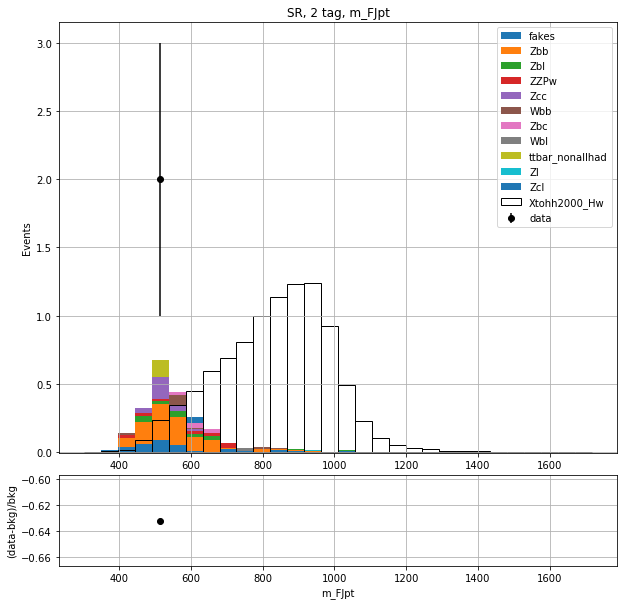

::: SR 2 m_FJeta
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
BACK [ 0.05257561  0.15293952  1.22059861  0.25260368  0.0963447   0.41218352
 -0.21044437  0.24883968  1.67207566  2.58685893  0.56261316  0.52750343
  0.83647768  0.72848372  1.47262134  0.27875602  1.51223387  0.66490994
  0.23473791  1.31563473  0.85314821  0.76413003  0.62426409  0.60509939
  0.37814914  0.38258268  0.79083055  0.03018913  0.15843925  0.07453454]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.          0.89572226
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.          0.17212929 -1.         -1.         -1.
 -1.         -1.    

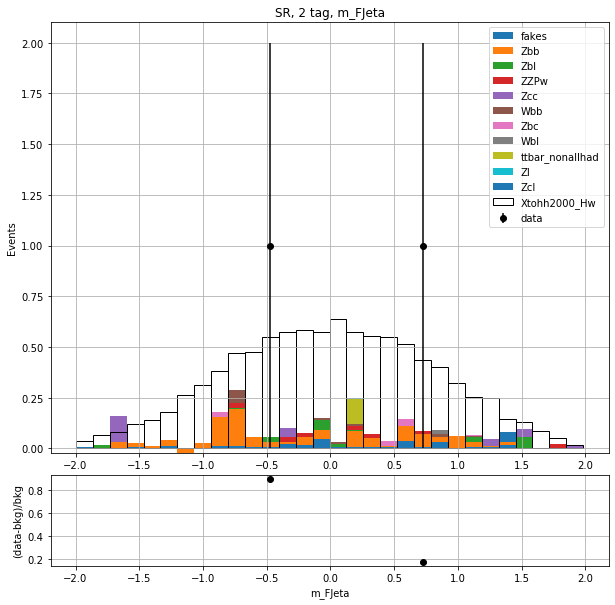

::: SR 2 m_FJphi
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.27901198 0.03720792 1.23172352 0.41495919 0.3825284  0.23701858
 0.34453435 0.38884875 1.52249103 0.75218203 0.49259558 0.90832424
 0.53100528 0.5335184  0.52527487 0.19195218 1.15202273 0.97538048
 0.2333913  0.42804813 0.55075173 0.77605285 1.23857129 0.63073117
 0.52889391 2.65824367 0.92113202 0.14555675 0.24273911 0.02522388]
DIFF [ 2.58407554 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.          4.20963075 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.      

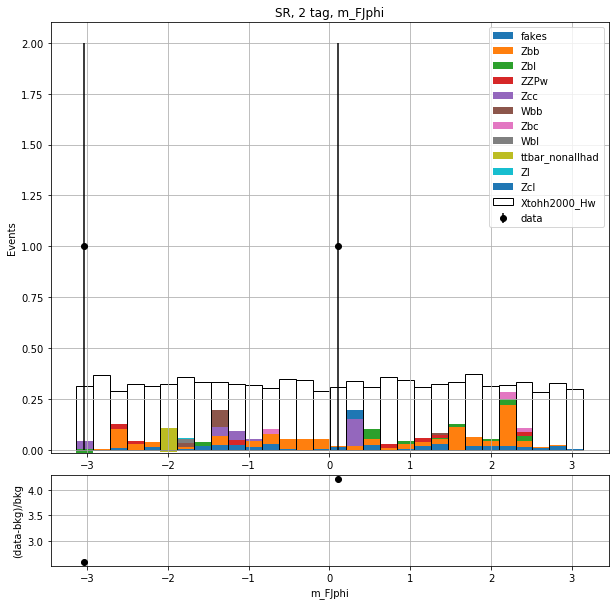

::: SR 2 m_FJm
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.32060789e+00  4.14260740e+00  3.18909645e+00  2.28149670e+00
  1.58914393e+00  2.61391363e+00  1.05404541e+00  9.29821640e-01
  3.58185500e-01  1.45000890e-01  4.79778152e-01  4.67819396e-01
  4.19526696e-02  1.21943593e-01  2.47942597e-01  9.42155719e-02
  5.41876256e-02  6.33824617e-02  8.55650902e-02 -1.05887651e-04
 -2.37345695e-04 -1.06543303e-04 -1.52766705e-04  0.00000000e+00
 -1.27524137e-04  0.00000000e+00  0.00000000e+00 -6.09755516e-05
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.37286312 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         

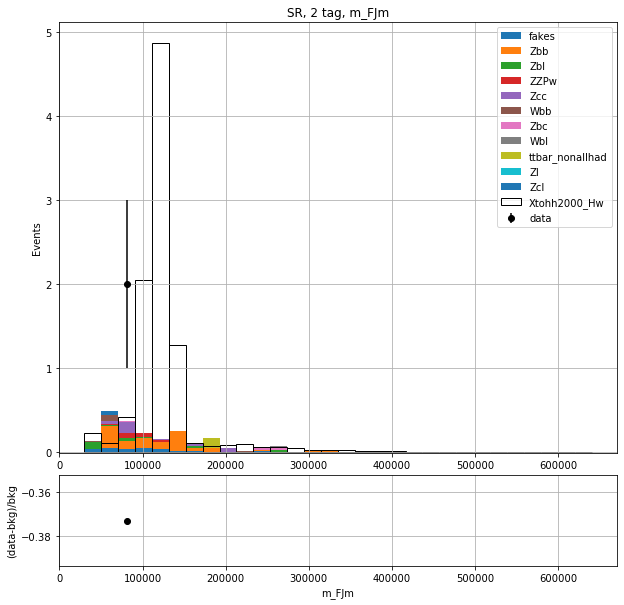

::: SR 2 m_DTpt
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.62614884e+00  2.07382672e+00  1.71944964e+00  2.77052103e+00
  1.48030942e+00  2.60622755e+00  1.02213588e+00  1.78644927e+00
  6.75874472e-01  6.27175421e-02  6.47327349e-01  1.55530930e-01
  4.19045210e-01 -1.42656565e-02 -1.18459761e-02  7.39433467e-02
  7.75969625e-02 -5.33929467e-03  1.22414827e-01 -3.11827660e-03
 -9.95606184e-04 -1.49849057e-03 -1.37358904e-04 -1.61716342e-03
 -1.48177147e-04 -4.85181808e-04  0.00000000e+00  0.00000000e+00
 -1.55061483e-04  0.00000000e+00]
DIFF [-1.         -1.         -1.         -0.63905706 -0.32446556 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.        

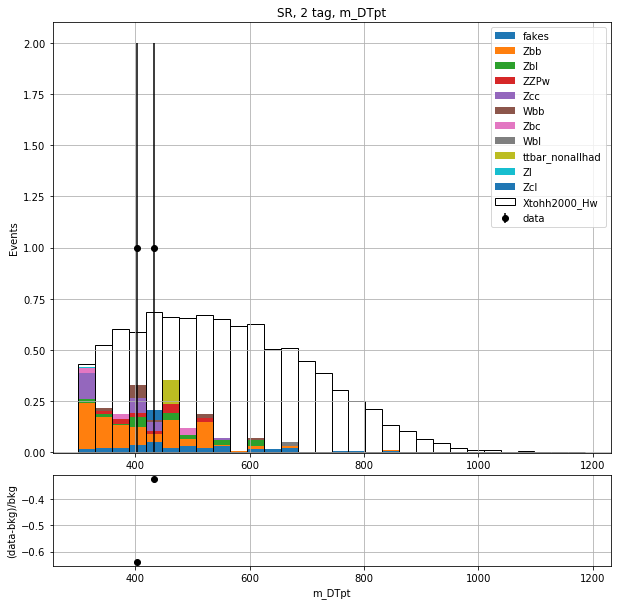

::: SR 2 m_DTeta
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
BACK [0.0531913  0.11160676 0.59872612 0.05185618 0.24721952 1.29126965
 0.53284931 0.17605651 0.84287166 2.06305101 0.38330526 0.20285024
 0.31180663 0.18179848 1.75552507 1.62254364 0.89676271 0.01334454
 0.16808719 1.31347822 2.11029264 0.86607511 0.54009789 0.51983413
 0.51899895 0.23644936 0.25920284 0.35126916 0.65781158 0.40168327]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.          0.15463427 -1.         -1.
  0.92678617 -1.         -1.         -1.         -1.      

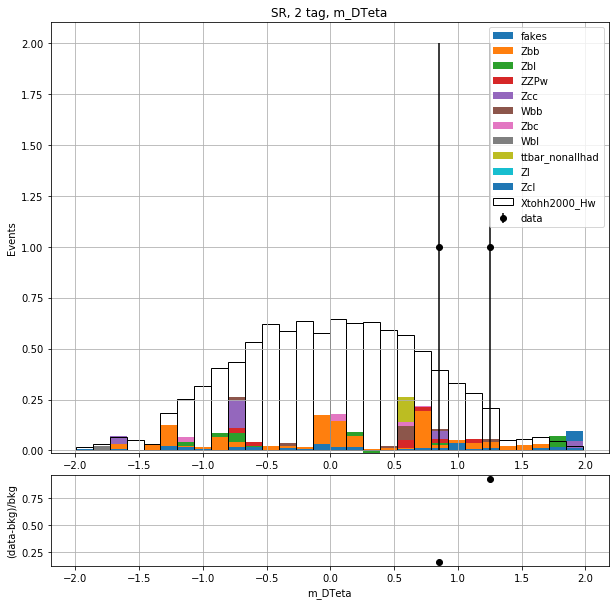

::: SR 2 m_DTphi
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [1.25339096 0.41032804 0.68783147 0.17305718 0.78805558 1.73060123
 0.58411717 0.14324798 0.66505207 2.02608248 1.13418482 0.44139588
 0.53775983 0.1539095  0.3132932  0.07699767 0.26680681 0.93157616
 0.41684704 0.27790511 0.56763427 0.20754552 0.49511394 0.83649992
 1.08982517 0.92086574 0.82081085 0.41264643 0.62433752 0.29219213]
DIFF [-0.20216435 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         11.9874064  -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.      

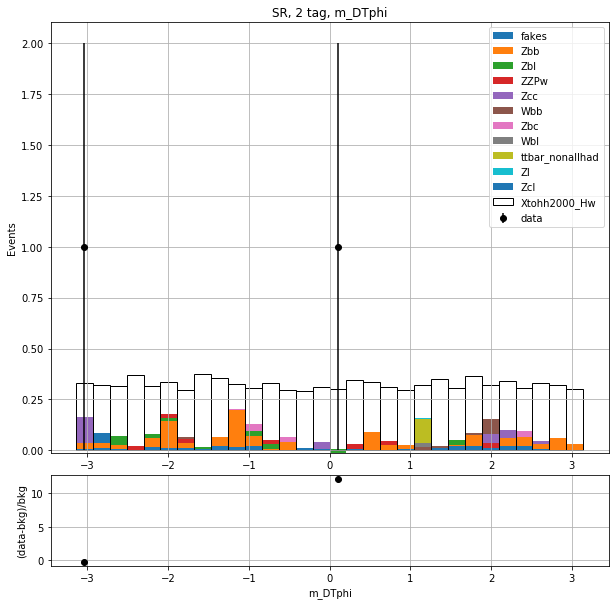

::: SR 2 m_DTm
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-4.33053425e-04  3.08838923e-01  6.67547862e-01  1.21520837e+00
  3.61829516e+00  3.09943344e+00  2.72477548e+00  2.24066877e+00
  1.39192122e+00  5.29067367e-01  1.34361669e-01  5.45985013e-01
  1.80622751e+00  2.23305911e-01  1.99126720e-01  5.63564897e-03
  1.05553925e-01  1.56621933e-01  3.53550017e-02  2.22920179e-01
 -3.90112400e-04 -8.42511654e-05  5.36147058e-02  0.00000000e+00
 -9.31352377e-04 -2.62260437e-06  0.00000000e+00 -1.13132596e-03
 -1.30474567e-04 -1.44702196e-03]
DIFF [-1.         -1.         -1.          0.64580828 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         

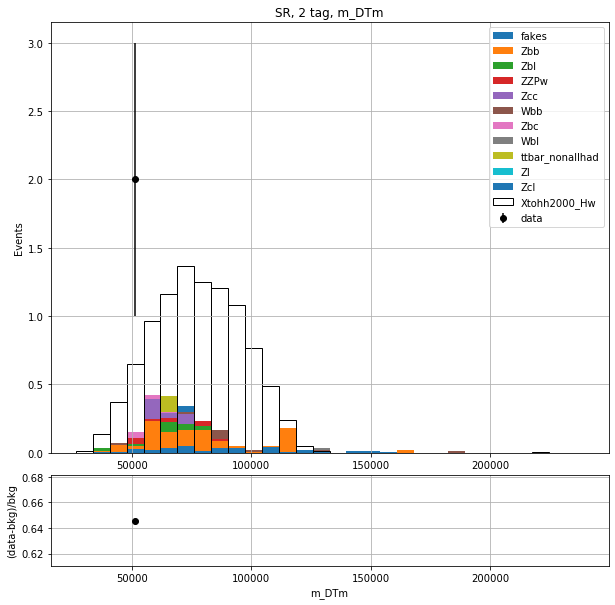

::: SR 2 m_DTpt_Eff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.76774394e-01  6.23573385e-01  1.17094270e+00  3.79950473e+00
  3.90656902e+00  2.80972669e+00  2.77690130e+00  1.03702260e+00
  1.13365616e+00  2.50535419e-01  8.43856264e-01 -1.28139764e-01
  3.68007973e-01  1.18114680e-01  1.79387063e-01  9.86198187e-02
 -1.83988810e-02 -1.10962391e-02 -4.89968061e-03 -2.96550989e-03
 -3.26383114e-03  1.09721020e-01 -3.18974257e-04  4.64644730e-02
 -3.83228064e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -1.         -1.         -0.74402091 -0.6440935
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         

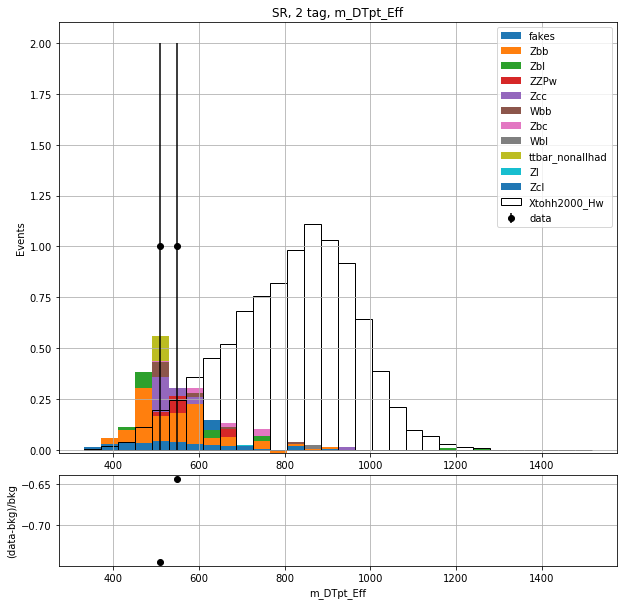

::: SR 2 m_DTeta_Eff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
BACK [0.03524845 0.05319188 0.08547786 0.39843391 0.20780074 1.1713417
 0.34078356 0.3379328  0.46176135 0.71804078 1.1539933  1.34339291
 0.35888465 0.27212781 1.60233594 2.13928165 0.59239831 0.25891805
 0.78716181 2.32901937 0.96895161 0.65564624 0.78458205 0.17027685
 0.66447297 0.2093671  0.23791185 0.41164871 0.49434227 0.03518912]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.          0.03204328 -1.         -1.         -1.
  0.50495212 -1.         -1.         -1.         -1.   

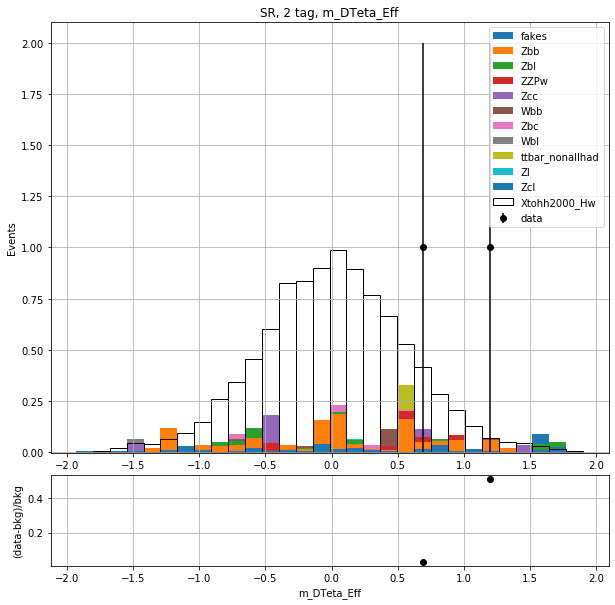

::: SR 2 m_DTphi_Eff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.60397932 1.34740982 0.68810296 0.01398448 1.01017709 1.6144825
 0.50541746 0.31188171 0.62837233 2.18441035 0.9764611  0.67003998
 0.37902125 0.08534512 0.34639965 0.0416525  0.31529203 0.88253053
 0.41891217 0.34744732 0.49115667 0.17603648 0.53295681 0.83502454
 1.1618927  0.65443352 1.01700547 0.45861872 0.57598031 0.00548649]
DIFF [ 0.65568584 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         23.00816241 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.   

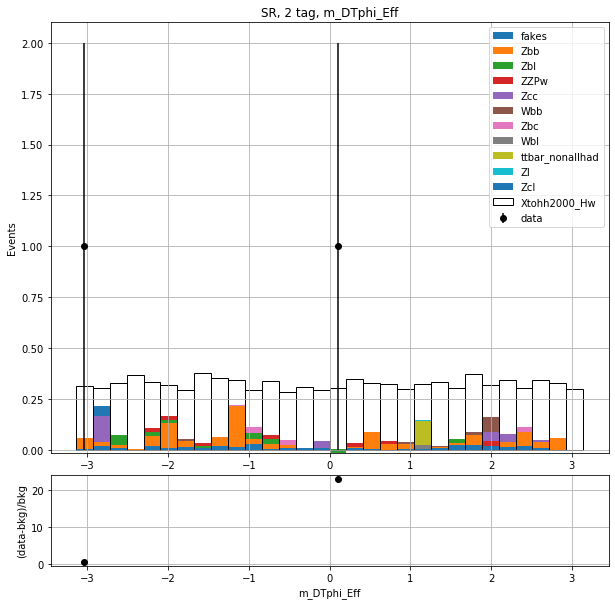

::: SR 2 m_DTm_Eff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.19391010e+00  2.21131355e+00  1.71156727e+00  3.11411085e+00
  1.60733930e+00  3.41776008e+00  1.25559682e+00  4.09816027e-01
  1.41759476e+00  6.62064433e-01  7.46091977e-01  4.47747409e-02
  2.96675473e-01  7.18662441e-02 -4.77281213e-03  3.56647730e-01
  2.87193894e-01  3.20760906e-02  2.40268588e-01  4.75101620e-02
 -5.67793846e-04  8.55280459e-02 -5.76972961e-05  7.58844614e-02
 -1.98334455e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.19563866e-05]
DIFF [-1.         -1.         -1.         -1.         -1.         -0.70741071
 -1.          1.44011931 -1.         -1.         -1.         -1.
 -1.         -1.         

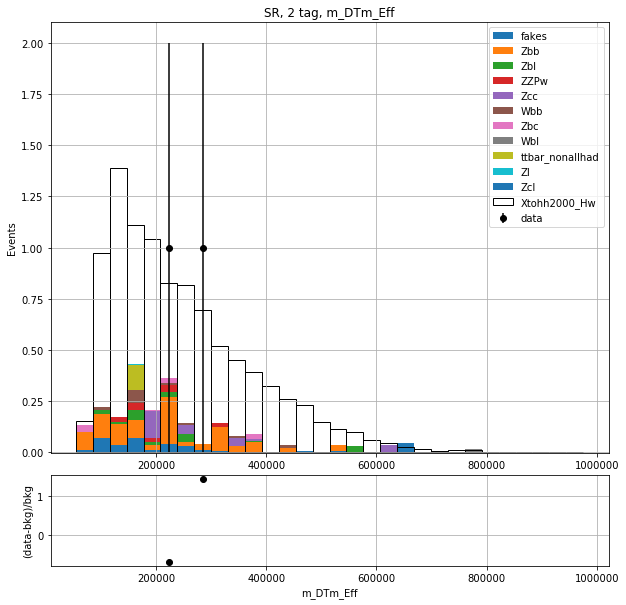

::: SR 2 m_DTpt_ConEff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.45661291e+00  1.84788970e+00  5.26171528e+00  2.26620983e+00
  2.44089231e+00  8.38833705e-01  1.31111056e+00  8.15152471e-01
  3.37830752e-01  6.76797479e-01  2.41469219e-01  4.11707669e-01
  7.87730008e-01  2.46107876e-02  6.94089830e-02 -3.51002812e-03
  4.29388881e-02 -2.11152434e-03 -1.07297301e-03  1.61740471e-01
 -6.04510307e-04 -5.95003366e-04  2.64228940e-01 -5.40912151e-04
  3.15355957e-02 -1.40964985e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.76972961e-05]
DIFF [-1.         -0.45884216 -1.         -0.55873459 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1. 

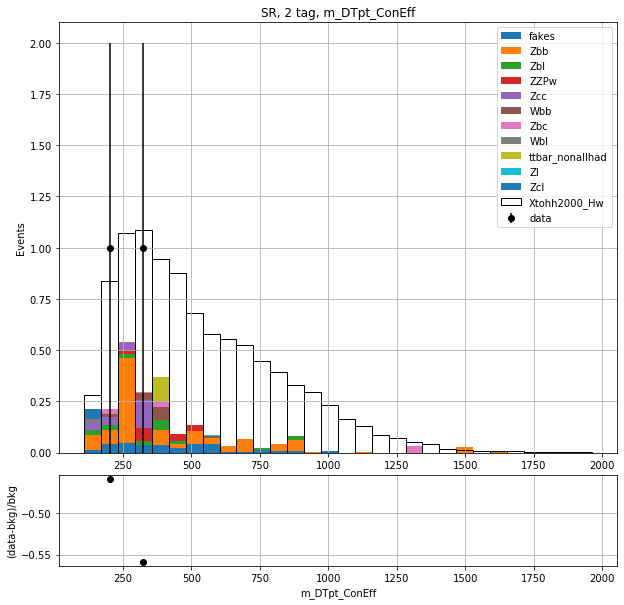

::: SR 2 m_DTeta_ConEff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
BACK [0.03524845 0.05319188 0.08547786 0.39843391 0.20780074 1.1713417
 0.34078356 0.3379328  0.46176135 0.71804078 1.1539933  1.34339291
 0.35888465 0.27212781 1.60233594 2.13928165 0.59239831 0.25891805
 0.78716181 2.32901937 0.96895161 0.65564624 0.78458205 0.17027685
 0.66447297 0.2093671  0.23791185 0.41164871 0.49434227 0.03518912]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.          0.03204328 -1.         -1.         -1.
  0.50495212 -1.         -1.         -1.         -1.

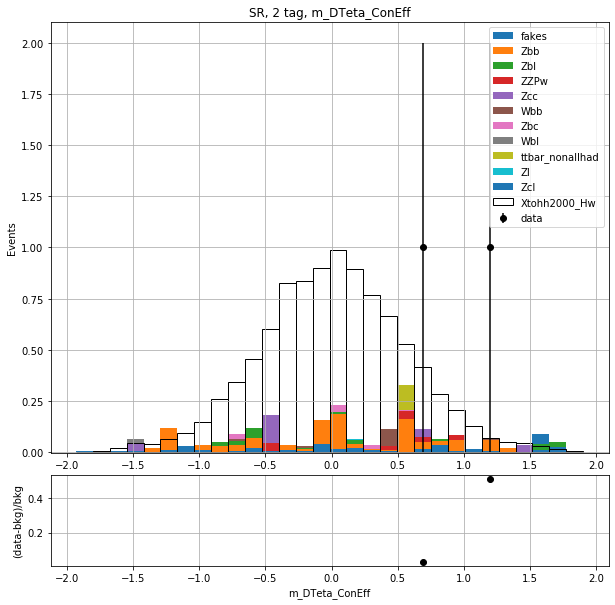

::: SR 2 m_DTphi_ConEff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.60397932 1.34740982 0.68810296 0.01398448 1.01017709 1.6144825
 0.50541746 0.31188171 0.62837233 2.18441035 0.9764611  0.67003998
 0.37902125 0.08534512 0.34639965 0.0416525  0.31529203 0.88253053
 0.41891217 0.34744732 0.49115667 0.17603648 0.53295681 0.83502454
 1.1618927  0.65443352 1.01700547 0.45861872 0.57598031 0.00548649]
DIFF [ 0.65568584 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         23.00816241 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.

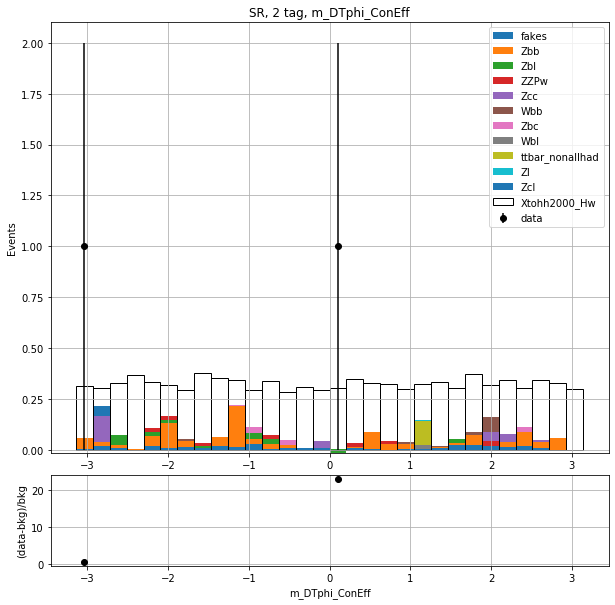

::: SR 2 m_DTm_ConEff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         19.27990842  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.89626507         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         na

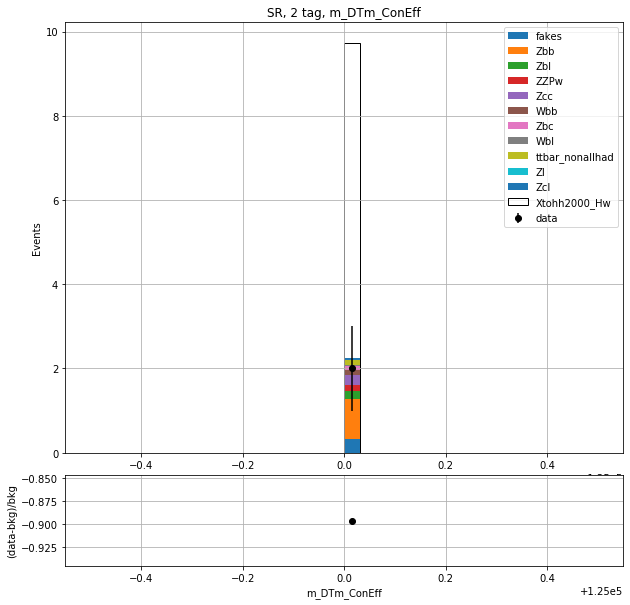

::: SR 2 m_DTpt_ConVis
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 2.08918497e+00  1.76555049e-01  2.82956652e-01  7.79792480e-01
  1.14954019e+00  1.80968940e+00  2.45522245e+00  2.27966558e+00
  2.77634393e+00  1.80411481e+00  9.75623310e-01  8.06263521e-01
  6.59710277e-01  4.36101258e-02  6.06507704e-01  1.12052411e-01
  1.91002741e-01  2.61068046e-02  3.87714505e-02  4.74303961e-02
  8.53467584e-02 -3.80277634e-04 -6.38276339e-04  8.58348906e-02
 -2.51442194e-04  0.00000000e+00  0.00000000e+00 -1.42604113e-04
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.          0.24028928
 -1.         21.93045

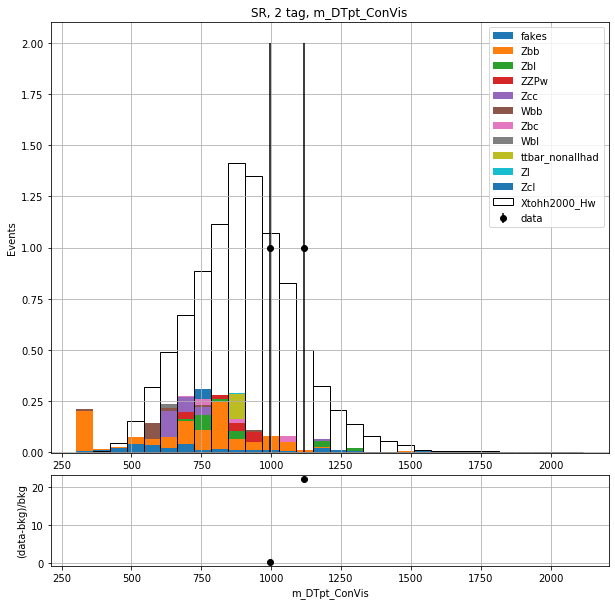

::: SR 2 m_DTeta_ConVis
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]
BACK [0.0531913  0.11160676 0.59872612 0.05185618 0.24721952 1.29126965
 0.53284931 0.17605651 0.84287166 2.06305101 0.38330526 0.20285024
 0.31180663 0.18179848 1.75552507 1.62254364 0.89676271 0.01334454
 0.16808719 1.31347822 2.11029264 0.86607511 0.54009789 0.51983413
 0.51899895 0.23644936 0.25920284 0.35126916 0.65781158 0.40168327]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.          0.15463427 -1.         -1.
  0.92678617 -1.         -1.         -1.         -1

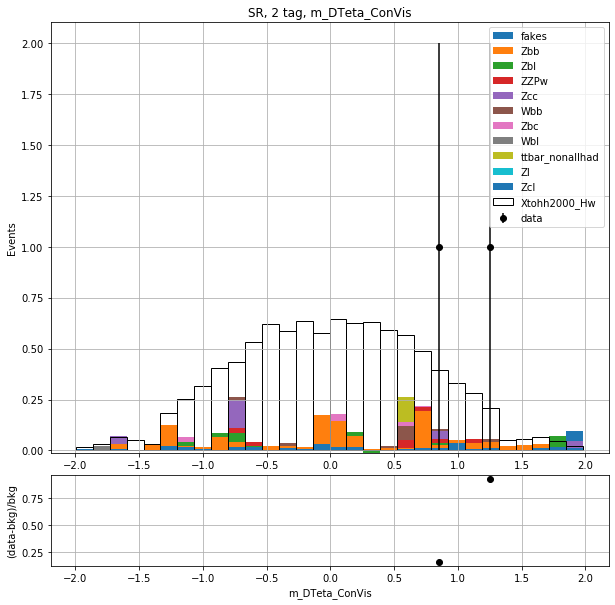

::: SR 2 m_DTphi_ConVis
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [1.25339096 0.41032804 0.68783147 0.17305718 0.78805558 1.73060123
 0.58411717 0.14324798 0.66505207 2.02608248 1.13418482 0.44139588
 0.53775983 0.1539095  0.3132932  0.07699767 0.26680681 0.93157616
 0.41684704 0.27790511 0.56763427 0.20754552 0.49511394 0.83649992
 1.08982517 0.92086574 0.82081085 0.41264643 0.62433752 0.29219213]
DIFF [-0.20216435 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         11.9874064  -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1

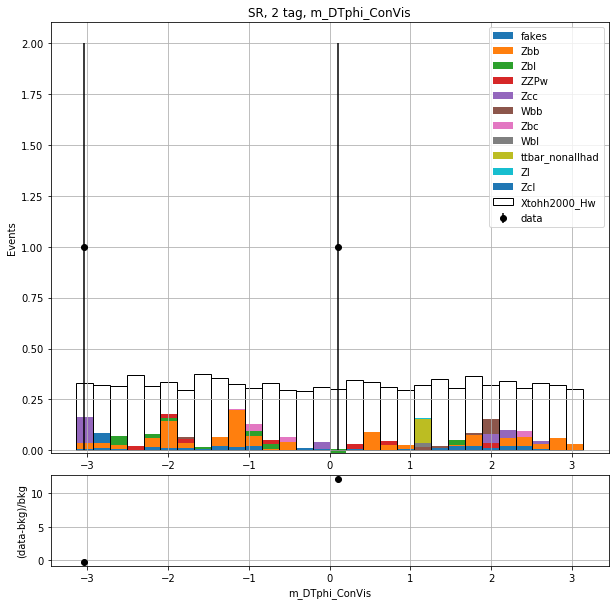

::: SR 2 m_DTm_ConVis
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         19.27990842  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.89626507         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         na

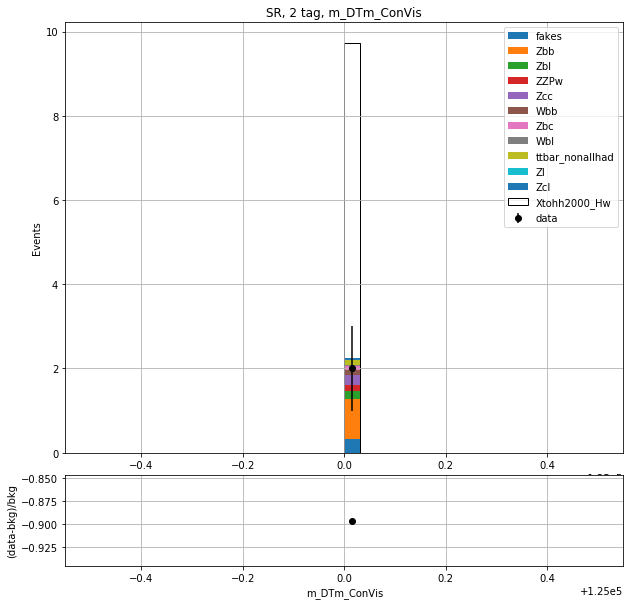

::: SR 2 m_dPhiFTwDT
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
BACK [-9.73921897e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.34012428e-04 -5.36437765e-05
 -8.38419197e-04 -9.79596516e-05  4.10070999e-02 -2.90185635e-04
 -1.65551101e-04 -2.60463671e-03 -1.11263574e-03  3.30625842e-02
  1.33669396e-01  8.63875523e-02  1.51807779e-01  1.69669140e-01
  1.63501971e+00  3.95096079e-01  1.25428672e+00  1.55746714e+00
  4.49459501e+00  9.33324309e+00]
DIFF [-1.                 nan         nan         nan         nan         nan
         nan         nan         nan         nan -1.         -1.
 -1.         -1.       

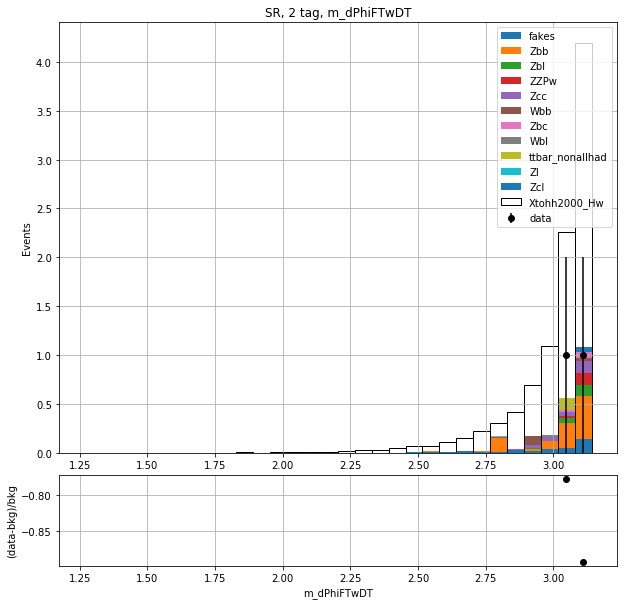

::: SR 2 m_dRFJwDT
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.00000000e+00  4.12096550e-02 -1.43617382e-04 -5.36424159e-04
 -5.95848862e-04  6.17534075e-02  6.60467311e-02  1.94330368e-01
  3.33957777e-01  1.71873857e+00  5.23313571e-01  3.81284420e+00
  4.39666473e+00  3.12895501e+00  1.12813526e+00  2.13497493e+00
  2.85681233e-01  7.06745654e-01  1.85298800e-01 -2.92944908e-03
  2.05615163e-01  1.86455771e-01  1.20393932e-01 -1.98662281e-04
 -1.38342381e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.33404946e-02]
DIFF [        nan -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -0.7377286
 -1.         -1.         -

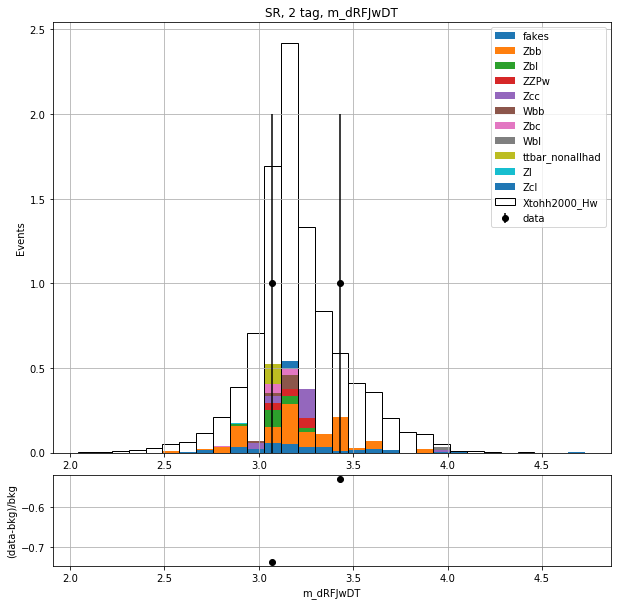

::: SR 2 m_dPhiDTwMET
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 8.27893247e-02  1.46326956e-01  2.64133800e-01  1.05308015e-01
  8.05477252e-01 -2.96481326e-03  5.05246975e-01  5.03393747e-02
 -1.91355050e-02  2.25860592e-01  1.53059861e+00  1.13201531e+00
  4.19910252e-03  1.55018663e+00  5.41011578e+00  1.22189091e+00
  1.43446168e+00  1.15700551e+00  9.13258612e-01  4.36260745e-01
  2.58768484e-01  5.86931273e-01  1.59923300e-01  4.43484843e-01
  1.35502279e-01  1.37728035e-01  2.07747638e-01  3.48859370e-01
 -2.52533853e-02  7.28478432e-02]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         18.86516531 -1.         -1.         -1.         -1.
 -1.         -1.         -1.  

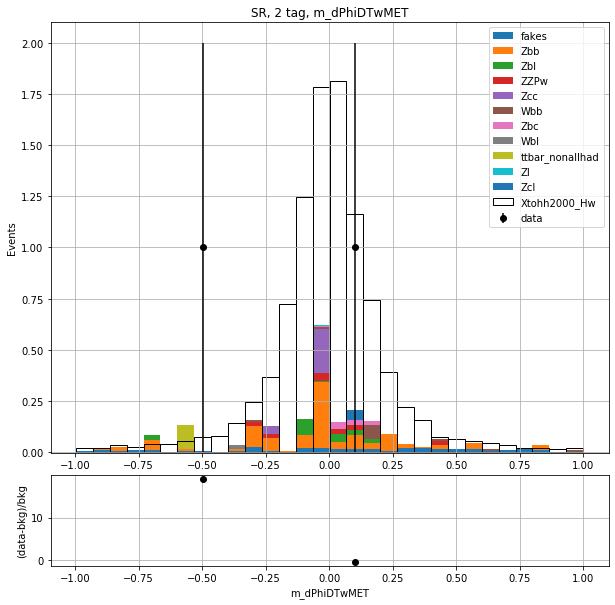

::: SR 2 m_MET
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.26759996e+00  3.71927227e+00  3.52706050e+00  1.74569241e+00
  3.52565780e+00  1.92863753e+00 -1.15129024e-01  3.36494040e-01
  5.85844897e-01  1.77236497e-02  2.57176300e-01  1.78254306e-01
  5.61470240e-02  4.32211757e-02 -5.08949161e-03  6.14237487e-02
 -2.27117538e-03 -2.38198042e-03 -1.26147270e-03 -6.71058893e-04
 -3.23563814e-04 -2.68489122e-04 -1.21951103e-04  1.10625163e-01
  0.00000000e+00  4.65985537e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.71647779 -0.4271614  -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         

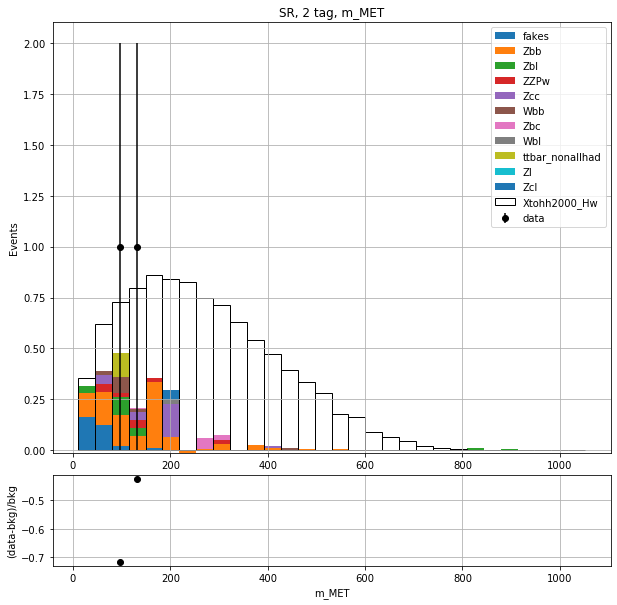

::: SR 2 m_hhm
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 7.91673204e-01  2.32455115e+00  5.22462891e+00  4.16721213e+00
  1.94592562e+00  1.03988237e+00  1.70202039e+00  4.44375455e-01
  2.12976113e-01  1.19617239e-01  1.51915520e-01  1.65452763e-01
  1.63287610e-01 -1.90587938e-02  2.86566108e-01  8.38420391e-02
  8.34925771e-02  6.43079579e-02  7.28910416e-02  0.00000000e+00
 -1.29491091e-04  0.00000000e+00  3.92926931e-02  0.00000000e+00
 -4.85181808e-04  7.67908990e-02 -2.92092562e-04  5.33404946e-02
  0.00000000e+00  8.58378410e-02]
DIFF [-1.         -1.         -0.80859885 -1.         -0.48610574 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         

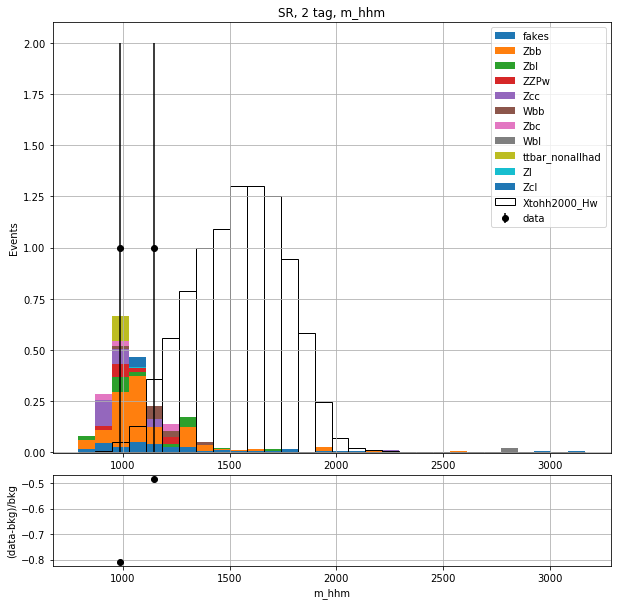

::: SR 2 m_bbttpt
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.95064850e+00  3.30339433e+00  2.18234681e+00  4.17864631e+00
  3.88313473e+00  1.51402935e+00  6.55897133e-01  3.70402366e-01
  5.43756843e-01  1.17035955e-01  1.06585592e-01  1.96019635e-01
  4.38151956e-02  8.70667002e-02 -2.98386812e-03  1.07985839e-01
 -2.09742785e-03 -4.95016575e-04  4.60937023e-02 -4.49776649e-04
 -3.07172537e-04 -1.95384026e-04 -2.50458717e-04  0.00000000e+00
  0.00000000e+00 -8.58902931e-05  0.00000000e+00  0.00000000e+00
 -3.83555889e-05 -4.26173210e-05]
DIFF [-1.         -1.         -0.08355538 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.      

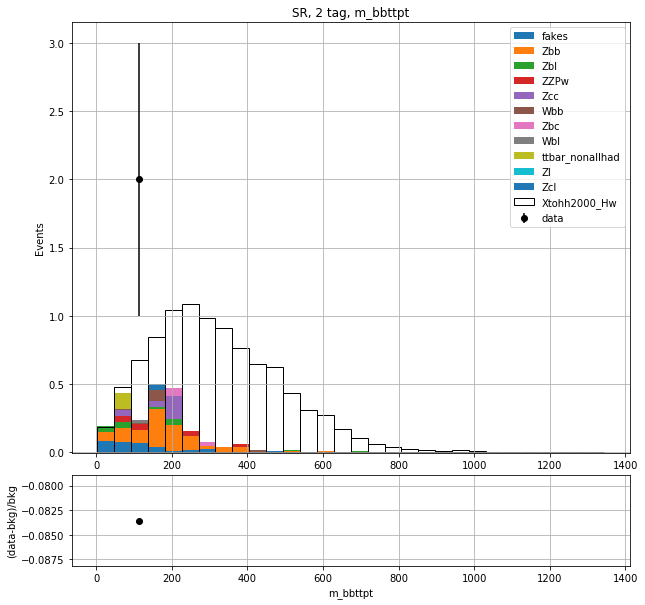

::: SR 2 m_hhm_Coll
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         19.27990842  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.89626507         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 

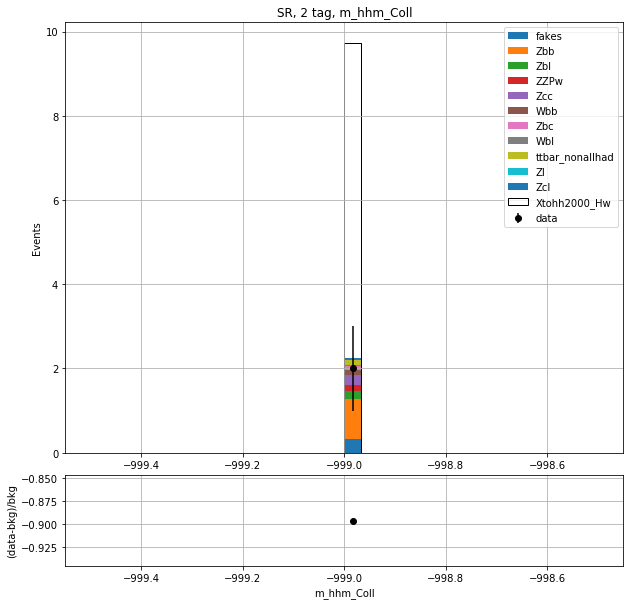

::: SR 2 m_hhm_Eff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 5.26361002e-01  4.82518166e-01  2.44179588e+00  3.88212983e+00
  5.72723417e+00  1.52106745e+00  1.46004117e+00  9.34008498e-01
  4.60376014e-01  3.43531489e-01  4.97256190e-01  2.19040811e-02
  8.31725597e-02  2.76777238e-01  1.68829009e-01  8.14574361e-02
 -3.28251719e-03 -1.00773573e-03  4.65408564e-02  1.15453243e-01
 -1.93122029e-03  0.00000000e+00  1.30131394e-01 -2.92092562e-04
 -1.38342381e-04  8.59761834e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -1.         -0.74240944 -0.82539565 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.     

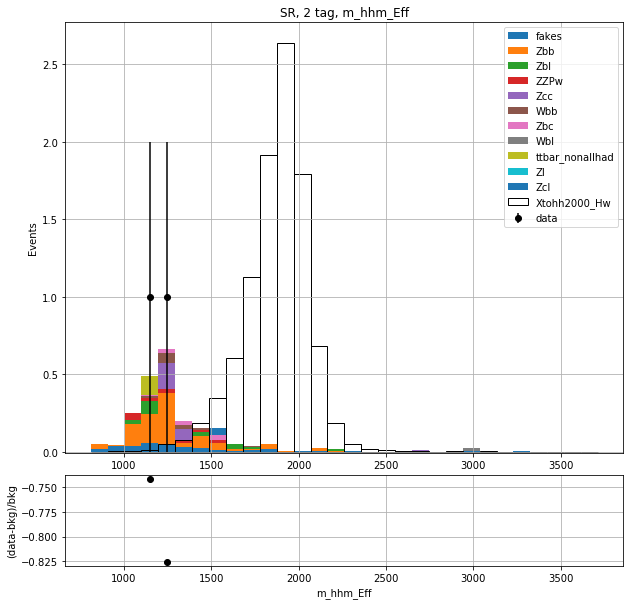

::: SR 2 m_hhm_ConEff
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 6.15755230e-01  2.36502454e+00  1.00372768e+00  1.27051435e+00
  4.82277617e+00  2.84064755e+00  1.29237510e+00  1.19754967e+00
  3.83170009e-01  8.01800668e-01  4.73665421e-01  6.20688811e-01
  1.91614032e-01  7.17920810e-02  1.83041498e-01  8.70586336e-02
  4.42656040e-01  1.96212489e-01  8.03123415e-02 -4.09716368e-03
  5.11978269e-02 -1.69977546e-03 -1.08510256e-03 -3.94374132e-04
  2.95955002e-01  0.00000000e+00 -5.76972961e-05  0.00000000e+00
  0.00000000e+00 -2.92092562e-04]
DIFF [-1.         -0.57717141 -1.         -1.         -0.79265055 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.  

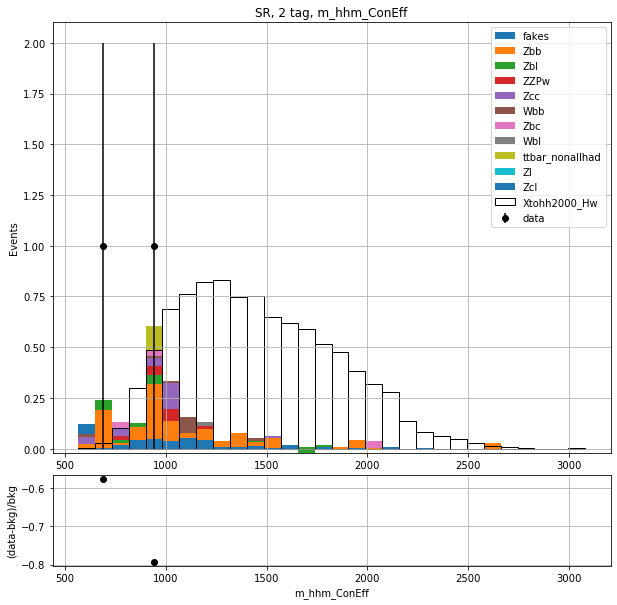

::: SR 2 m_hhm_ConVis
df_data.shape (2, 3)
df_signal.shape (8560, 3)
fakes 2537 0.31664842
Zbb 57 0.9600109
Zbl 9 0.1837993
ZZPw 7 0.13964345
Zcc 6 0.25472373
Wbb 6 0.11941259
Zbc 4 0.08608626
Wbl 1 0.019197725
ttbar_nonallhad 1 0.12124851
Zl 1 0.0031457494
Zcl 1 0.0485297
DATA [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 4.08456633e-01  7.09527498e-01  3.26836207e+00  3.47043492e+00
  3.92608248e+00  2.45544801e+00  1.62664062e+00  3.38138178e-01
  9.06589949e-01  3.45068559e-01  3.62600774e-01  3.17596838e-01
  9.65591520e-02  7.44564235e-02  4.49000895e-02  2.78538644e-01
  2.26634443e-01  8.46498013e-02  8.59761834e-02 -2.92092562e-04
 -6.23524189e-04  1.15453139e-01  0.00000000e+00  0.00000000e+00
  8.59761834e-02 -6.04838133e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.33404946e-02]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -0.38523606  1.95737088 -1.         -1.         -1.         -1.
 -1.         -1.         -1.  

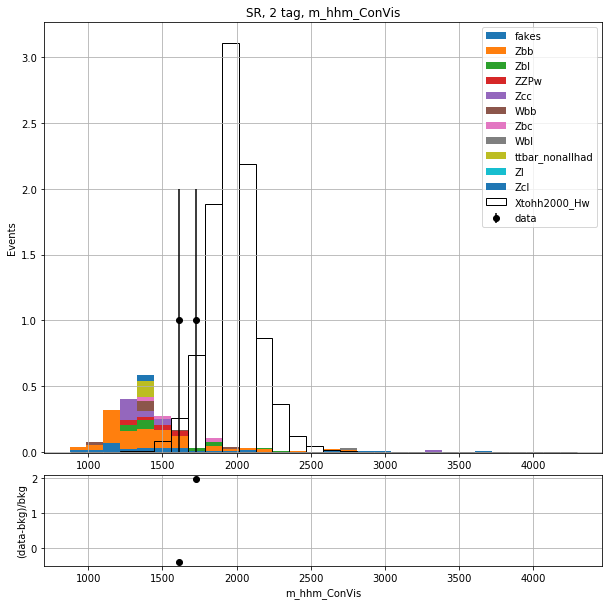

-->df.shape (28803, 38)
::: QCDCR 0 m_AntiBTag
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 157]
BACK [2.16415124e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.

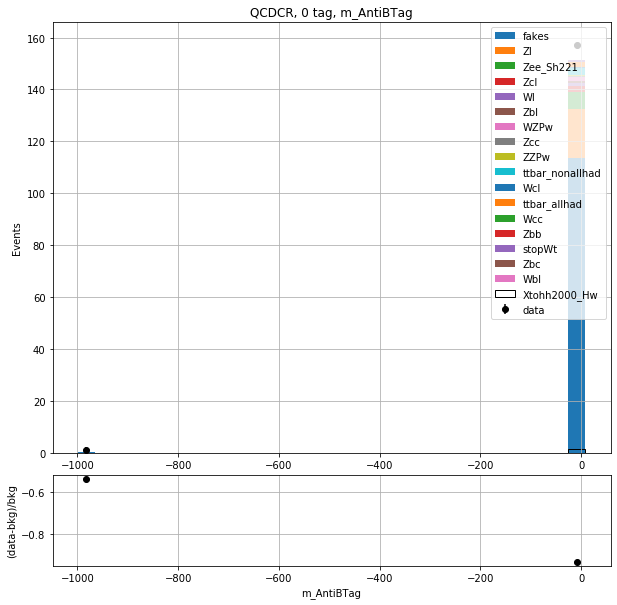

::: QCDCR 0 m_AntiTauTag
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [ 520.52077       0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.         1932.57258606]
DIFF [-0.69645784         nan         nan         nan         nan         nan
  

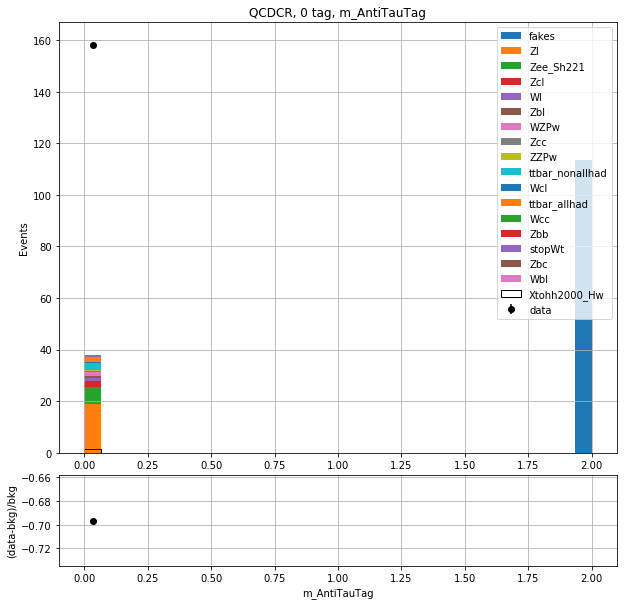

::: QCDCR 0 m_FJpt
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 8 20 36 46 23  9  6  1  4  2  1  1  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.78382044e+02  3.49049665e+02  5.56215021e+02  6.20178311e+02
  3.31692832e+02  1.88776723e+02  9.38721307e+01  5.91321230e+01
  3.03287858e+01  1.48606397e+01  1.14398115e+01  5.47985530e+00
  6.57511854e+00  2.19575548e+00  1.83567262e+00  6.03522778e-01
  9.72991943e-01  4.99733925e-01  3.52455139e-01  1.33125305e-01
  9.97390747e-02  2.36767769e-01  0.00000000e+00 -1.55639648e-03
  2.33459473e-03  0.00000000e+00 -1.81579590e-03 -3.11279297e-03
  0.00000000e+00  7.59277344e-02]
DIFF [-0.95515

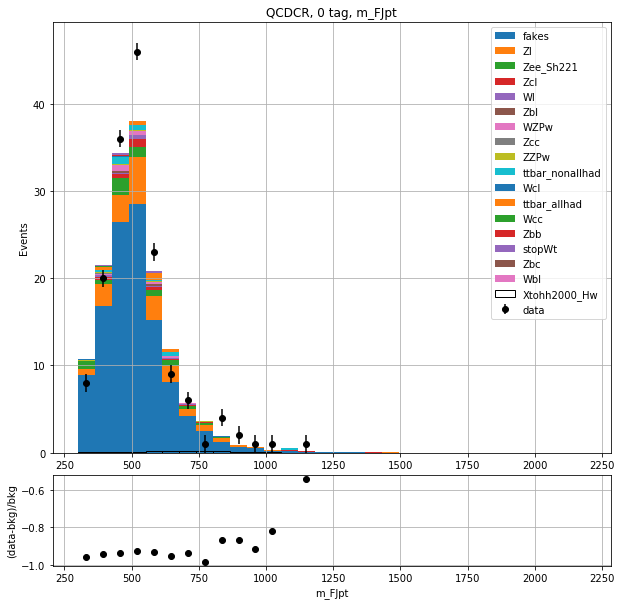

::: QCDCR 0 m_FJeta
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 5  2  2  5  4  3  6  5  4  6  6  8  6  6  9  2  5  6  6  6  5 12  8  5
  6  5  7  5  1  2]
BACK [ 35.61322258  37.76284743  59.8616749   62.54799262  63.95790735
  74.66423815  77.17742112  86.72190752 101.09624729  94.09687138
 100.95957651 105.13877023 112.54012445 109.05992683 108.27430072
 104.45871162 111.89881057 100.79221131 110.88442717 100.14582231
  94.04348721  88.13084266  98.61063124  93.33039347  67.05987191
  66.41966986  62.75742002  46.00225627  45.25762999  33.80269867]
DIFF [-0.85960271 -0.94703789 -0.96658964 -0.92006138 -0.93745887 -0.95982012
 -0.92225706 -0.94234444 -0

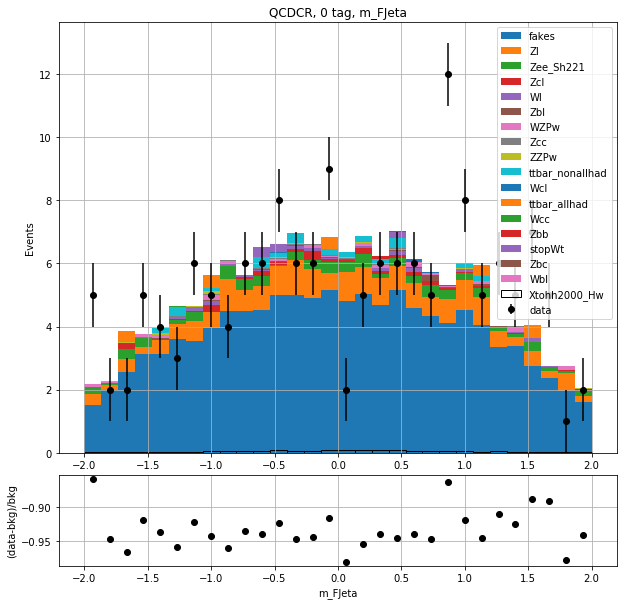

::: QCDCR 0 m_FJphi
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 7  3  5  1  5  4  5  5  5  4  7  5  7  2  7  5  5  7  5  4  6 10  7  2
  3  6  4  7  6  9]
BACK [72.92005845 89.02024133 85.18229432 83.1996635  82.47335127 97.04467129
 88.10754908 84.58569601 71.6738245  75.33653724 84.48529628 83.70935889
 80.63673393 79.13461905 85.98414248 84.63567573 79.72258496 71.02612193
 78.01721604 81.37396163 83.5164511  81.4423748  91.4818721  84.22798386
 78.95378274 76.98862189 79.28699344 75.35471296 79.51537102 84.02488701]
DIFF [-0.90400447 -0.9662998  -0.94130236 -0.98798072 -0.93937436 -0.95878187
 -0.94325117 -0.94088835 -0.93023953 -0.94690491 -0.917145

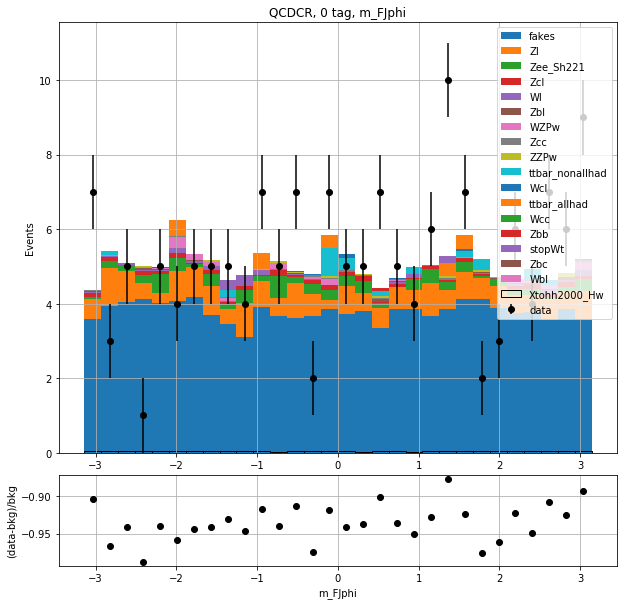

::: QCDCR 0 m_FJm
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [54 23 22 15 10  5 10  4  1  6  2  4  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 6.82624669e+02  4.14685740e+02  2.95508533e+02  2.39858837e+02
  1.94792544e+02  1.54860486e+02  1.25292157e+02  9.86243950e+01
  7.92451552e+01  5.61248536e+01  4.17848111e+01  2.57187363e+01
  1.57257569e+01  9.99719962e+00  5.73212570e+00  4.59394228e+00
  1.73480892e+00  2.26012611e+00  9.38151836e-01  9.73919868e-01
  1.35715485e+00  7.92999268e-02  1.32476807e-01  2.83821106e-01
  7.33642578e-02 -1.16729736e-03  5.21240234e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-0.920893

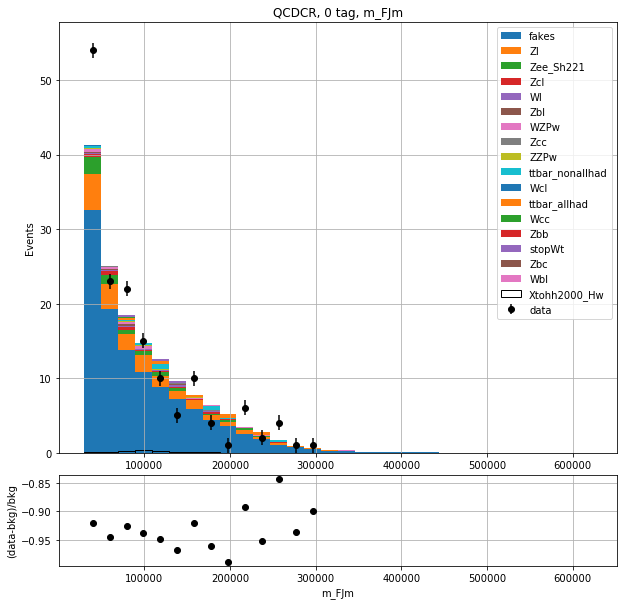

::: QCDCR 0 m_DTpt
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [14  6 36 48 22 11 11  4  3  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.40223813e+02  1.99260822e+02  5.14484240e+02  7.33073662e+02
  3.77501159e+02  2.08847479e+02  1.23637117e+02  6.16591785e+01
  4.14383387e+01  2.15440648e+01  1.17853220e+01  8.48900803e+00
  4.92185736e+00  2.40811491e+00  9.87739563e-01  1.38960266e+00
  4.17820930e-01  4.61967468e-01  1.32812500e-01  0.00000000e+00
  2.12112427e-01  0.00000000e+00 -1.94549561e-03  0.00000000e+00
  0.00000000e+00 -1.55639648e-03  2.33459473e-03 -1.81579590e-03
 -1.68609619e-03 -2.98309326e-03]
DIFF [-0.90015

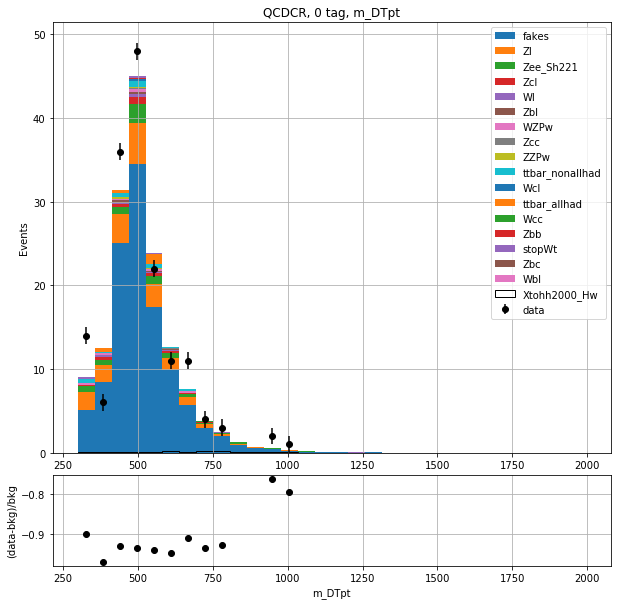

::: QCDCR 0 m_DTeta
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 4  7  5  4  1  5  5  6  3  7 13  8  2  7  4  6 10  8  6  4  3  6  4  5
  7  1  1  8  5  3]
BACK [ 38.54494822  52.11557315  61.7509403   47.37099317  25.17128025
  86.28682087  79.11945955  82.11718226  95.37815688 110.81142116
  88.73901386 124.46241898 114.33716153 114.86851302 121.89201668
 126.32937953 121.24747037 115.69815353 108.5095971   97.50482535
  93.04594413  89.56719468  79.72067127  65.03100362  84.00034586
  23.4952774   49.06701139  57.71283376  60.00053805  39.17364365]
DIFF [-0.89622505 -0.86568314 -0.91902957 -0.91556014 -0.96027218 -0.94205372
 -0.93680442 -0.92693368 -0

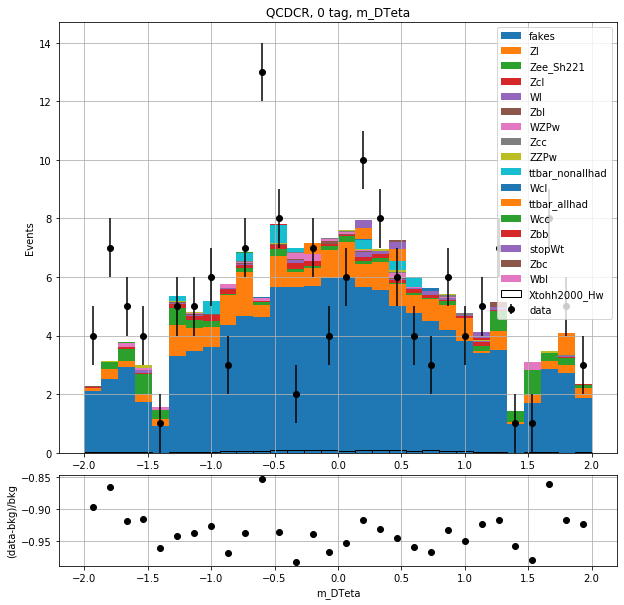

::: QCDCR 0 m_DTphi
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 3  7  6  5  3  6  7  6  4  6  4  6  5  5  8 11  2  5  1  6  4  6  2  4
  6  5  6  9  4  6]
BACK [86.46499787 85.04768397 74.22963503 75.65699596 78.93363682 83.91507172
 81.4382999  91.94024659 83.1837018  82.56795897 77.39400248 73.78985946
 83.67250678 77.51415059 76.62480624 77.12913871 84.23434478 89.82264008
 85.3452563  88.93300298 94.62976506 81.78390156 85.95272766 75.75603193
 68.98930919 80.83497155 87.80507556 78.73868612 80.84995632 79.89584824]
DIFF [-0.96530388 -0.91769323 -0.91916975 -0.93391226 -0.96199339 -0.92849914
 -0.91404536 -0.93474022 -0.95191366 -0.92733259 -0.948316

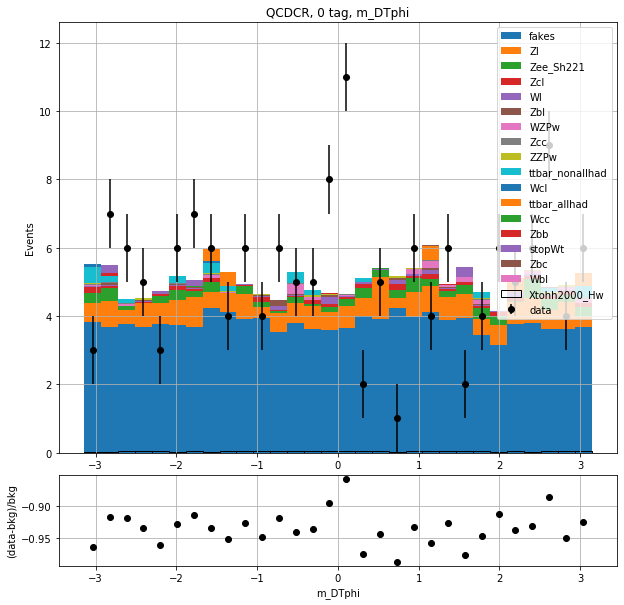

::: QCDCR 0 m_DTm
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 1  3 14 33 27 29 12  9  4 12  4  8  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.46306012e+01  1.89677206e+02  3.28989368e+02  4.13699737e+02
  5.12976247e+02  3.13541719e+02  1.97896774e+02  1.53582428e+02
  1.11924901e+02  8.02122439e+01  4.80317636e+01  3.39611952e+01
  2.23532183e+01  1.06237048e+01  7.89221716e+00  5.17268372e+00
  2.67537272e+00  2.13498452e+00  1.05938721e+00  4.89486694e-01
  1.14383936e+00  2.63420105e-01 -1.68609619e-03  1.31385803e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.94549561e-03]
DIFF [-0.931650

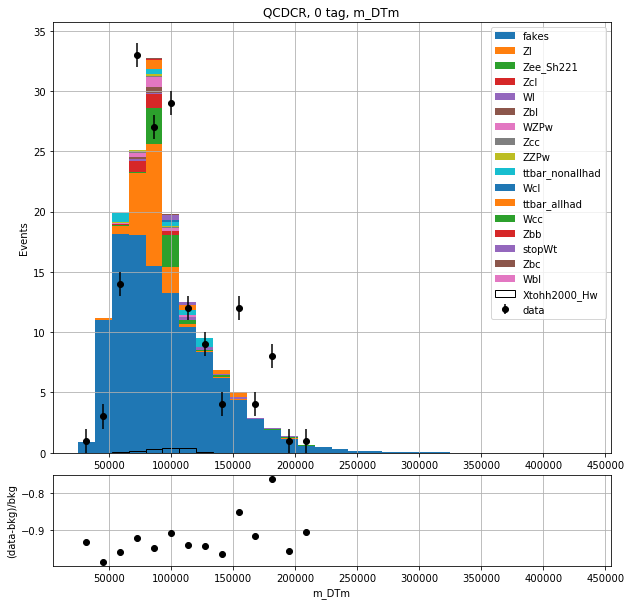

::: QCDCR 0 m_DTpt_Eff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0  0  0  3 10 21 43 45 10 13  7  4  0  0  1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [-1.58880434e-03 -1.77063928e-02  1.00338951e+00  2.25301655e+01
  1.30775081e+02  3.31946863e+02  7.26514936e+02  6.24087173e+02
  3.01341734e+02  1.52694705e+02  7.78446347e+01  3.73866475e+01
  2.18950011e+01  1.19007761e+01  7.11022719e+00  1.93962383e+00
  1.92010832e+00  9.22683716e-01  2.78912544e-01  4.69619751e-01
  1.33590698e-01  7.65762329e-02  1.32812500e-01  0.00000000e+00
 -1.55639648e-03  0.00000000e+00  0.00000000e+00 -1.42669678e-03
  5.18798828e-04 -3.24249268e-03]
DIFF [-1. 

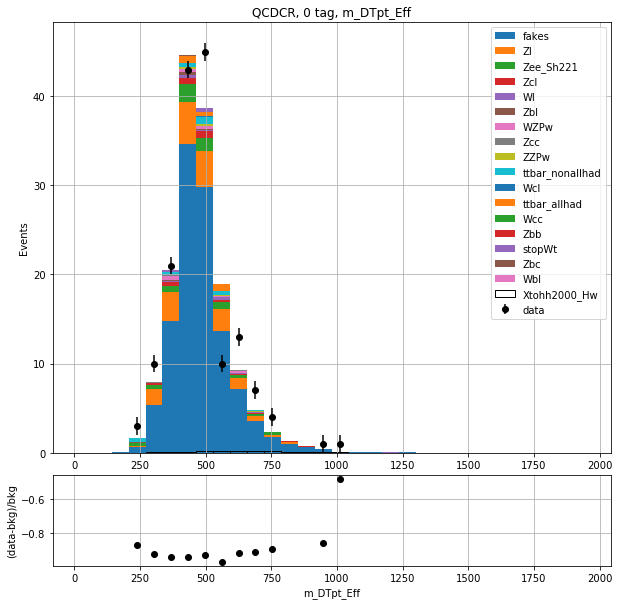

::: QCDCR 0 m_DTeta_Eff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0  0  0  0  0  0  0  0  0  0  0  1 12  7  9  9 16 14 10 14 17  9  9 10
  4 13  4  0  0  0]
BACK [-1.58880434e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.13390599e-01  9.97510194e-02  8.62595155e+00
  1.06158683e+02  9.20027461e+01  1.37470025e+02  1.79106418e+02
  2.04336641e+02  2.28934408e+02  2.35653759e+02  2.51125467e+02
  2.36266512e+02  1.95972368e+02  1.75721626e+02  1.52502917e+02
  8.40597408e+01  1.25427077e+02  3.88406198e+01  4.54294682e-01
 -1.16729736e-03 -1.29699707e-04]
DIFF [-1.

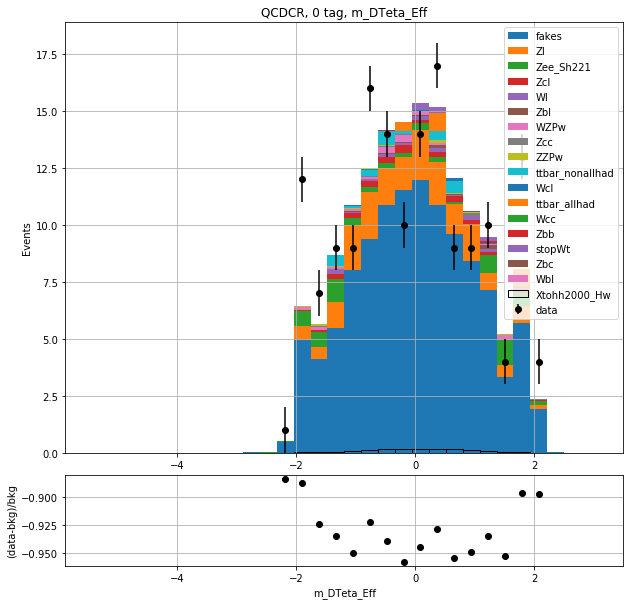

::: QCDCR 0 m_DTphi_Eff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 6  6  7  5  3  4  8  6  7  3  6  4  4  5 13  6  3  4  3  5  4  5  2  6
  7  5  5  7  5  4]
BACK [92.32414382 76.0727843  79.5378698  73.70775627 81.1821413  83.33289535
 84.31210331 84.93517852 89.16922957 80.36330839 80.50824033 72.0420004
 83.50995302 76.31242925 77.35770465 76.60087883 82.91134533 84.80502762
 93.01009876 88.33400363 93.21363174 81.12023133 81.37828153 78.04943643
 69.48444051 81.49783385 89.09600793 79.58018684 77.67295283 81.65187684]
DIFF [-0.93501158 -0.92112817 -0.91199161 -0.93216453 -0.96304606 -0.95199975
 -0.90511445 -0.92935789 -0.92149758 -0.96266953 -0.925

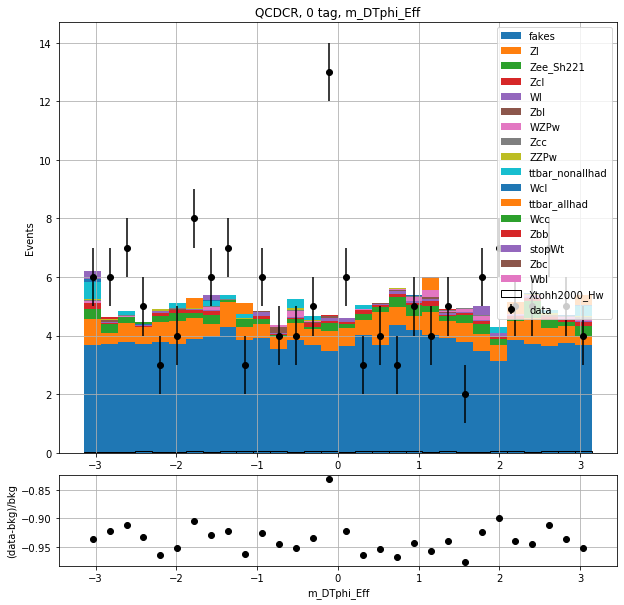

::: QCDCR 0 m_DTm_Eff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 3 23 29 30 30 19 10  8  1  2  2  0  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0]
BACK [ 5.56161981e+01  3.77637001e+02  6.02102654e+02  5.32833680e+02
  3.78190141e+02  2.47865498e+02  1.33078728e+02  6.28869452e+01
  2.88363134e+01  1.74052399e+01  6.61694548e+00  2.82080740e+00
  2.10646439e+00  1.57670021e+00  2.01801729e+00  6.55387878e-01
  3.04361582e-01  5.99212646e-02  2.87450001e-01  1.29180908e-01
 -3.30734253e-02 -3.50189209e-03  5.40008545e-02 -1.07650757e-02
 -1.94549561e-03 -1.55639648e-03 -9.07897949e-04 -2.59399414e-04
  0.00000000e+00 -1.55639648e-03]
DIFF [-0.94

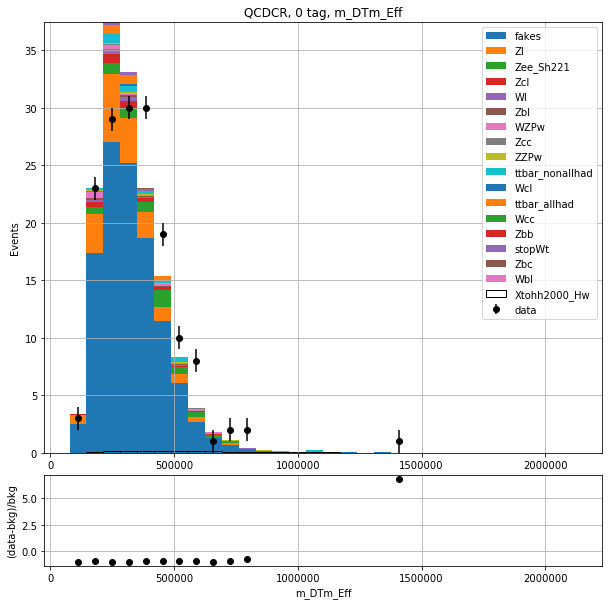

::: QCDCR 0 m_DTpt_ConEff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0  0 10 11 26 17 20 16 19 11  8  7  4  1  3  1  3  0  0  1  0  0  0  0
  0  0  0  0  0  0]
BACK [1.93716052e-01 1.04635094e+01 5.35052512e+01 1.49668286e+02
 2.73846626e+02 3.51478414e+02 3.26495180e+02 2.98379509e+02
 2.55293317e+02 2.07477386e+02 1.68799676e+02 1.07058165e+02
 7.85294683e+01 5.47306042e+01 4.06971645e+01 2.42439545e+01
 1.59212852e+01 9.00656462e+00 1.23351593e+01 4.78548563e+00
 4.71136475e+00 1.94135284e+00 1.14031982e+00 5.91949463e-01
 8.59687805e-01 4.29763794e-01 0.00000000e+00 1.32164001e-01
 2.65625000e-01 7.55310059e-02]
DIFF [-1.         -1.         -0.8131

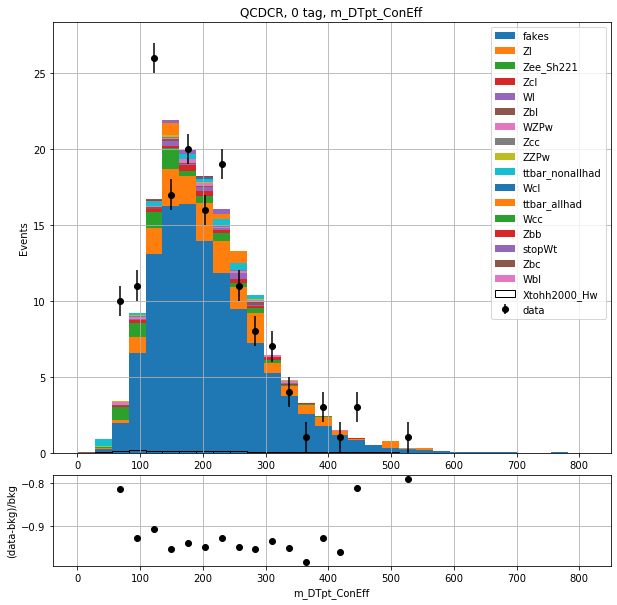

::: QCDCR 0 m_DTeta_ConEff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0  0  0  0  0  0  0  0  0  0  0  1 12  7  9  9 16 14 10 14 17  9  9 10
  4 13  4  0  0  0]
BACK [-1.58880434e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.13390599e-01  9.97510194e-02  8.62595155e+00
  1.06158683e+02  9.20027461e+01  1.37470025e+02  1.79106418e+02
  2.04336641e+02  2.28934408e+02  2.35653759e+02  2.51125467e+02
  2.36266512e+02  1.95972368e+02  1.75721626e+02  1.52502917e+02
  8.40597408e+01  1.25427077e+02  3.88406198e+01  4.54294682e-01
 -1.16729736e-03 -1.29699707e-04]
DIFF [

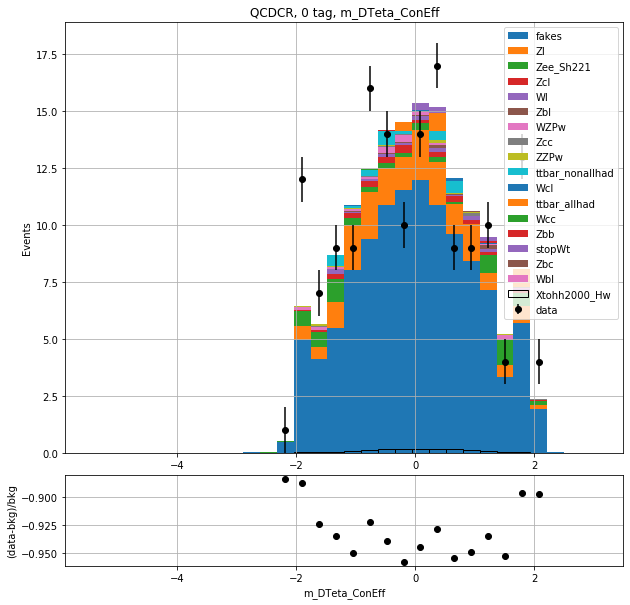

::: QCDCR 0 m_DTphi_ConEff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 6  6  7  5  3  4  8  6  7  3  6  4  4  5 13  6  3  4  3  5  4  5  2  6
  7  5  5  7  5  4]
BACK [92.32414382 76.0727843  79.5378698  73.70775627 81.1821413  83.33289535
 84.31210331 84.93517852 89.16922957 80.36330839 80.50824033 72.0420004
 83.50995302 76.31242925 77.35770465 76.60087883 82.91134533 84.80502762
 93.01009876 88.33400363 93.21363174 81.12023133 81.37828153 78.04943643
 69.48444051 81.49783385 89.09600793 79.58018684 77.67295283 81.65187684]
DIFF [-0.93501158 -0.92112817 -0.91199161 -0.93216453 -0.96304606 -0.95199975
 -0.90511445 -0.92935789 -0.92149758 -0.96266953 -0.

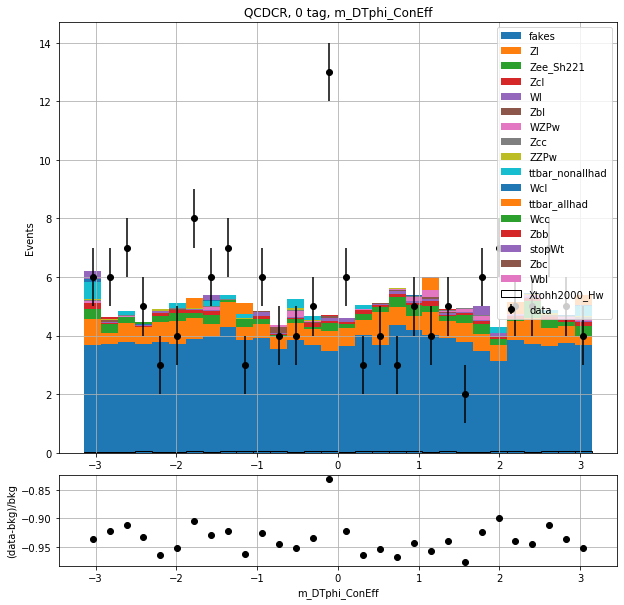

::: QCDCR 0 m_DTm_ConEff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 158   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
 2453.09335606    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
  

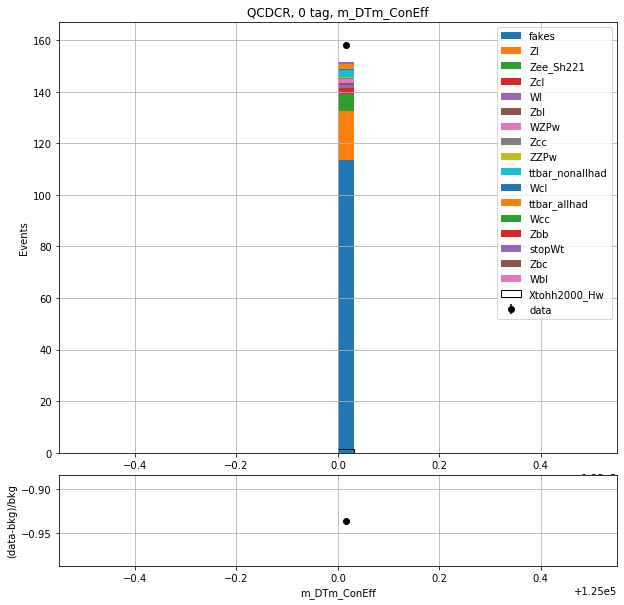

::: QCDCR 0 m_DTpt_ConVis
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [15 18 20 23 23 15 12 10 12  2  2  4  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.21776660e+02  2.24498861e+02  2.99471347e+02  3.30292980e+02
  2.97873686e+02  2.70617968e+02  2.15966589e+02  1.80191985e+02
  1.42976550e+02  1.26608959e+02  8.48754101e+01  6.18863210e+01
  3.94541944e+01  2.20546532e+01  1.34102325e+01  9.05699921e+00
  5.92817688e+00  3.34772491e+00  1.77091980e+00  3.70941162e-01
  1.32034302e-01  1.32812500e-01  3.47656250e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.81579590e-03]
DIFF [-

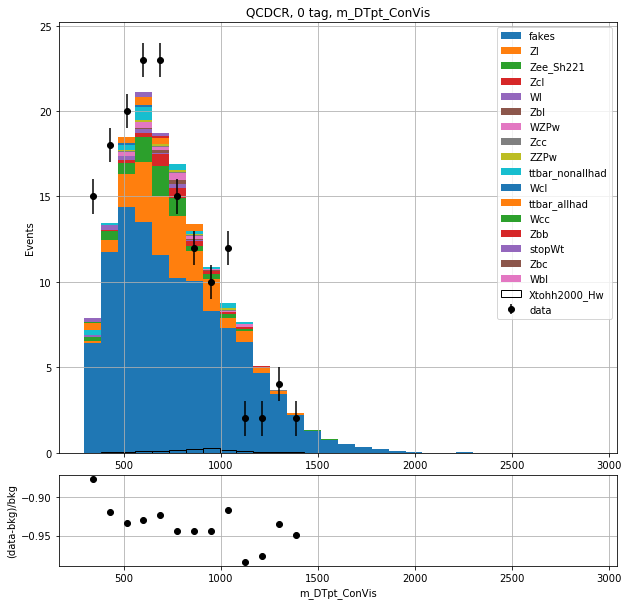

::: QCDCR 0 m_DTeta_ConVis
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 4  7  5  4  1  5  5  6  3  7 13  8  2  7  4  6 10  8  6  4  3  6  4  5
  7  1  1  8  5  3]
BACK [ 38.54494822  52.11557315  61.7509403   47.37099317  25.17128025
  86.28682087  79.11945955  82.11718226  95.37815688 110.81142116
  88.73901386 124.46241898 114.33716153 114.86851302 121.89201668
 126.32937953 121.24747037 115.69815353 108.5095971   97.50482535
  93.04594413  89.56719468  79.72067127  65.03100362  84.00034586
  23.4952774   49.06701139  57.71283376  60.00053805  39.17364365]
DIFF [-0.89622505 -0.86568314 -0.91902957 -0.91556014 -0.96027218 -0.94205372
 -0.93680442 -0.9269

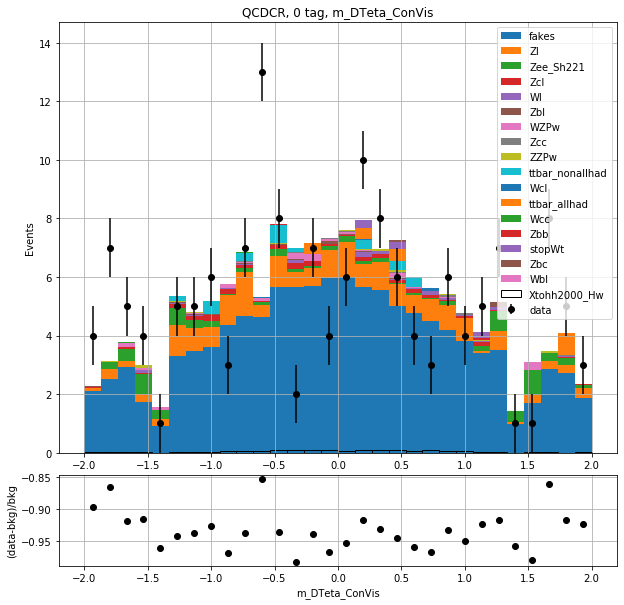

::: QCDCR 0 m_DTphi_ConVis
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 3  7  6  5  3  6  7  6  4  6  4  6  5  5  8 11  2  5  1  6  4  6  2  4
  6  5  6  9  4  6]
BACK [86.46499787 85.04768397 74.22963503 75.65699596 78.93363682 83.91507172
 81.4382999  91.94024659 83.1837018  82.56795897 77.39400248 73.78985946
 83.67250678 77.51415059 76.62480624 77.12913871 84.23434478 89.82264008
 85.3452563  88.93300298 94.62976506 81.78390156 85.95272766 75.75603193
 68.98930919 80.83497155 87.80507556 78.73868612 80.84995632 79.89584824]
DIFF [-0.96530388 -0.91769323 -0.91916975 -0.93391226 -0.96199339 -0.92849914
 -0.91404536 -0.93474022 -0.95191366 -0.92733259 -0

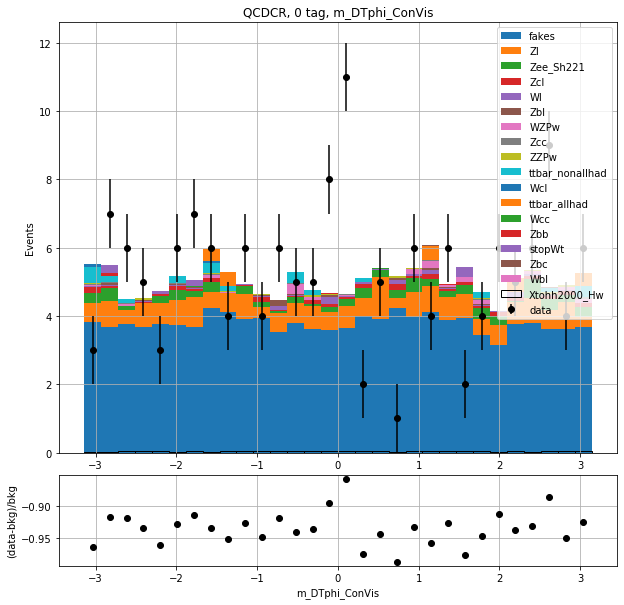

::: QCDCR 0 m_DTm_ConVis
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 158   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
 2453.09335606    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
  

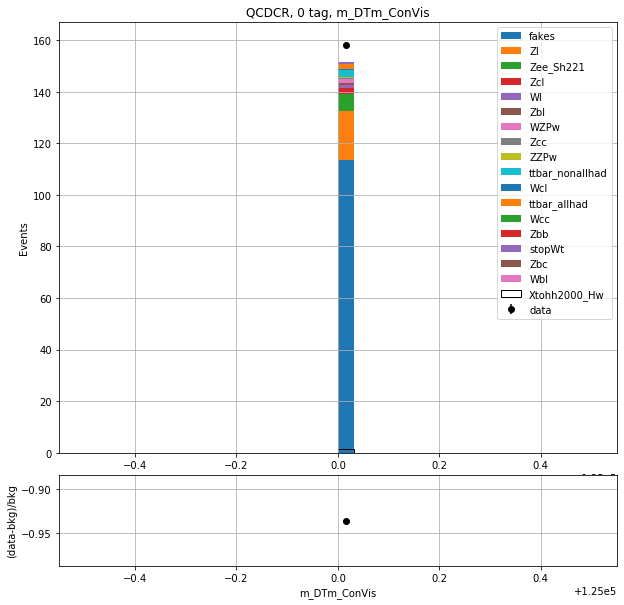

::: QCDCR 0 m_dPhiFTwDT
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  4
  2  4 17 18 36 76]
BACK [-9.73566738e-03  1.23059366e-01  2.12910866e-01 -1.84780839e-02
  1.09356842e-01  5.43286772e-02  1.37817145e-01 -1.03728101e-03
  2.17096284e-01  9.00802463e-02  6.28463019e-01  4.43602055e-01
  1.16473460e+00  6.88964542e-01  9.23934624e-01  2.39286657e+00
  2.41225511e+00  4.26951695e+00  5.63653417e+00  8.75649324e+00
  1.55893555e+01  2.20336725e+01  2.99334077e+01  3.95348781e+01
  5.83314882e+01  9.32456458e+01  1.48139807e+02  2.35051984e+02
  4.99166720e+02  1.28379662e+03]
DIFF [-1.

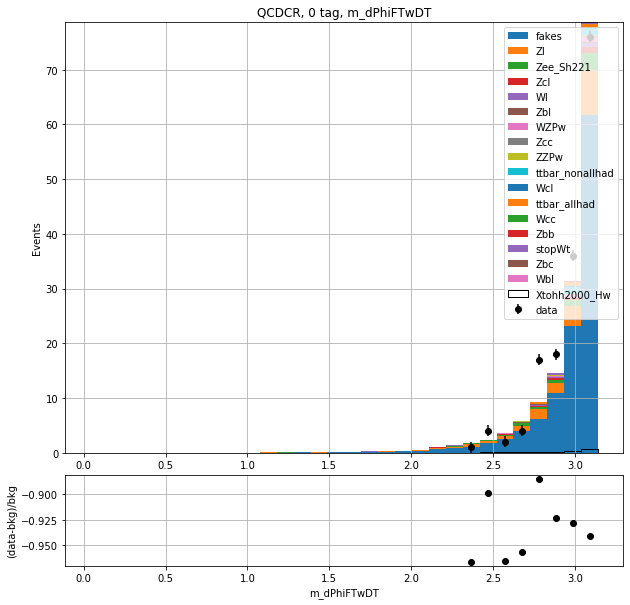

::: QCDCR 0 m_dRFJwDT
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0  0  0  0  0  0  0  0  0  0  0  2  2  6 11 32 36 21 12 12  7  3  5  2
  3  2  1  1  0  0]
BACK [2.17349145e-01 1.31274902e-01 6.03277080e-01 4.99248495e-01
 7.52544057e-01 1.10971813e+00 2.04308306e+00 3.86474142e+00
 7.33361278e+00 1.39863760e+01 1.66849257e+01 3.06284260e+01
 4.96224617e+01 8.30271392e+01 1.59550334e+02 3.69591377e+02
 6.94868350e+02 3.54029683e+02 2.26117583e+02 1.45932536e+02
 9.94150952e+01 6.28228858e+01 4.80498757e+01 3.33056050e+01
 1.90842243e+01 1.12615359e+01 1.13072915e+01 3.85314941e+00
 2.25628233e+00 1.11684418e+00]
DIFF [-1.         -1.         -1.        

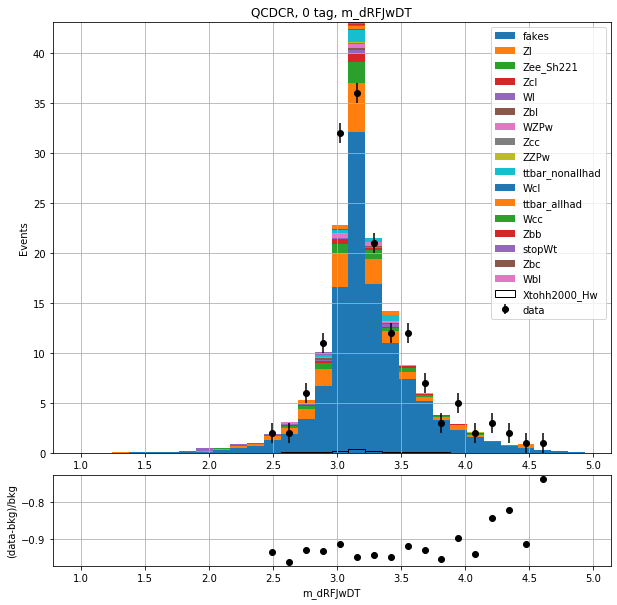

::: QCDCR 0 m_dPhiDTwMET
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [20 19  4  2 11  6  3  3  0  7  0  0  0  0  0  0  0  0  0  3  6  7  5  4
  2  8  5  8 15 20]
BACK [286.98279549 199.79344221 158.15707786 103.41312635  86.10255218
  72.70521301  66.7013534   63.55296313  68.18568651  76.56307532
  24.31935251   0.           0.           0.           0.
   0.           0.           0.           0.          18.45265225
  79.54296555  60.51663064  62.57408299  68.96002916  74.14209658
  92.63566348 119.09451997 160.95985535 220.1928647  289.52922403]
DIFF [-0.93030941 -0.90490178 -0.97470869 -0.9806601  -0.87224537 -0.91747497
 -0.9550234  -0.95279528 -1.  

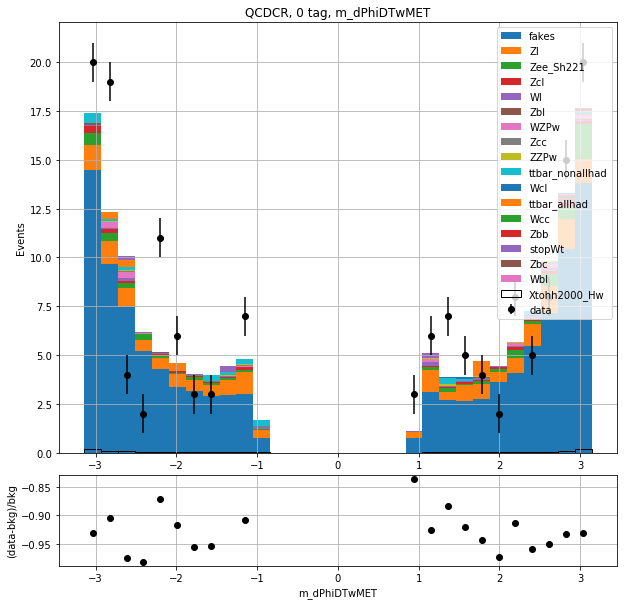

::: QCDCR 0 m_MET
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [89 50 12  4  0  2  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 1.50480586e+03  7.09099470e+02  1.73803718e+02  3.84919354e+01
  1.25391415e+01  5.85944220e+00  2.56550848e+00  2.11989474e+00
  5.46416283e-01  3.69301558e-01  1.99452114e+00  6.34754583e-01
 -6.53686523e-02  1.99592590e-01 -6.65359497e-02  1.70022964e-01
 -4.78591919e-02 -1.53045654e-02 -2.33459473e-03  0.00000000e+00
 -2.46429443e-03  5.20553589e-02 -1.94549561e-03  1.81579590e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.05828857e-03]
DIFF [-0.940856

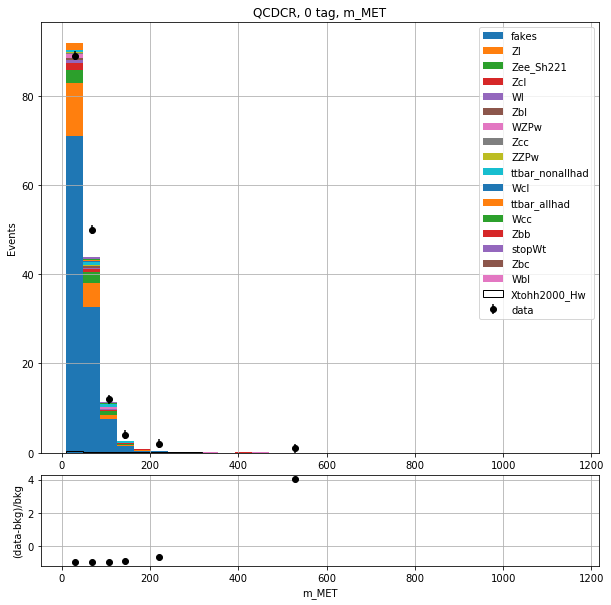

::: QCDCR 0 m_hhm
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0  0 10 31 47 22 10 10  9  6  3  2  0  4  0  1  0  0  1  0  0  0  1  0
  1  0  0  0  0  0]
BACK [3.73189079e-01 5.78046334e+00 1.81519806e+02 5.94795072e+02
 5.70373296e+02 3.78355090e+02 2.41609021e+02 1.55744042e+02
 1.08632125e+02 7.38988136e+01 4.34996414e+01 3.07698821e+01
 1.94307861e+01 1.56095128e+01 9.63518941e+00 8.28751230e+00
 3.72345269e+00 4.71725702e+00 2.07297948e+00 1.55074310e+00
 7.72529602e-01 2.73829937e-01 3.00804138e-01 3.97659302e-01
 2.33459473e-03 3.95973206e-01 5.68771362e-02 1.32812500e-01
 1.32812500e-01 1.31385803e-01]
DIFF [ -1.          -1.          -0.94490959 

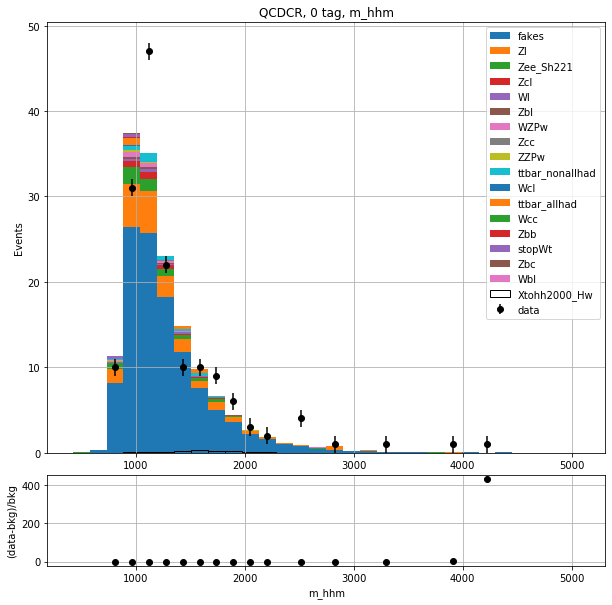

::: QCDCR 0 m_bbttpt
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [47 47 25 19 11  5  2  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 8.05311626e+02  7.10211327e+02  3.85028873e+02  2.34094873e+02
  1.27394975e+02  7.22165239e+01  4.34615656e+01  2.76880423e+01
  1.82722074e+01  1.02662427e+01  5.73542976e+00  4.25469112e+00
  2.47067280e+00  2.22741902e+00  1.39458668e+00  7.21443176e-01
  8.29230785e-01  4.18224335e-01  3.48823547e-01  1.35711670e-01
  1.32812500e-01  7.72933960e-02  1.35353088e-01  1.03436470e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.74841309e-02 -6.48498535e-04]
DIFF [-0.941

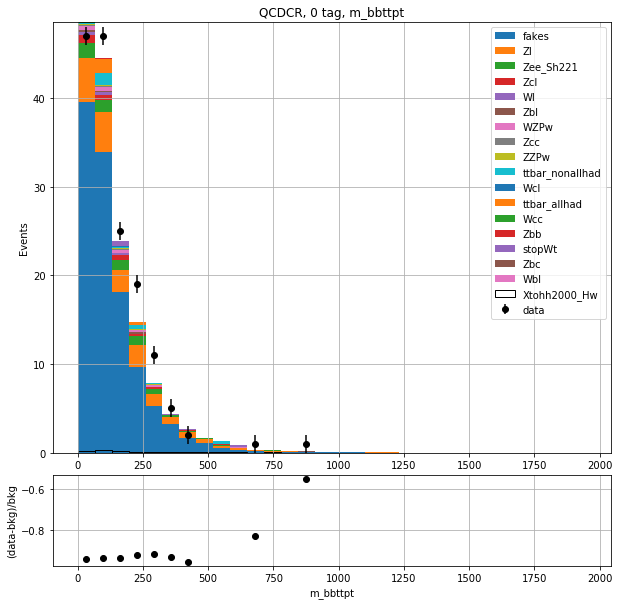

::: QCDCR 0 m_hhm_Coll
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 158   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
BACK [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
 2453.09335606    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
    

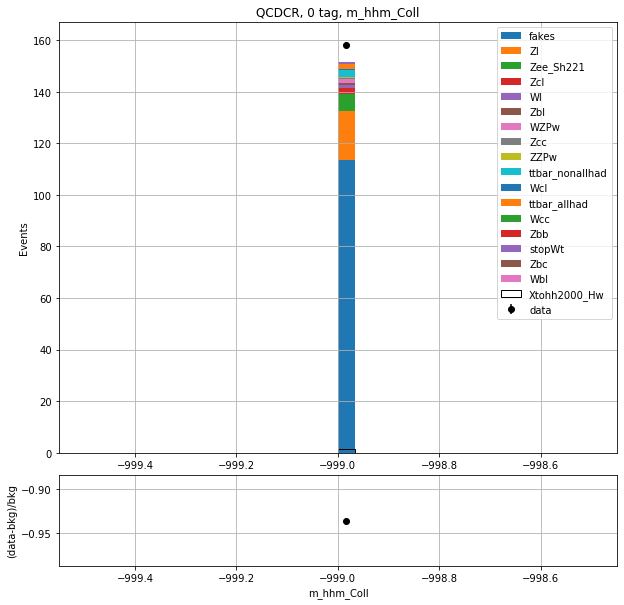

::: QCDCR 0 m_hhm_Eff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0  0  2 22 46 32 14 10  9  9  3  3  0  3  1  1  0  0  1  0  0  0  1  0
  0  1  0  0  0  0]
BACK [5.46332151e-02 1.63209171e+00 8.22397570e+01 4.81245340e+02
 6.33997433e+02 4.25267432e+02 2.88819785e+02 1.72868252e+02
 1.25223344e+02 8.41535017e+01 5.00628894e+01 3.30430986e+01
 2.21693715e+01 1.66235977e+01 1.11244620e+01 8.93292224e+00
 4.12544346e+00 4.50776350e+00 2.73121408e+00 1.58985043e+00
 4.47906494e-01 6.76455975e-01 1.90559387e-01 2.63160706e-01
 1.32812500e-01 3.23928833e-01 1.31256104e-01 1.32812500e-01
 1.32812500e-01 1.31385803e-01]
DIFF [-1.         -1.         -0.97568086

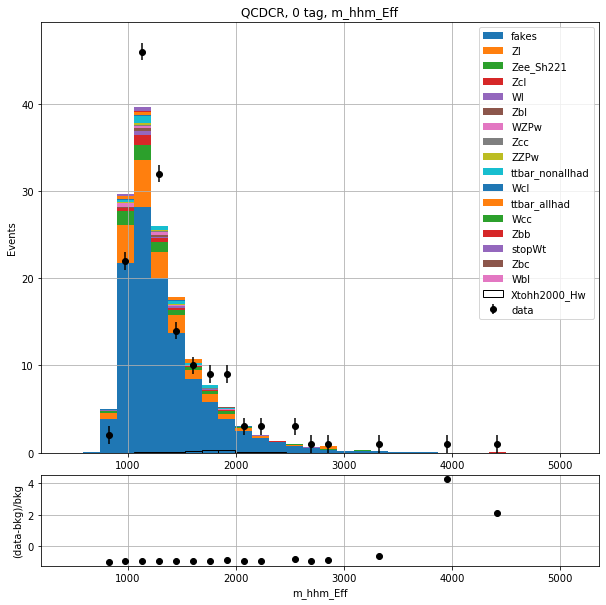

::: QCDCR 0 m_hhm_ConEff
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 2  2 19 18 22 21 22 13 14  6  3  6  1  1  3  3  0  0  0  0  2  0  0  0
  0  0  0  0  0  0]
BACK [2.79098079e+00 5.82202775e+01 1.91199752e+02 3.39894768e+02
 4.02586299e+02 3.81013218e+02 3.05006818e+02 2.29309570e+02
 1.61091713e+02 1.11071669e+02 8.42822043e+01 6.09899161e+01
 3.81167707e+01 2.53878058e+01 1.98502878e+01 1.25450603e+01
 8.49369851e+00 5.71823812e+00 4.19079924e+00 2.27622986e+00
 1.14278412e+00 4.02628231e+00 6.90356731e-01 1.31282043e+00
 3.19244385e-01 8.48526001e-01 4.07127380e-01 8.87451172e-02
 5.60989380e-02 1.09336853e-01]
DIFF [-0.28340603 -0.96564771 -0.90062

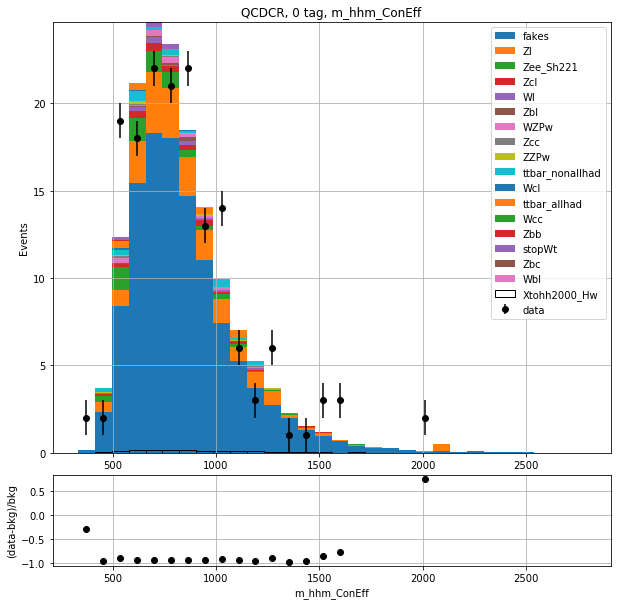

::: QCDCR 0 m_hhm_ConVis
df_data.shape (158, 3)
df_signal.shape (859, 3)
fakes 24956 113.688835
Zl 1840 18.719435
Zee_Sh221 502 6.63328
Zcl 226 2.5005116
Wl 82 1.260368
Zbl 41 0.62833196
WZPw 36 1.6278497
Zcc 36 0.33242136
ZZPw 22 0.5260516
ttbar_nonallhad 15 2.5843718
Wcl 10 0.23289579
ttbar_allhad 5 1.9171227
Wcc 4 0.039048184
Zbb 3 0.084457
stopWt 3 0.721092
Zbc 3 0.045797616
Wbl 2 0.017798292
DATA [ 0 13 33 37 20 21 13  6  4  2  2  0  1  2  1  0  0  0  2  1  0  0  0  0
  0  0  0  0  0  0]
BACK [1.23747234e+01 1.51726459e+02 4.53800581e+02 5.23295515e+02
 4.30188552e+02 3.22784535e+02 1.98003978e+02 1.14243616e+02
 8.69415793e+01 4.73488964e+01 3.39751250e+01 2.47269025e+01
 1.69065093e+01 1.08656001e+01 9.43418932e+00 5.35521841e+00
 3.48818874e+00 3.05069304e+00 1.25736237e+00 8.71749878e-01
 1.03639984e+00 2.95196533e-01 3.51486206e-01 2.17895508e-01
 2.15301514e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.32812500e-01 1.32812500e-01]
DIFF [-1.         -0.91431949 -0.92728

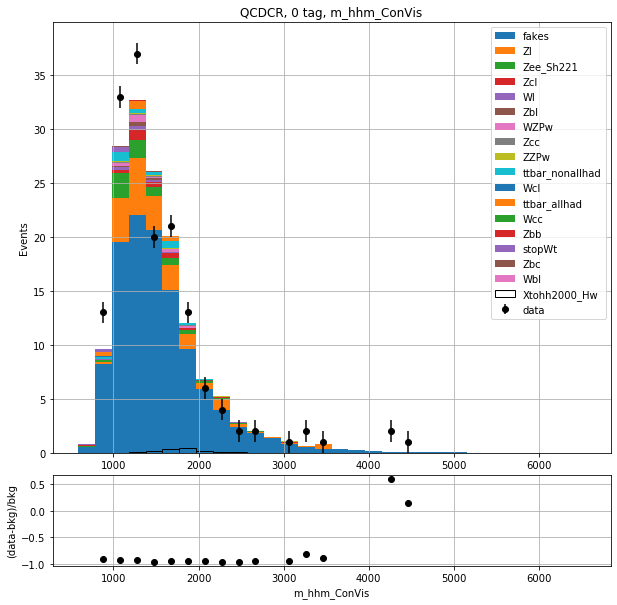

-->df.shape (6560, 38)
::: QCDCR 1 m_AntiBTag
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [ 4  0  0  0  0 13  0  0  0  0  5  0  0  0  0  5  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 20.51256811   0.           0.           0.           0.
 150.81811288   0.           0.           0.           0.
  95.6664688    0.           0.           0.           0.
  29.46303431   0.           0.           0.           0.
   5.92511346   0.           0.           0.           0.
   0.74741364   0.           0.           0.           0.22798347]
DIFF [-0.8049976          nan         nan         nan         nan -0.91380346
         nan         na

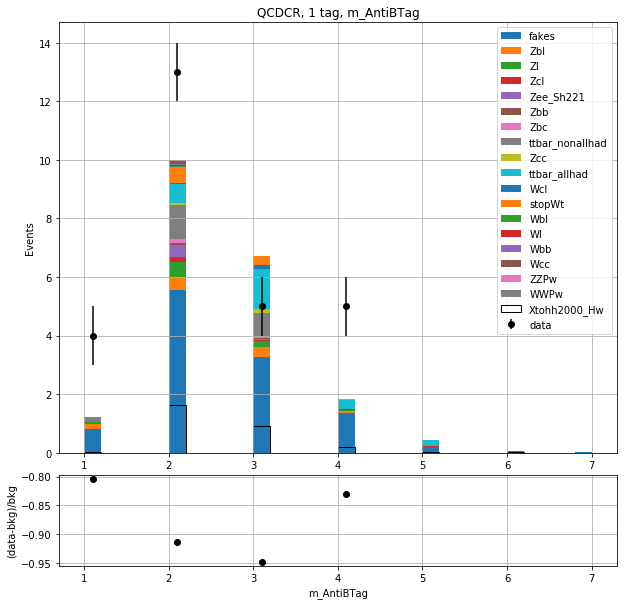

::: QCDCR 1 m_AntiTauTag
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [101.51107242   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         201.84909439]
DIFF [-0.73401916         nan         nan         nan         nan         nan
         nan         nan         nan        

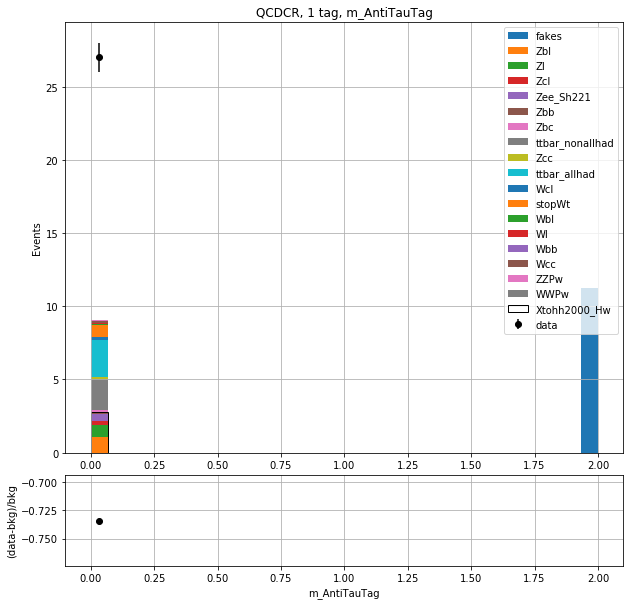

::: QCDCR 1 m_FJpt
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [1 2 3 5 3 5 2 3 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.97832580e+01  3.76882475e+01  5.16397843e+01  4.30831413e+01
  5.09027226e+01  3.60520107e+01  2.44458559e+01  1.41701001e+01
  6.63397826e+00  7.20935516e+00  5.31962467e+00  2.64476261e+00
  6.94456100e-01  1.16434308e+00  5.10345671e-01  4.32428926e-01
 -2.10456848e-02  3.03007007e-01  5.78498840e-02  2.06043243e-01
  2.37679660e-01 -5.49932718e-02  1.26390457e-01 -1.04713440e-03
  1.34283364e-01  0.00000000e+00 -1.80244446e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-0.94945221 -0.946933

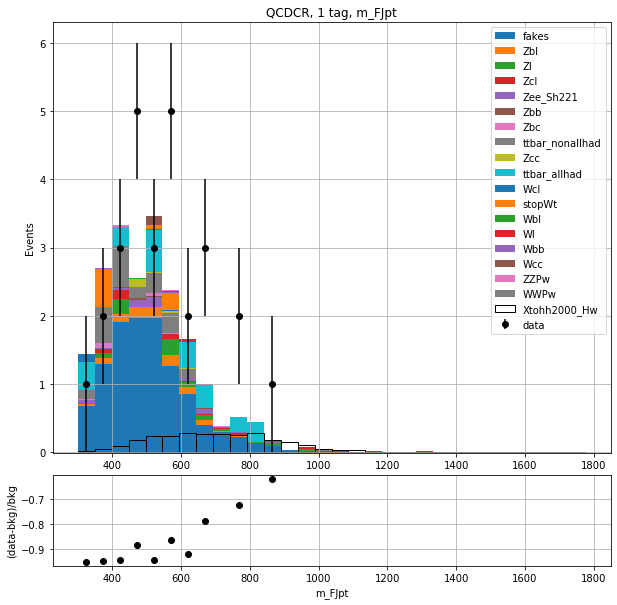

::: QCDCR 1 m_FJeta
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 2 0 0 0 0 3 2 0 2 0 0 0 1 2 0 3 1 1 1 3 1 1 2 0 0 1 1 0 0]
BACK [ 3.35296687  3.90922439  3.98943502  5.22656085  7.06135218  6.92735133
 15.4400329  10.57405911 14.28129571  9.02390992 15.28325306 17.20233952
 14.57970793 12.36427379 10.29648862 18.66497187 12.56340154 12.17070821
 16.91248418 19.26960042 12.61611435  9.30965853  6.58493661 11.55548687
  7.58906654  6.64181325  8.86323854  4.29563713  3.70694292  3.10355568]
DIFF [-1.         -0.48838956 -1.         -1.         -1.         -1.
 -0.8056999  -0.81085788 -1.         -0.77836658 -1.         -1.
 -1.         -

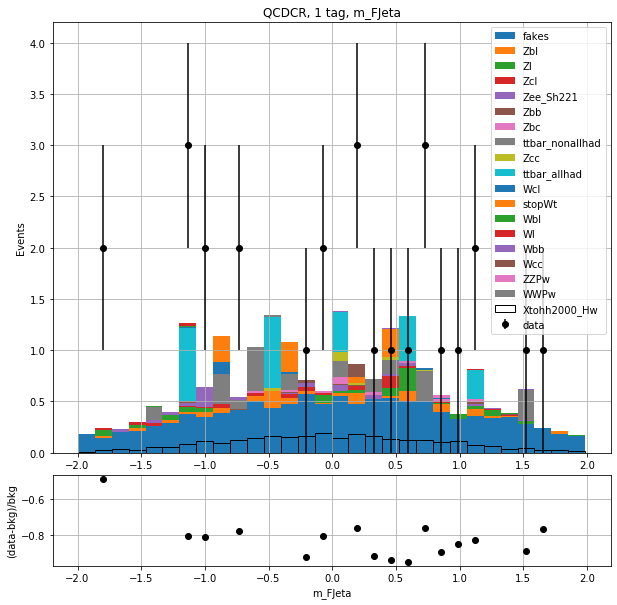

::: QCDCR 1 m_FJphi
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [3 0 0 1 1 0 1 1 0 2 3 3 0 0 0 1 1 1 0 1 0 1 0 1 1 3 1 0 0 1]
BACK [ 9.38014696  7.62251827  9.30144524 13.72154437 11.24751706 12.34329317
  9.92532955  9.46134176 11.44654299 12.39711861  8.9869637  11.09991585
  9.83762873 11.05433616 10.25114539  5.6777389   5.97532208  7.33734643
 10.52031846  7.79434661 11.38021813 12.29791401  8.42059574 12.27150589
  7.54612355 11.84523427 11.27540559 14.81485554  5.79168099 12.33492291]
DIFF [-0.68017559 -1.         -1.         -0.92712191 -0.91109149 -1.
 -0.89924768 -0.89430675 -1.         -0.83867219 -0.66618314 -0.72972768
 -1.  

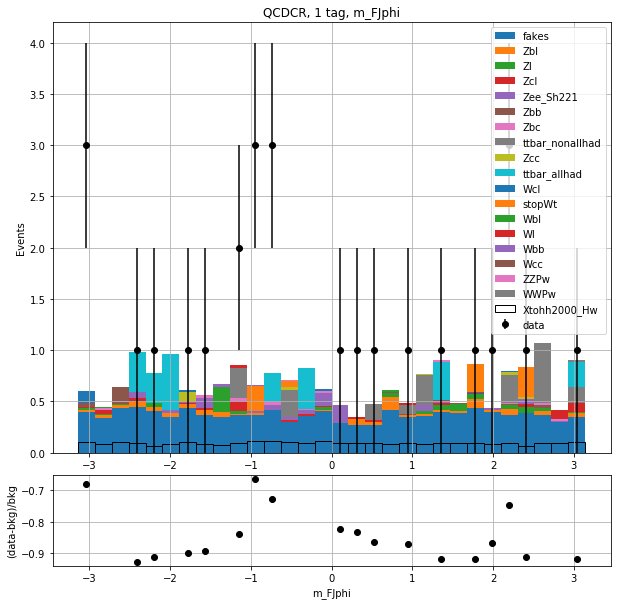

::: QCDCR 1 m_FJm
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [5 5 2 3 2 3 1 1 1 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 6.00678854e+01  2.77039546e+01  3.81163590e+01  2.95782439e+01
  2.73905589e+01  2.39072758e+01  1.95924045e+01  1.37442690e+01
  2.52256724e+01  7.71092796e+00  9.52151614e+00  5.96721961e+00
  3.74568170e+00  4.99932343e+00  2.13819158e+00  5.87459564e-01
  1.33190000e+00  6.23765945e-01  6.49901390e-01 -1.38359070e-02
  6.99453354e-01  1.56380832e-01  7.55922794e-02  8.83109570e-02
  0.00000000e+00 -3.96881104e-02 -5.83477020e-02 -1.00810647e-01
  0.00000000e+00 -4.93011475e-02]
DIFF [-0.91676085 -0.8195203

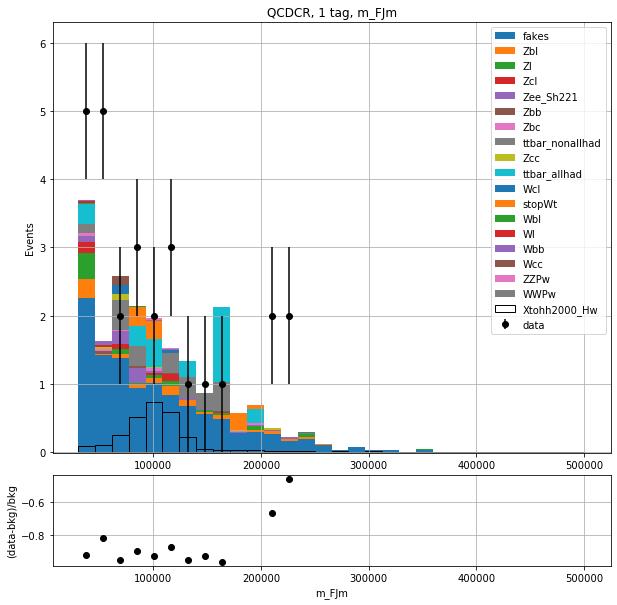

::: QCDCR 1 m_DTpt
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [1 2 1 3 5 4 3 2 2 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.22804213e+01  1.23856811e+01  1.62530954e+01  3.01152371e+01
  6.16849302e+01  4.65732102e+01  3.22757649e+01  2.73277720e+01
  2.44150273e+01  1.41004971e+01  9.14838487e+00  5.56028900e+00
  2.62093402e+00  2.25141960e+00  1.70015450e+00  1.14483863e+00
  1.13653868e+00  8.13056946e-01  8.27081680e-01  1.36075974e-01
  3.34874332e-01 -4.46319580e-04  1.38204575e-01 -1.18446350e-03
 -3.77655029e-04  0.00000000e+00  0.00000000e+00  1.40693665e-01
  0.00000000e+00  0.00000000e+00]
DIFF [-0.91856957 -0.838523

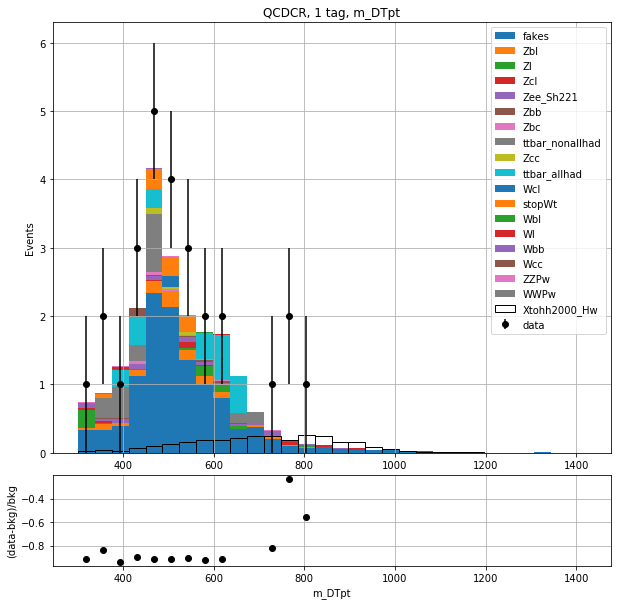

::: QCDCR 1 m_DTeta
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [2 3 1 0 1 0 1 1 0 1 2 1 0 0 0 0 1 1 1 1 2 1 1 0 1 0 2 0 3 0]
BACK [ 5.33884732  6.54211874  8.04825113  2.67713084  2.55958547 10.94852431
  5.36947911  9.91482841 10.92455822  9.17138583 10.63344354 18.87686575
 13.0329815  19.53140318 16.42392659 15.96299621 14.80945836 11.90830938
 14.71007606 16.50823468  8.93364866 10.29511236 11.29971496 11.9605435
 10.47328222  1.50569564  4.67940042  6.29613197  5.72063088  8.30354482]
DIFF [-0.6253873  -0.54143296 -0.8757494  -1.         -0.60931174 -1.
 -0.8137622  -0.89914097 -1.         -0.89096522 -0.81191418 -0.9470251
 -1.    

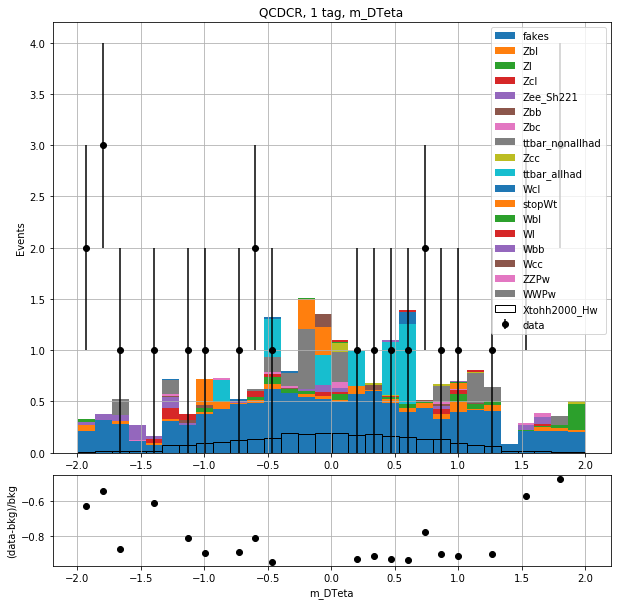

::: QCDCR 1 m_DTphi
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [1 1 1 0 1 0 1 0 1 1 1 3 0 1 2 1 0 0 2 0 0 1 2 0 0 3 2 1 0 1]
BACK [ 8.26895502  4.54382424  8.51812664 11.69768963  7.4650043   8.77626269
  9.76019243 12.59848833  8.481998   10.66226591 10.65638971 11.61130048
  9.21394299 12.47799759 12.25895238  7.71083123  7.03553099 15.4706798
  8.67024149 10.50307059 13.68636785 11.2997344  10.41490238 11.32899024
  9.61634947  9.58165947 11.45894828  9.44717393 10.43913496  9.70506045]
DIFF [-0.87906573 -0.77992107 -0.88260329 -1.         -0.8660416  -1.
 -0.897543   -1.         -0.88210325 -0.90621131 -0.90615959 -0.74163101
 -1.   

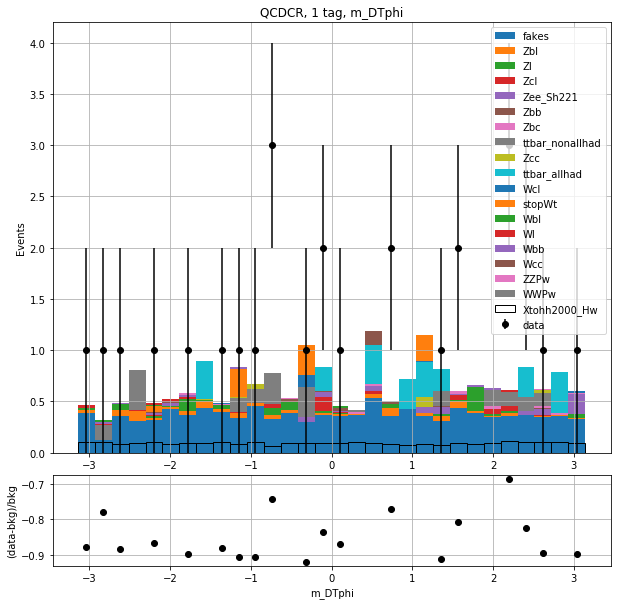

::: QCDCR 1 m_DTm
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [1 1 3 2 3 2 5 3 1 0 2 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 2.20256782e+00  1.21643441e+01  2.22353844e+01  3.53983374e+01
  3.96697817e+01  4.79349768e+01  3.08757709e+01  1.66793179e+01
  1.68351020e+01  1.53090576e+01  2.16340697e+01  7.84961283e+00
  1.20412230e+01  4.43566322e+00  7.85247329e+00  2.12959671e+00
  3.54960418e+00  6.96567535e-01  1.56460741e+00  3.47719153e-01
  5.35360336e-01  6.18462209e-01  2.75207520e-01  1.17931366e-01
  1.37432098e-01 -5.49316406e-03  0.00000000e+00  1.38839722e-01
  1.40693665e-01 -3.74221802e-03]
DIFF [-0.54598447 -0.9177925

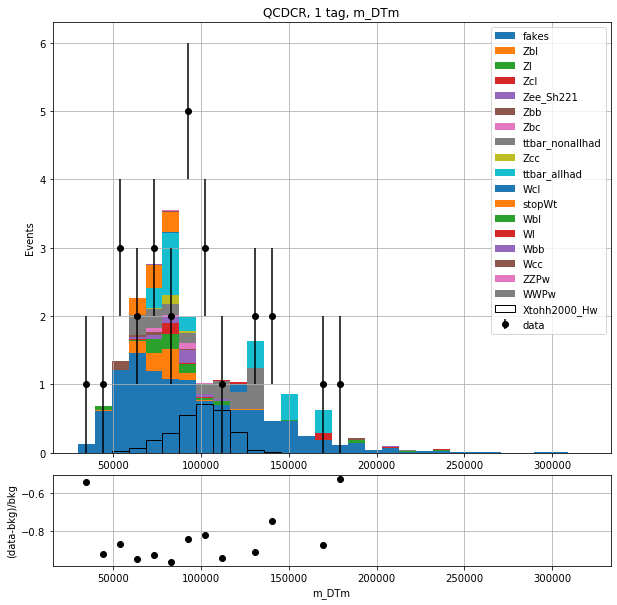

::: QCDCR 1 m_DTpt_Eff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 0 0 0 0 1 3 3 6 5 1 3 1 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 7.00664973e-02  1.14300870e-01 -3.02459551e-02  1.24969042e-01
  5.60994341e+00  1.73308003e+01  3.00297696e+01  3.89392666e+01
  5.88785487e+01  5.17007669e+01  3.03321564e+01  2.33937055e+01
  2.47888491e+01  8.18756312e+00  4.98467039e+00  2.27064496e+00
  2.68439702e+00  1.59211083e+00  9.41591263e-01  5.28871536e-01
  5.61195374e-01 -3.65638733e-03  1.94609821e-01 -8.41140747e-04
 -9.26971436e-04 -2.02560425e-03  0.00000000e+00  1.40693665e-01
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.  

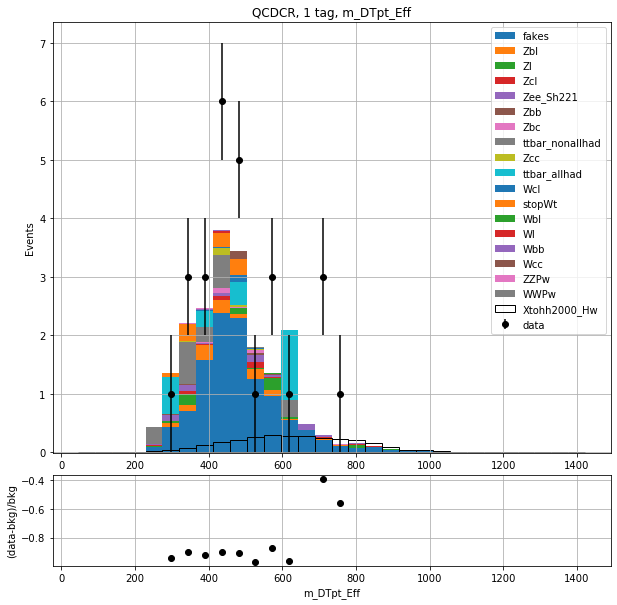

::: QCDCR 1 m_DTeta_Eff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 0 0 3 3 0 1 1 1 2 1 1 0 0 1 1 1 3 1 1 1 1 1 1 2 0 0 0 0 0]
BACK [ 7.82619147e-02 -2.70201100e-03  2.47086682e+00  6.52248519e+00
  6.93715910e+00  7.49139662e+00  8.11640013e+00  9.12327524e+00
  1.43813874e+01  1.45416072e+01  1.55479479e+01  2.13576588e+01
  2.38349213e+01  2.19941182e+01  2.50405183e+01  1.37463690e+01
  1.73996041e+01  1.49171328e+01  1.88047621e+01  1.46442283e+01
  1.41821027e+01  8.30618799e+00  6.88278651e+00  1.29467526e+01
  3.46170884e+00  6.35387421e-01 -2.02560425e-03  0.00000000e+00
  0.00000000e+00 -1.71661377e-04]
DIFF [-1.         -1. 

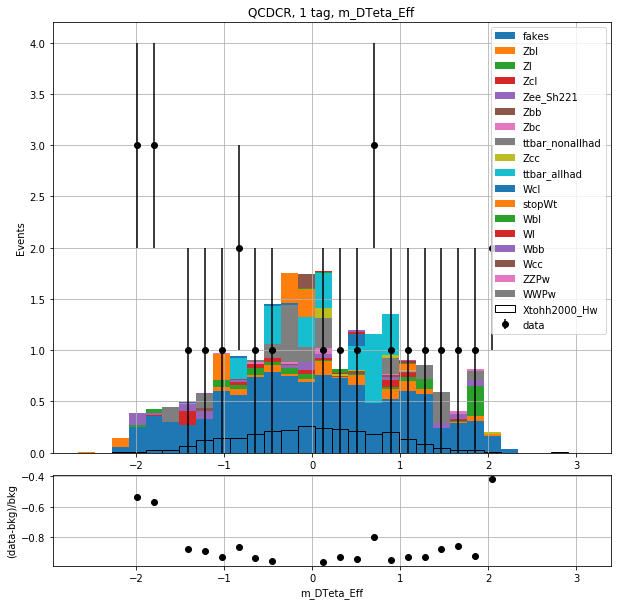

::: QCDCR 1 m_DTphi_Eff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [1 1 1 0 1 0 1 0 1 1 1 3 0 2 1 1 0 0 1 1 0 1 1 1 0 4 2 0 0 1]
BACK [ 7.62154808  3.8959745  10.30210123  9.02784907 10.58302479  8.5895685
  8.25605628 11.80200955  9.98409394  9.37000943 10.98099507 12.85493097
 11.64133595  7.06243252 12.50659695 10.67380284  6.65411874 13.95048551
  8.74116811 11.33435027 11.0271972  11.90140055 13.16625649 10.65597089
 11.50222702  8.06437476  8.73946849  9.69508359 12.79006866  9.98558325]
DIFF [-0.86879306 -0.74332481 -0.90293242 -1.         -0.90550906 -1.
 -0.87887679 -1.         -0.89984069 -0.89327652 -0.90893357 -0.76662652
 -1

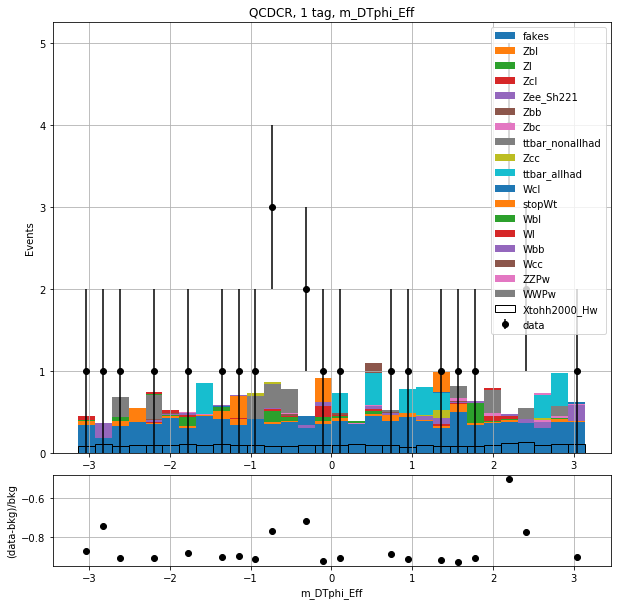

::: QCDCR 1 m_DTm_Eff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 1 4 3 5 7 4 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 7.79118740e+00  3.20260323e+01  4.92303380e+01  5.12699422e+01
  3.39396392e+01  4.78007090e+01  2.61335762e+01  2.29451981e+01
  1.71104763e+01  5.10101499e+00  2.77769828e+00  1.54475698e+00
  3.10300499e+00  1.13070570e+00  7.22642899e-01  5.28717041e-02
  2.03697026e-01 -1.19716644e-01  3.77843857e-01  1.40058517e-01
 -4.43401337e-02  1.24591827e-01  0.00000000e+00 -5.14984131e-04
 -2.74658203e-04 -4.63485718e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -0.968

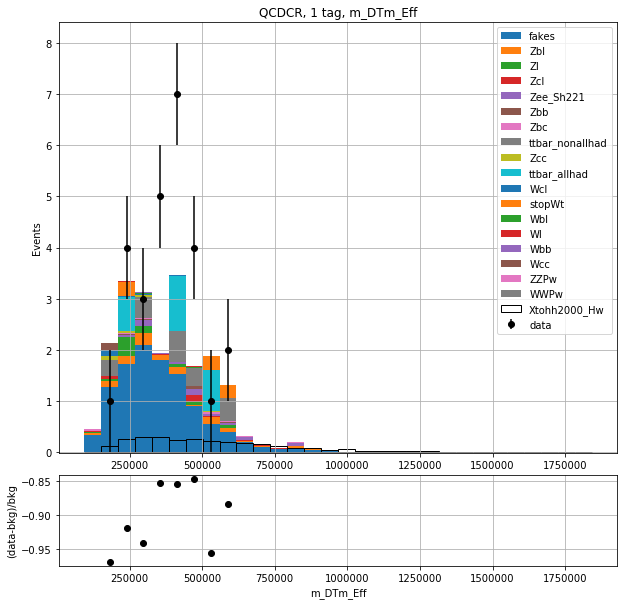

::: QCDCR 1 m_DTpt_ConEff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 0 3 2 7 7 2 3 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.59984696e-01  4.38558224e+00  3.52516856e+01  4.43040076e+01
  4.24780236e+01  4.39297719e+01  3.25270698e+01  2.72968345e+01
  1.73313777e+01  1.40743937e+01  1.69295924e+01  9.54574286e+00
  4.28584948e+00  3.74994375e+00  3.77277499e+00  1.42851543e+00
  7.47619629e-01  4.38749313e-01  2.93540955e-01  1.15613937e-01
 -9.61303711e-04  1.15373611e-01 -6.69479370e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1

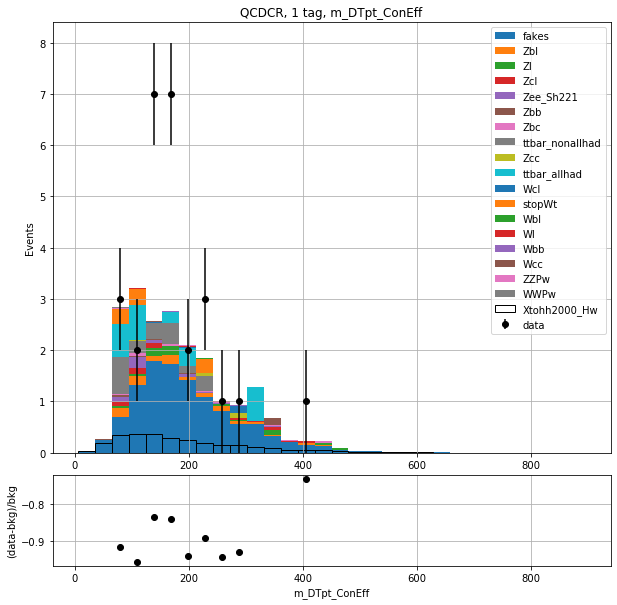

::: QCDCR 1 m_DTeta_ConEff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 0 0 3 3 0 1 1 1 2 1 1 0 0 1 1 1 3 1 1 1 1 1 1 2 0 0 0 0 0]
BACK [ 7.82619147e-02 -2.70201100e-03  2.47086682e+00  6.52248519e+00
  6.93715910e+00  7.49139662e+00  8.11640013e+00  9.12327524e+00
  1.43813874e+01  1.45416072e+01  1.55479479e+01  2.13576588e+01
  2.38349213e+01  2.19941182e+01  2.50405183e+01  1.37463690e+01
  1.73996041e+01  1.49171328e+01  1.88047621e+01  1.46442283e+01
  1.41821027e+01  8.30618799e+00  6.88278651e+00  1.29467526e+01
  3.46170884e+00  6.35387421e-01 -2.02560425e-03  0.00000000e+00
  0.00000000e+00 -1.71661377e-04]
DIFF [-1.         -

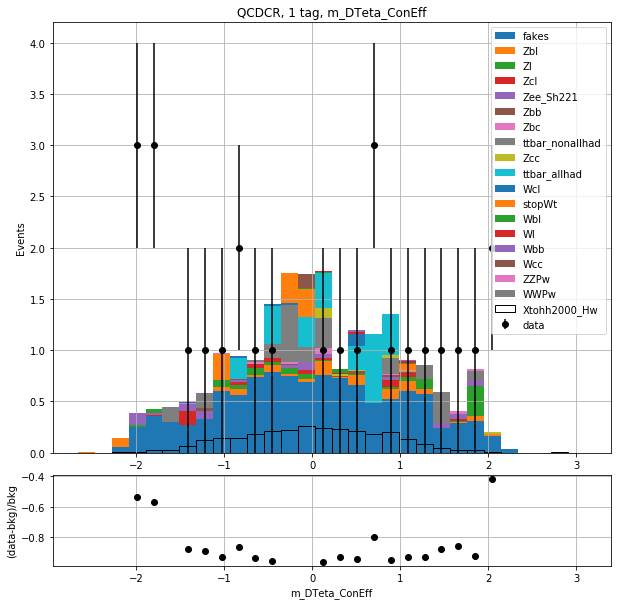

::: QCDCR 1 m_DTphi_ConEff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [1 1 1 0 1 0 1 0 1 1 1 3 0 2 1 1 0 0 1 1 0 1 1 1 0 4 2 0 0 1]
BACK [ 7.62154808  3.8959745  10.30210123  9.02784907 10.58302479  8.5895685
  8.25605628 11.80200955  9.98409394  9.37000943 10.98099507 12.85493097
 11.64133595  7.06243252 12.50659695 10.67380284  6.65411874 13.95048551
  8.74116811 11.33435027 11.0271972  11.90140055 13.16625649 10.65597089
 11.50222702  8.06437476  8.73946849  9.69508359 12.79006866  9.98558325]
DIFF [-0.86879306 -0.74332481 -0.90293242 -1.         -0.90550906 -1.
 -0.87887679 -1.         -0.89984069 -0.89327652 -0.90893357 -0.76662652


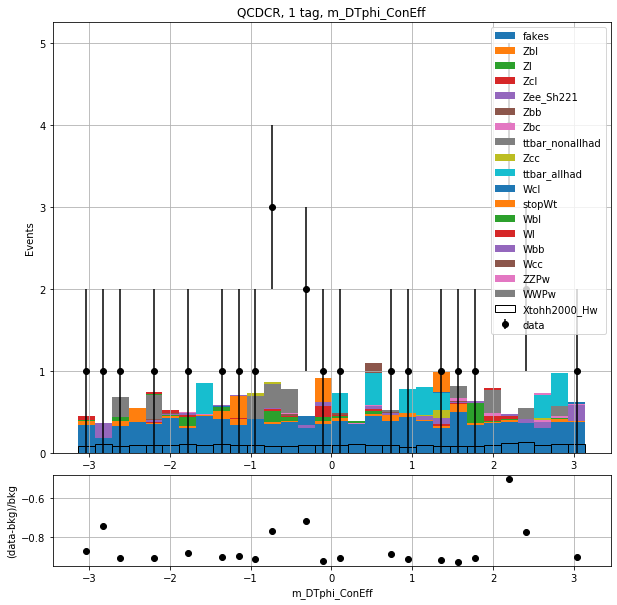

::: QCDCR 1 m_DTm_ConEff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 303.36016681   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan        

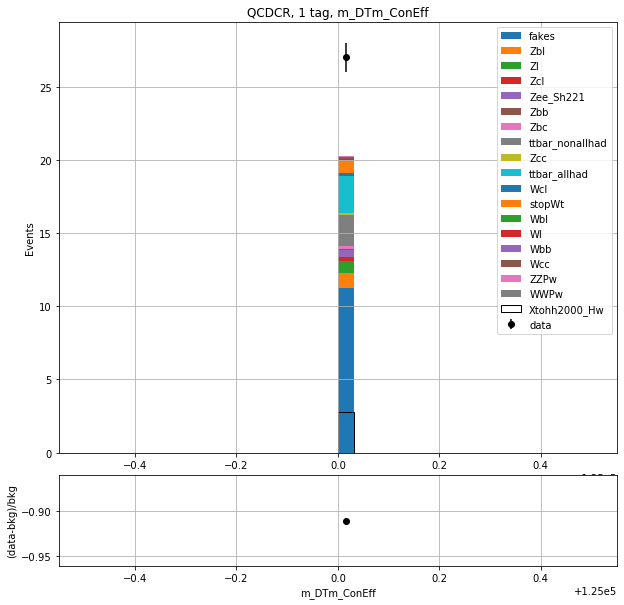

::: QCDCR 1 m_DTpt_ConVis
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 3 1 2 3 2 4 1 1 1 1 4 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
BACK [12.01557868 13.56711143 29.56171779 34.71981106 26.14851691 16.26130575
 30.51139768 21.77597022 21.35581146 20.31633669 14.01228565 19.79843136
 11.02606386  8.35122868  5.1677838   5.4221772   2.93848228  3.51269054
  1.89913291  1.19924355  1.51860857  1.20706272  0.25617027  0.25467682
  0.14069366  0.          0.14069366  0.14069366  0.          0.14069366]
DIFF [-1.         -0.77887703 -0.96617247 -0.942396   -0.88527074 -0.87700865
 -0.86890145 -0.95407782 -0.95317434 -0.95077853 -0.92863406 -0.7

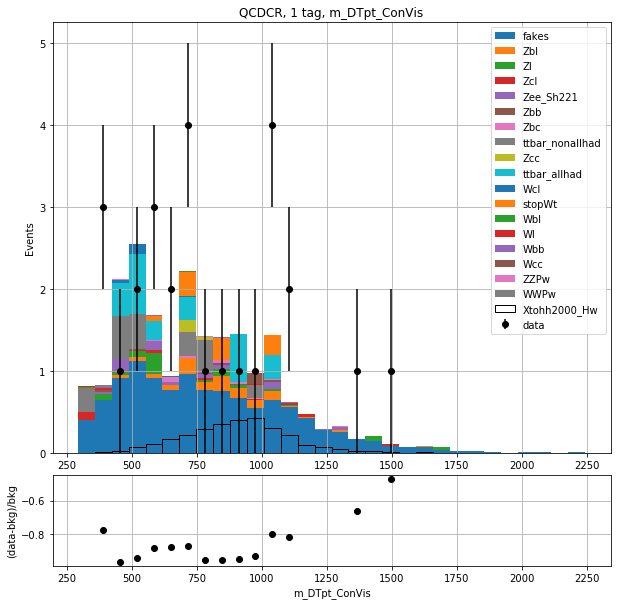

::: QCDCR 1 m_DTeta_ConVis
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [2 3 1 0 1 0 1 1 0 1 2 1 0 0 0 0 1 1 1 1 2 1 1 0 1 0 2 0 3 0]
BACK [ 5.33884732  6.54211874  8.04825113  2.67713084  2.55958547 10.94852431
  5.36947911  9.91482841 10.92455822  9.17138583 10.63344354 18.87686575
 13.0329815  19.53140318 16.42392659 15.96299621 14.80945836 11.90830938
 14.71007606 16.50823468  8.93364866 10.29511236 11.29971496 11.9605435
 10.47328222  1.50569564  4.67940042  6.29613197  5.72063088  8.30354482]
DIFF [-0.6253873  -0.54143296 -0.8757494  -1.         -0.60931174 -1.
 -0.8137622  -0.89914097 -1.         -0.89096522 -0.81191418 -0.9470251
 

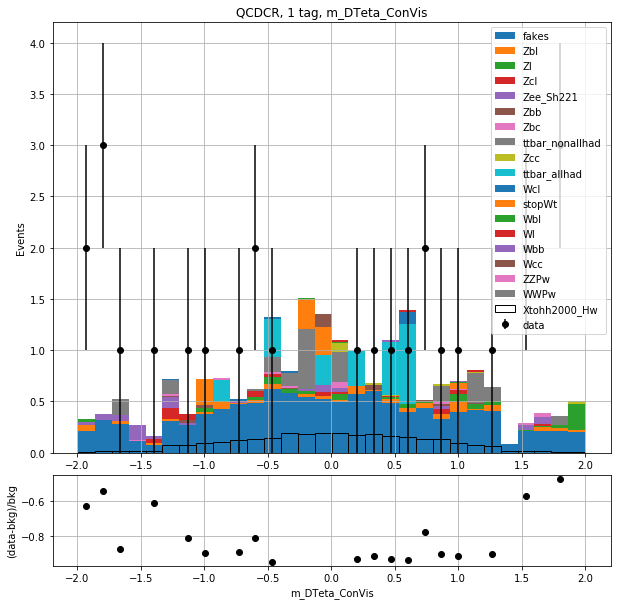

::: QCDCR 1 m_DTphi_ConVis
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [1 1 1 0 1 0 1 0 1 1 1 3 0 1 2 1 0 0 2 0 0 1 2 0 0 3 2 1 0 1]
BACK [ 8.26895502  4.54382424  8.51812664 11.69768963  7.4650043   8.77626269
  9.76019243 12.59848833  8.481998   10.66226591 10.65638971 11.61130048
  9.21394299 12.47799759 12.25895238  7.71083123  7.03553099 15.4706798
  8.67024149 10.50307059 13.68636785 11.2997344  10.41490238 11.32899024
  9.61634947  9.58165947 11.45894828  9.44717393 10.43913496  9.70506045]
DIFF [-0.87906573 -0.77992107 -0.88260329 -1.         -0.8660416  -1.
 -0.897543   -1.         -0.88210325 -0.90621131 -0.90615959 -0.74163101


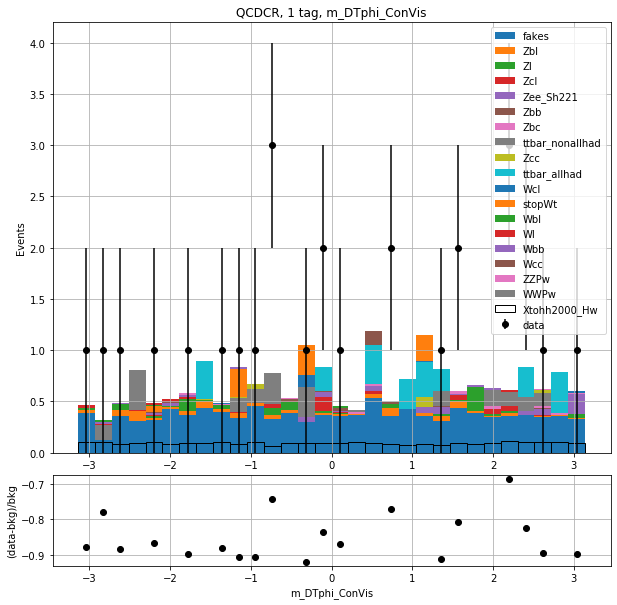

::: QCDCR 1 m_DTm_ConVis
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 303.36016681   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan        

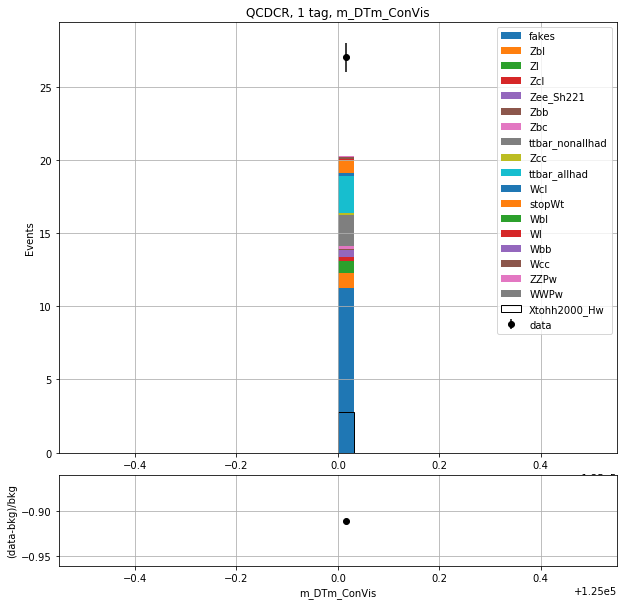

::: QCDCR 1 m_dPhiFTwDT
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1  0  1  3  5 16]
BACK [-1.82346313e-02  0.00000000e+00  1.32332314e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.73060240e-03  1.54919474e-01
 -2.00127997e-02 -1.73562393e-02  7.54238945e-02  4.85475203e-01
  1.70297571e+00  8.64721052e-02  1.41010765e-01  2.21129296e+00
  7.98633143e-01  8.16306327e-01  1.34870502e+00  2.06658916e+00
  1.67414816e+00  2.44699347e+00  2.98379840e+00  5.57407955e+00
  8.72703790e+00  1.59812304e+01  2.56973670e+01  3.01126817e+01
  7.03630455e+01  1.29832

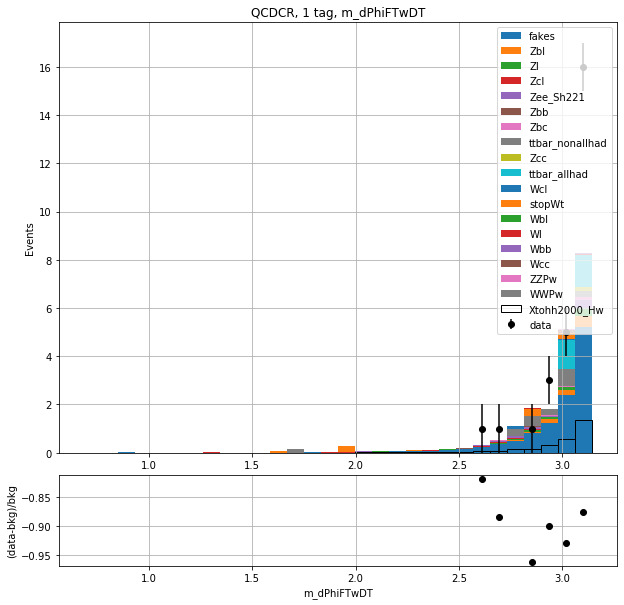

::: QCDCR 1 m_dRFJwDT
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 9 4 2 2 0 1 1 1 0 0 1 0 0 0]
BACK [ 1.40688468e-01  1.57650076e-01 -2.65907831e-02  1.97935535e-01
 -2.30328832e-02  4.14027944e-01  1.77013137e+00  2.09080305e+00
  8.66465360e-01  1.21227756e+00  2.15511383e+00  2.44506846e+00
  5.17129192e+00  1.29348471e+01  1.53023468e+01  3.77413831e+01
  7.21734441e+01  4.67908465e+01  4.14578174e+01  1.87871748e+01
  1.75984002e+01  7.40664813e+00  5.71834171e+00  4.61494919e+00
  2.11184692e+00  1.01753998e+00  9.72410202e-01  5.21936417e-01
  1.12482834e+00  5.13971329e-01]
DIFF [-1.         -1.   

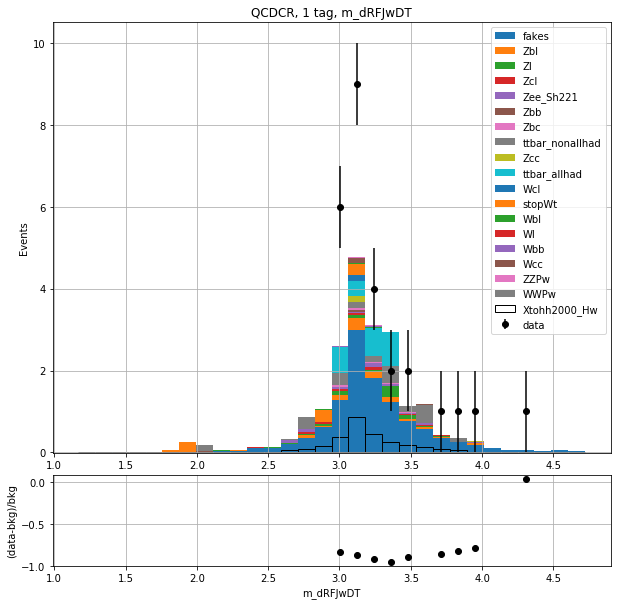

::: QCDCR 1 m_dPhiDTwMET
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [4 0 4 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 2 1 1 6]
BACK [49.61383342 30.89580843 20.9609984  12.26171458 11.19352401  7.28967662
  7.00350156  8.97386329  4.76133615  9.74872434  1.34436196  0.
  0.          0.          0.          0.          0.          0.
  0.          1.94973852  5.7922437   6.98531007  5.35515122  5.70183377
  6.11590632 10.7497368  12.3004484  13.23426148 27.95581294 43.17245869]
DIFF [-0.91937732 -1.         -0.8091694  -0.83689067 -1.         -1.
 -0.85721428 -1.         -1.         -0.89742248 -1.                 nan
         nan     

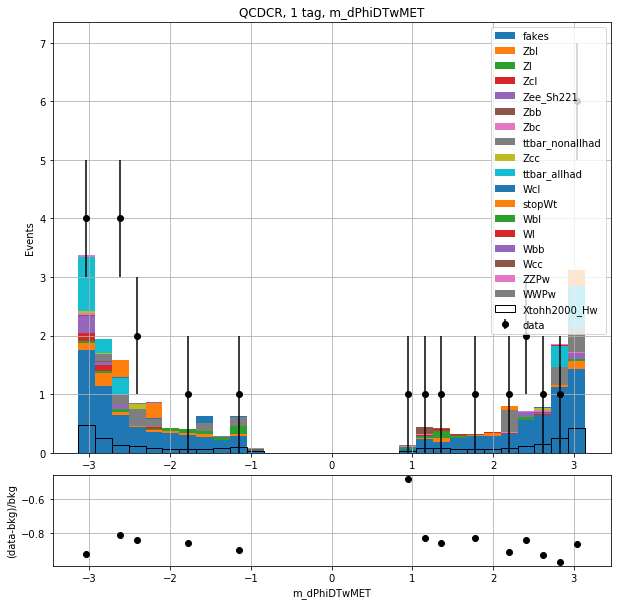

::: QCDCR 1 m_MET
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [ 3 14  7  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 9.31337613e+01  8.28470323e+01  4.65075212e+01  3.53621317e+01
  1.54133775e+01  1.22513008e+01  1.07656228e+01  1.97586921e+00
  2.10266578e+00  1.12261903e+00  1.18970082e+00 -1.48332275e-01
  4.18096542e-01  3.02982330e-02  7.68013000e-02  2.06800461e-01
  1.00782394e-01  9.83276367e-02 -3.43322754e-05 -1.80587769e-02
 -4.41684723e-02 -2.05993652e-04 -1.28917694e-02 -2.57492065e-04
 -2.23159790e-04  0.00000000e+00 -1.81274414e-02  0.00000000e+00
  0.00000000e+00 -2.05993652e-0

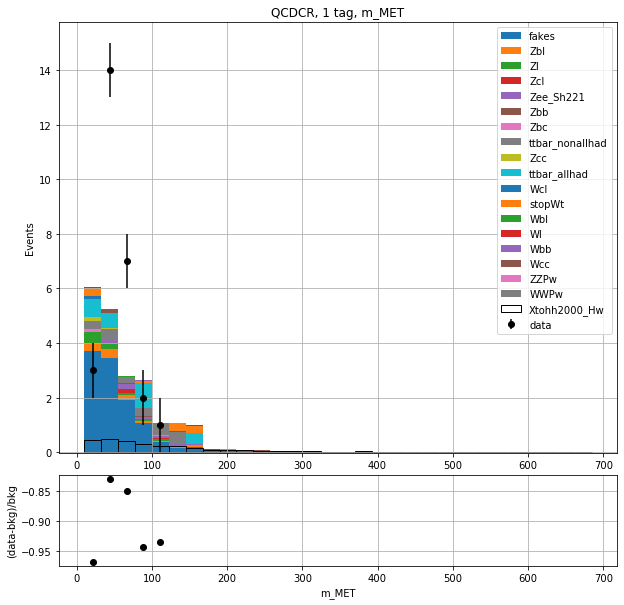

::: QCDCR 1 m_hhm
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 0 0 4 7 4 2 2 1 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 8.87098836e-02  3.63303412e-01  2.10102678e+01  5.79723194e+01
  5.38578778e+01  4.65289397e+01  4.15714988e+01  2.27034893e+01
  1.66435987e+01  1.64770062e+01  5.76832998e+00  6.78038058e+00
  2.98883928e+00  3.32430279e+00  2.00091678e+00  1.24415016e+00
  3.70822906e-01  7.23140717e-01  4.30289805e-01  8.64589691e-01
  5.37128448e-01  3.75680923e-01  1.76179130e-01  1.40693665e-01
  4.22080994e-01 -1.80244446e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.64794922e-03]
DIFF [-1.         -1.       

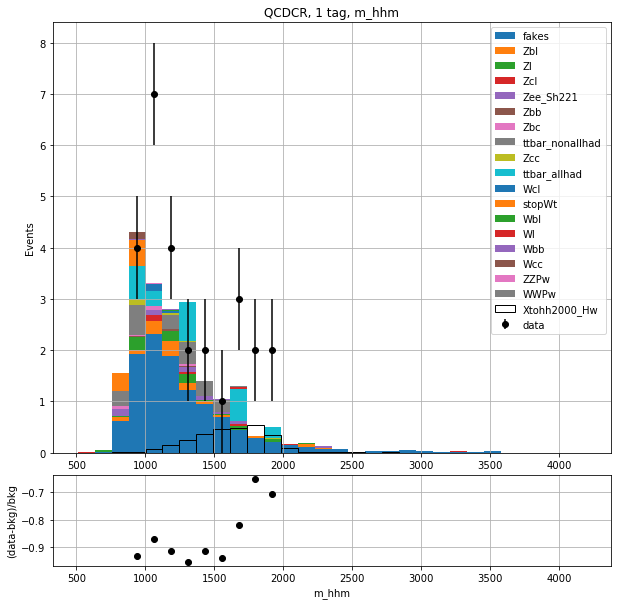

::: QCDCR 1 m_bbttpt
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [10  5  4  2  1  2  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [ 5.11843059e+01  7.69778051e+01  5.79702860e+01  4.74183556e+01
  2.44992111e+01  1.41977111e+01  7.82752940e+00  5.34168780e+00
  5.13422108e+00  2.71336439e+00  2.58983076e+00  8.58865827e-01
  2.49321904e+00  2.60045922e+00  1.73824400e-01  3.29716235e-01
  4.17823792e-02  1.16355896e-01  1.49566650e-01 -4.46319580e-04
  3.55682373e-02  2.03075409e-01  3.30519676e-03  1.04208231e-01
  1.22481346e-01  2.74977028e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.04713440

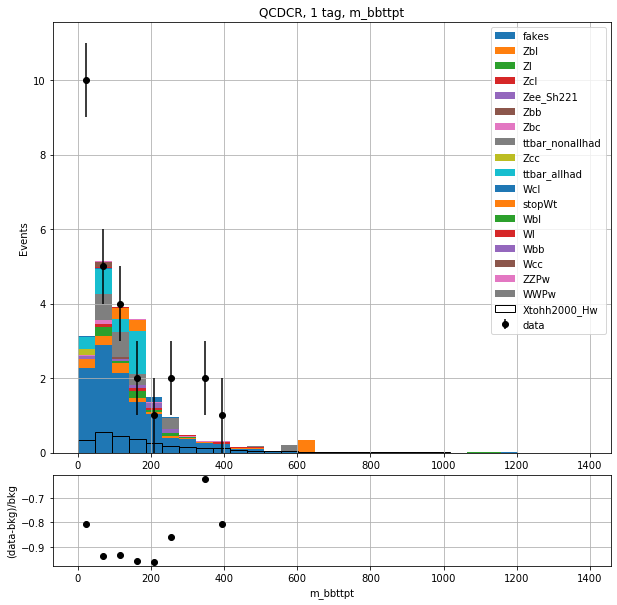

::: QCDCR 1 m_hhm_Coll
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
BACK [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
 303.36016681   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         n

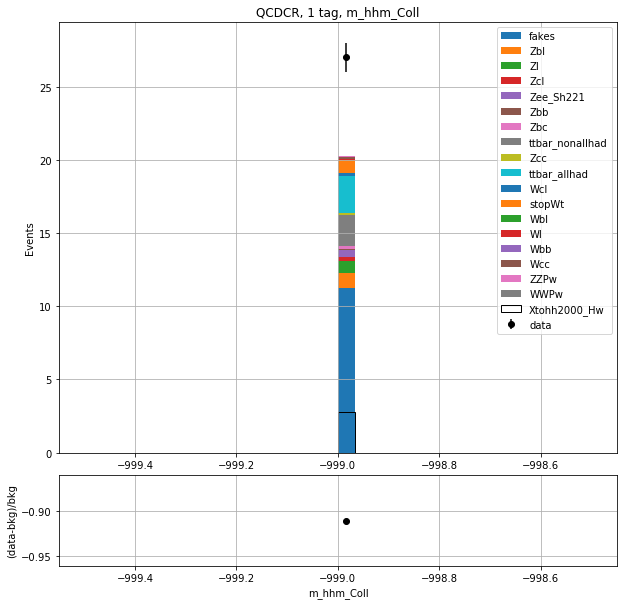

::: QCDCR 1 m_hhm_Eff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 0 5 5 4 3 2 1 1 4 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.63588841e+00  2.15273201e+01  5.39316862e+01  5.33465638e+01
  4.41015097e+01  4.04474457e+01  2.27638033e+01  2.05184520e+01
  1.58297919e+01  7.25982461e+00  7.03361398e+00  3.20571318e+00
  3.48911166e+00  1.96849916e+00  1.70394582e+00  8.21359932e-01
  4.84291077e-01  6.64968073e-01  6.64827347e-01  4.54851151e-01
  5.36682129e-01  9.00909491e-02  2.23434448e-01  2.81387329e-01
  4.22080994e-01 -4.44087982e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.64794922e-03]
DIFF [-1.         -1.   

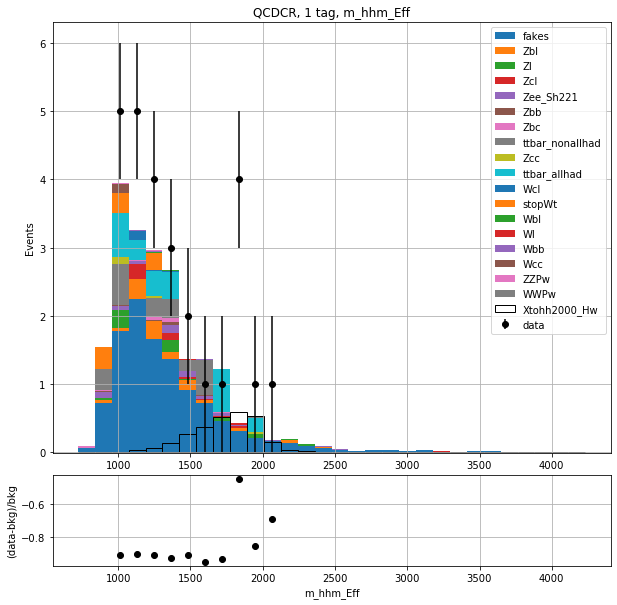

::: QCDCR 1 m_hhm_ConEff
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 0 1 2 7 4 3 2 4 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 2.28514688e-01  1.18413813e+01  2.07944231e+01  3.64712813e+01
  4.84419352e+01  2.97565383e+01  3.51061967e+01  3.10440310e+01
  2.93901446e+01  1.78379928e+01  1.19047528e+01  6.79542986e+00
  5.96046048e+00  5.82517624e+00  2.37569520e+00  2.49177551e+00
  2.72294652e+00  9.91930068e-01  7.73962021e-01  1.26257551e+00
  4.63706195e-01  2.75717020e-01 -6.17980957e-04  1.40693665e-01
  0.00000000e+00  1.15785599e-01 -1.64794922e-03  1.15785599e-01
  9.34383459e-02  1.40693665e-01]
DIFF [-1.         -1.

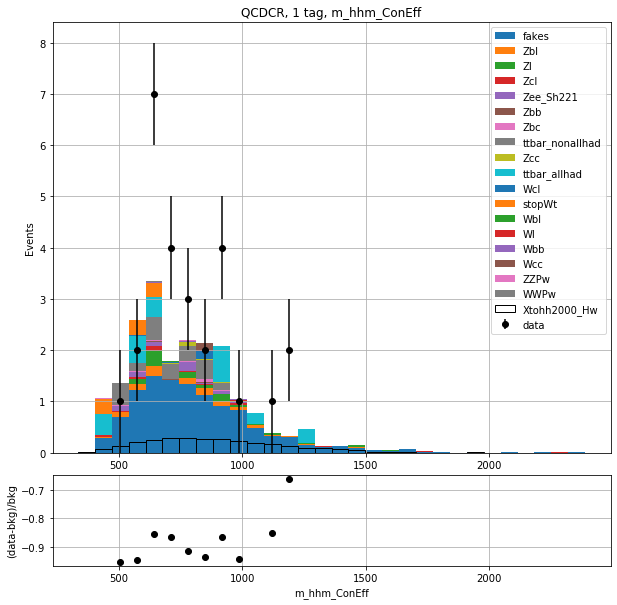

::: QCDCR 1 m_hhm_ConVis
df_data.shape (27, 3)
df_signal.shape (2177, 3)
fakes 4053 11.214021
Zbl 98 1.0862455
Zl 51 0.78425884
Zcl 37 0.29172456
Zee_Sh221 34 0.48606688
Zbb 18 0.073717475
Zbc 14 0.16430224
ttbar_nonallhad 12 2.1140103
Zcc 8 0.18211223
ttbar_allhad 8 2.5202265
Wcl 5 0.17768818
stopWt 4 0.871206
Wbl 3 0.030329425
Wl 3 0.055728532
Wbb 3 0.03694246
Wcc 2 0.13590297
ZZPw 2 0.03583426
WWPw 1 0.02100775
DATA [0 1 3 2 3 5 4 3 3 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.84985302e+00  1.94241535e+01  3.75243268e+01  5.27723686e+01
  4.91401950e+01  4.11526592e+01  3.33471734e+01  1.72754217e+01
  1.40649039e+01  1.22977620e+01  7.89755148e+00  3.05529159e+00
  3.87931299e+00  2.36390769e+00  2.20796072e+00  1.94931018e+00
  6.46821082e-01  3.14535141e-01  9.34383459e-02  3.44009399e-01
  5.71306229e-01  1.00719810e-01  2.56479263e-01  3.12681198e-01
 -1.75781250e-02  1.40693665e-01 -1.80244446e-03  1.15785599e-01
  1.40693665e-01  1.40693665e-01]
DIFF [-1.         -0.

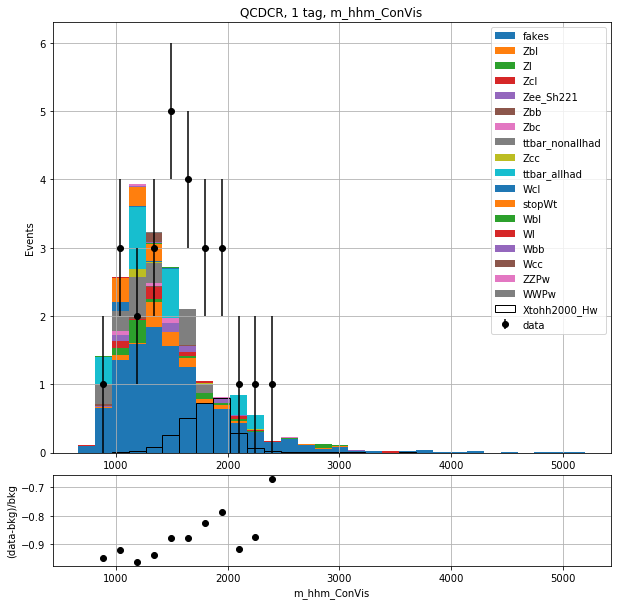

-->df.shape (2306, 38)
::: QCDCR 2 m_AntiBTag
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [6.35465006 0.         0.         0.         0.         0.
 0.         0.         0.         0.         6.17745221 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         2.15833769 0.         0.         0.
 0.         0.         0.         0.         0.         0.01660156]
DIFF [-0.84263492         nan         nan         nan         nan         nan
         nan         nan         nan         nan -1.                 nan
         nan         nan         nan         nan         nan         nan
         nan         nan -1.                 nan         nan         nan
         nan         nan         nan         nan         nan -1.        

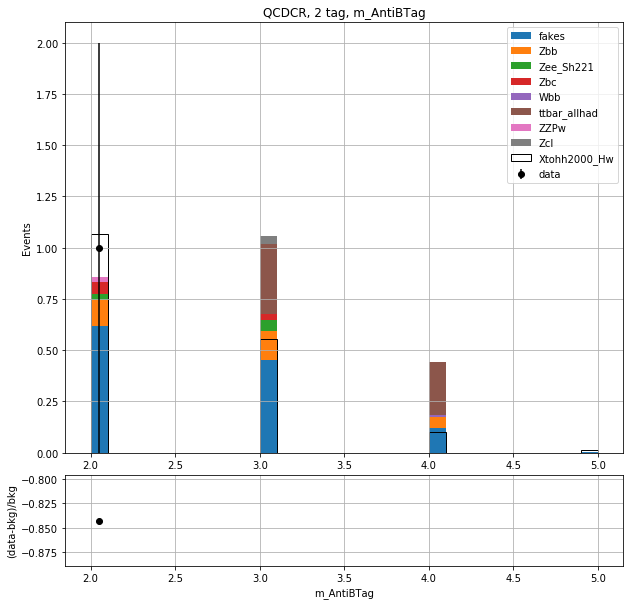

::: QCDCR 2 m_AntiTauTag
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [5.15641817 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         9.55062485]
DIFF [-0.80606693         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan -1.        ]


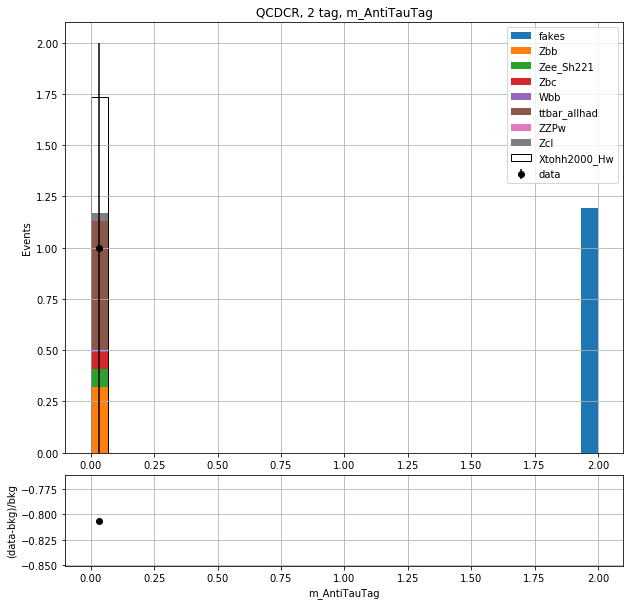

::: QCDCR 2 m_FJpt
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 8.45721425e-01  1.18778594e+00  1.12272492e+00  2.69884074e+00
  2.57907732e+00  1.81841651e+00  1.93597119e+00  7.69645587e-01
  4.74388123e-01  3.97027157e-01  1.58971786e-01  2.31834650e-01
  2.12315768e-01  1.21678352e-01 -2.68459320e-03  1.95786953e-02
  3.76338959e-02  6.10266626e-02 -7.40051270e-04 -1.20162964e-04
 -2.06947327e-04  3.85208130e-02 -3.24249268e-04  0.00000000e+00
  0.00000000e+00 -4.00543213e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.10930987 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.       

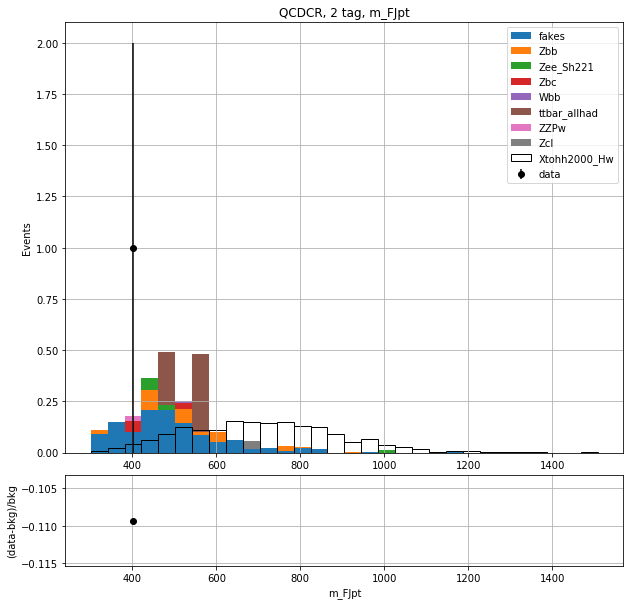

::: QCDCR 2 m_FJeta
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.05945702 0.12833185 0.39530572 0.30811995 0.2440345  0.18922269
 0.34298527 0.54496864 1.87411359 0.41241574 0.60430661 0.59229231
 0.61477204 0.5468858  0.90293706 0.42576824 0.56943282 1.11563098
 1.24596423 0.58324238 0.44959418 0.54265341 0.44650412 0.450243
 0.32344231 0.31591552 0.06278133 0.20960808 0.14171791 0.06439781]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.          0.83496796 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


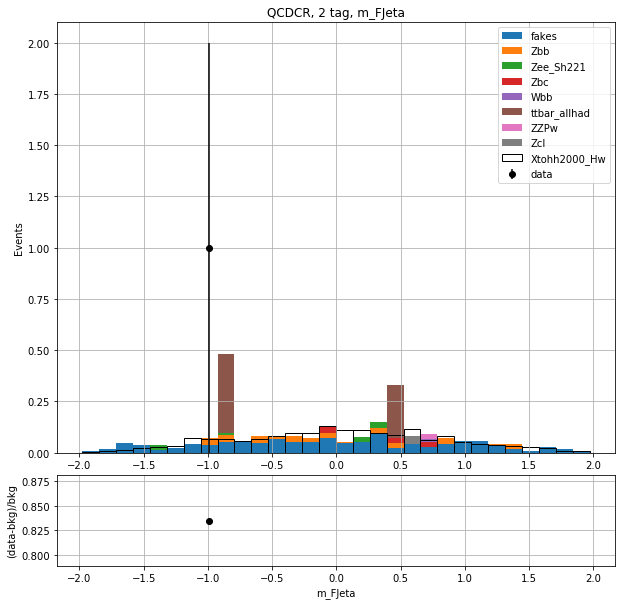

::: QCDCR 2 m_FJphi
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
BACK [0.33933523 0.42254297 0.33988816 0.57158007 1.11201444 0.55399776
 0.5076537  0.27603507 0.49631891 0.46057339 0.51886718 0.74358036
 0.15953612 0.13561416 0.52058357 0.38404894 0.31083393 0.37874374
 0.47075021 0.59246532 0.34348488 0.49384184 0.48367183 0.40916397
 0.70018858 0.45922654 0.34033033 1.50683764 0.23088571 0.44444656]
DIFF [-1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.         1.9383217 -1.        -1.        -1.       ]


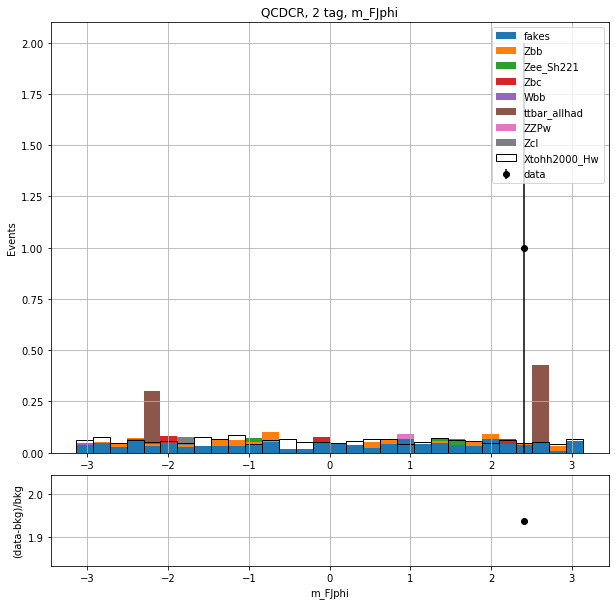

::: QCDCR 2 m_FJm
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.27851092e+00  1.19980285e+00  1.79059245e+00  1.75468063e+00
  8.46467465e-01  1.10470947e+00  2.38279819e-01  7.77364254e-01
  9.26290989e-01  4.99327920e-01  3.40483427e-01  4.75714207e-01
  2.31959897e+00  2.40092278e-01  7.68346786e-02  4.95364785e-01
  3.86581421e-02 -8.12721252e-03  1.40475273e-01  6.24265671e-02
  8.81528854e-02 -1.60779953e-02  3.79459560e-02 -4.31060791e-04
 -4.67300415e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.95910645e-05]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
  3.19674651 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.        

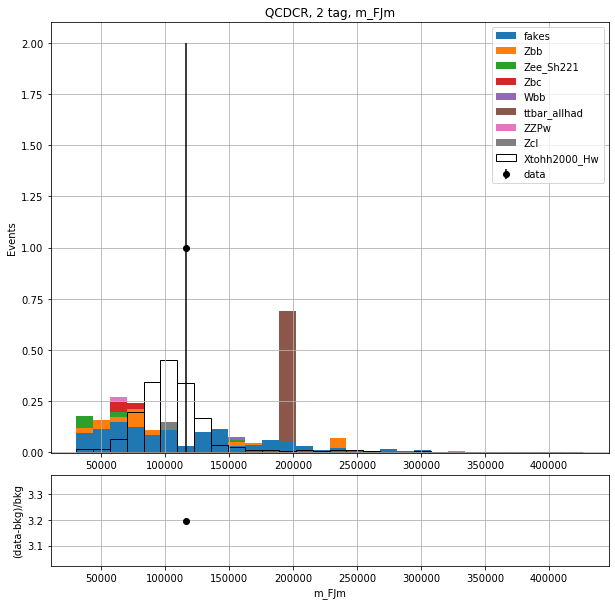

::: QCDCR 2 m_DTpt
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 2.84883967e-01  3.39142939e-01  5.19176191e-01  8.27411538e-01
  2.62826722e+00  3.44074933e+00  2.51627311e+00  6.60106547e-01
  1.06003467e+00  7.85824344e-01  5.67980550e-01  3.71542305e-01
  1.46465749e-03  5.94652623e-01 -3.72791290e-03  5.88779449e-02
 -3.75461578e-03 -1.21784210e-03 -8.72612000e-04 -5.81741333e-04
  6.15168512e-02  0.00000000e+00 -2.56538391e-04 -6.77108765e-05
 -8.67843628e-05 -9.91821289e-05 -1.87873840e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -1.         -1.         -1.         -0.70936563
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1

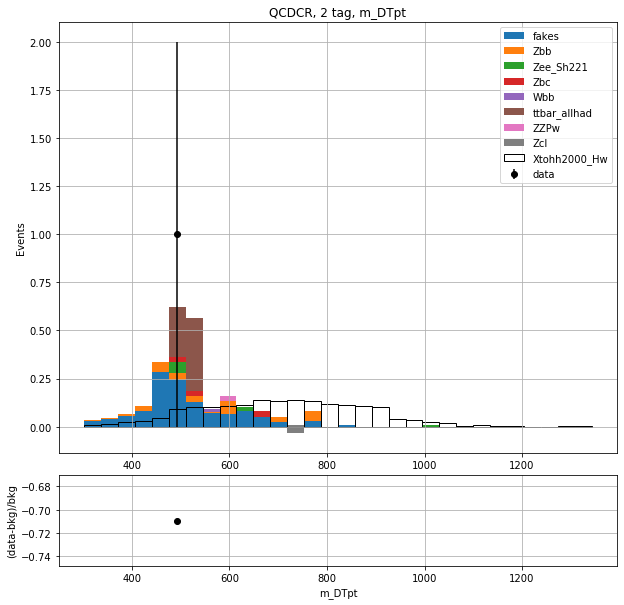

::: QCDCR 2 m_DTeta
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.22283317 0.17996117 0.58702398 0.22956541 0.03873289 0.46110247
 0.31589697 0.48056722 0.3943013  0.85469389 1.73270402 0.75932413
 0.43450785 0.49888791 0.66357565 0.48401138 0.60591156 0.48087439
 0.42199098 0.55464801 1.7486091  0.59623486 0.35425854 0.51564976
 0.20741674 0.26642609 0.0887022  0.13579603 0.09186649 0.30096817]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.          0.65040588 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


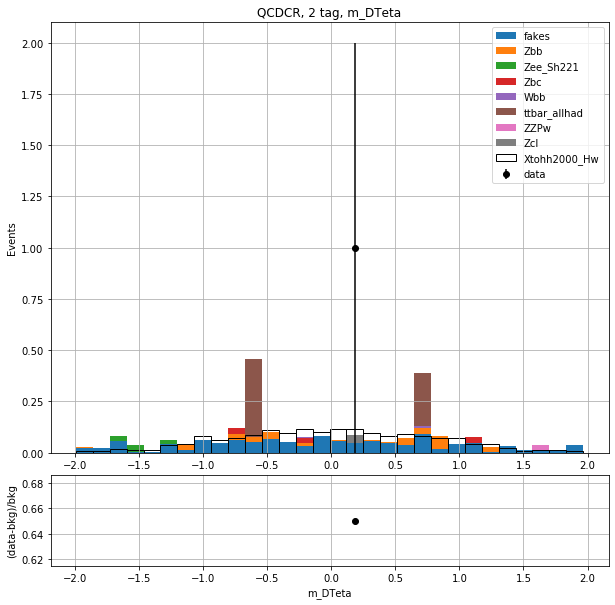

::: QCDCR 2 m_DTphi
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.49120439 0.28000057 0.12566197 0.63183103 0.64110097 0.43392743
 0.47554979 0.52469129 0.52766632 0.61141586 0.25281024 0.42356148
 1.47352818 0.45313946 0.41508732 0.32718468 0.41355848 0.23063898
 1.40523992 0.26283202 0.39717142 0.47234518 0.45015993 0.20382118
 0.88614765 0.30821231 0.67668641 0.44630866 0.16093826 0.30461788]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.32135672 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


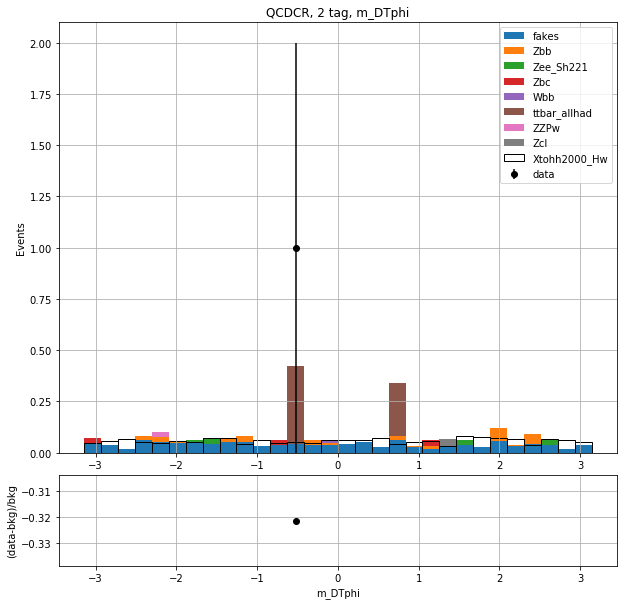

::: QCDCR 2 m_DTm
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.15434936  0.21915984  0.60137438  0.627038    1.40520189  1.01152266
  0.75879304  1.21108225  1.6395043   0.38841628  0.70090851  1.77961692
  0.55375     0.31257868  1.14174607  0.61583974  0.15658617  0.02303028
  0.26642799  0.20310497  0.15438652  0.33090591 -0.02186584  0.09239483
  0.          0.09116077  0.11350918  0.12505722  0.          0.05146217]
DIFF [-1.        -1.        -1.        -1.        -1.        -0.0113914
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.
        nan -1.        -1.        -1.               nan -1.       ]


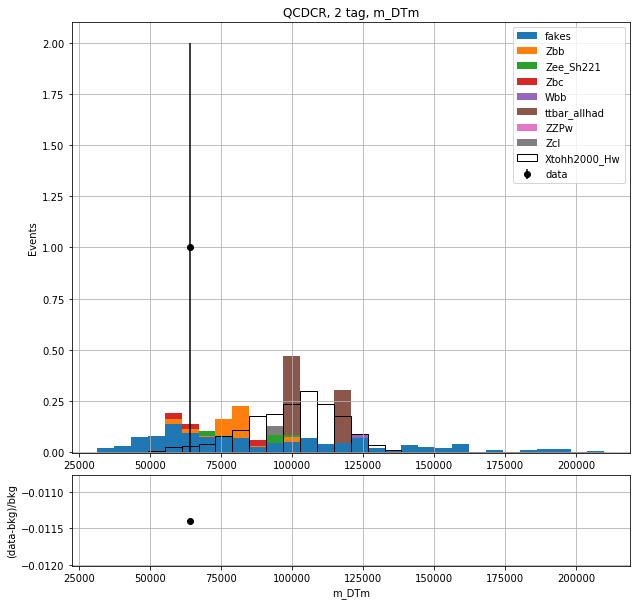

::: QCDCR 2 m_DTpt_Eff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.00000000e+00  5.13374582e-02  3.79114994e-02 -1.72227621e-04
  1.88071936e-01  5.50016582e-01  6.62936372e-01  1.62503506e+00
  2.16253265e+00  2.85706690e+00  3.25901733e+00  8.93799596e-01
  9.15959343e-01  5.50583407e-01  2.87693165e-01  3.67099047e-01
  5.94596863e-02  1.22175217e-01  5.95836639e-02 -2.22301483e-03
 -1.00803375e-03 -5.41687012e-04 -7.19070435e-04  6.16875589e-02
 -5.24520874e-05  0.00000000e+00 -9.91821289e-05 -1.05857849e-04
  0.00000000e+00  0.00000000e+00]
DIFF [        nan -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -0.64999069 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.   

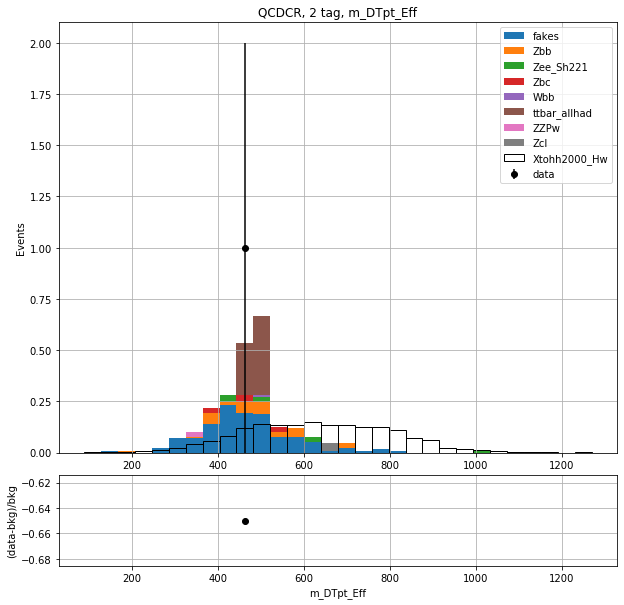

::: QCDCR 2 m_DTeta_Eff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-4.82651323e-08 -1.41977958e-04  2.94853583e-01  1.32979542e-01
  7.28497952e-01  1.14256799e-01  3.21644887e-01  5.13396960e-01
  7.14022998e-01  4.49457645e-01  1.96315974e+00  8.84014100e-01
  4.09955502e-01  5.14301752e-01  8.13031588e-01  6.19954489e-01
  5.59929982e-01  5.83809704e-01  5.95456794e-01  1.63564304e+00
  9.09047455e-01  2.52840042e-01  5.19243240e-01  4.58401851e-01
  7.71217346e-02  1.50445938e-01  1.66905403e-01  3.25062238e-01
 -1.02043152e-04 -1.48773193e-04]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.          0.78593759 -1.
 -1.  

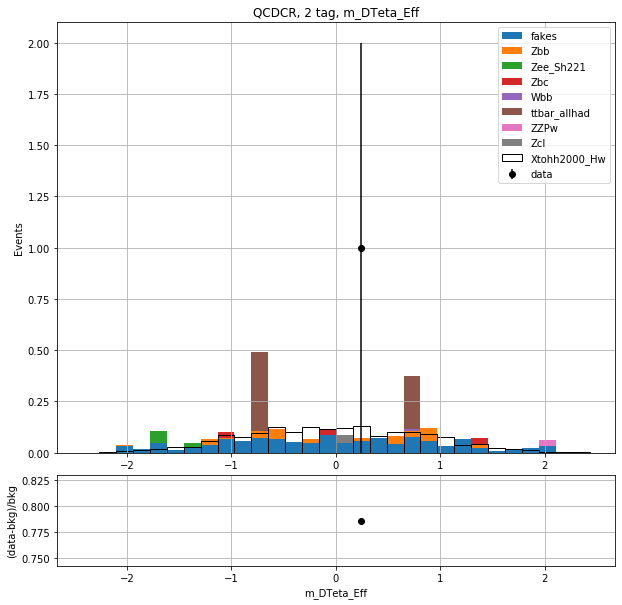

::: QCDCR 2 m_DTphi_Eff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.50054987 0.24035412 0.22826827 0.41195311 0.59991045 0.58069029
 0.60577926 0.39475603 0.53847357 0.60078668 0.36495271 0.28565049
 1.47051409 0.53954341 0.38329219 0.45642328 0.26264381 0.19085741
 0.78361972 1.01259725 0.33931743 0.44721086 0.40322127 0.25500059
 0.86392945 0.21320248 0.78108037 0.35508685 0.2425642  0.35480976]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.31996571 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


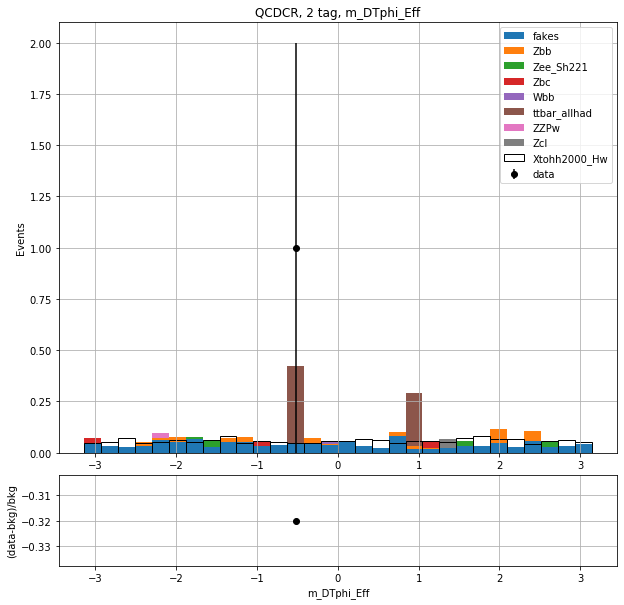

::: QCDCR 2 m_DTm_Eff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 5.46439994e-01  9.34667502e-01  2.29769401e+00  3.25585214e+00
  1.73255074e+00  1.79542314e+00  1.37096134e+00  1.09839080e+00
  8.74454264e-01  1.51219368e-01  1.68796539e-01 -2.04563141e-03
  1.13465309e-01  3.23576920e-01 -1.00326538e-03  4.88600358e-02
 -6.51359558e-04 -5.83648682e-04 -5.05447388e-05 -2.88963318e-04
 -2.64167786e-04 -1.00135803e-04 -9.25064087e-05 -1.02996826e-04
 -1.30653381e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.56478104 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.    

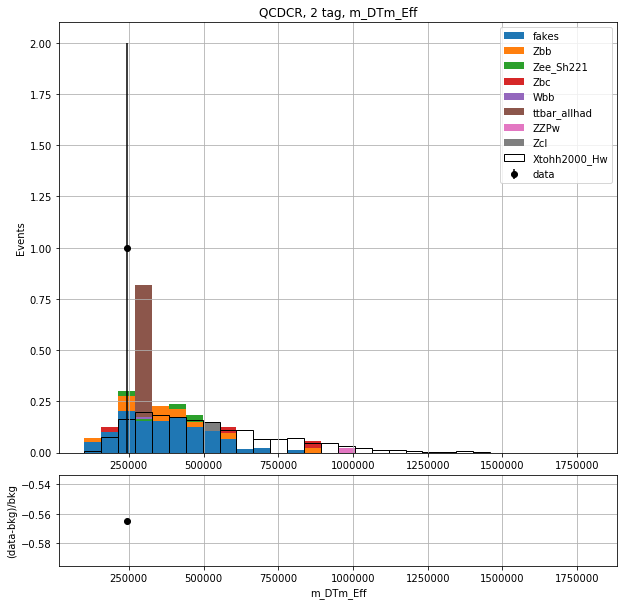

::: QCDCR 2 m_DTpt_ConEff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 5.08889556e-02  8.17351327e-02  1.07140755e+00  1.27011418e+00
  1.58463158e+00  1.44554842e+00  1.98997041e+00  1.81515336e+00
  1.90073834e+00  1.21230865e+00  3.46634388e-01  6.00466728e-01
  2.57699966e-01  3.63275461e-01  4.22963053e-01  1.02403641e-01
 -1.04017258e-02  6.14624918e-02  8.97054672e-02  5.13162613e-02
 -2.34603882e-04 -2.71797180e-04  0.00000000e+00 -2.37464905e-04
 -9.25064087e-05 -9.82284546e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.95910645e-05]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -0.47388866 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.

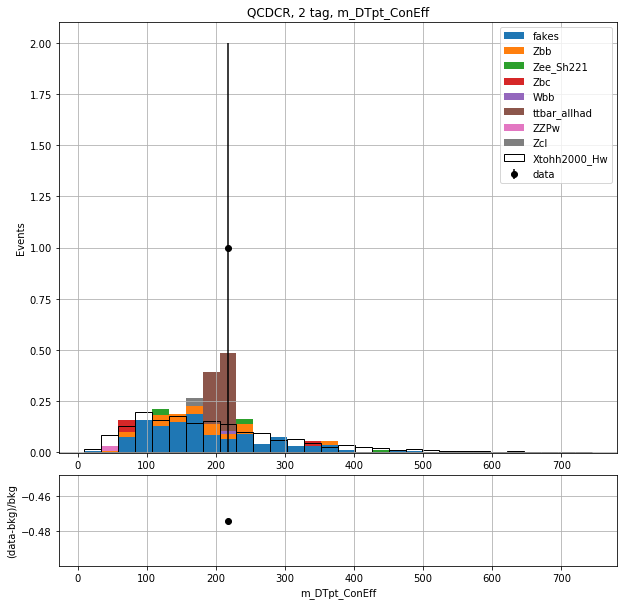

::: QCDCR 2 m_DTeta_ConEff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [-4.82651323e-08 -1.41977958e-04  2.94853583e-01  1.32979542e-01
  7.28497952e-01  1.14256799e-01  3.21644887e-01  5.13396960e-01
  7.14022998e-01  4.49457645e-01  1.96315974e+00  8.84014100e-01
  4.09955502e-01  5.14301752e-01  8.13031588e-01  6.19954489e-01
  5.59929982e-01  5.83809704e-01  5.95456794e-01  1.63564304e+00
  9.09047455e-01  2.52840042e-01  5.19243240e-01  4.58401851e-01
  7.71217346e-02  1.50445938e-01  1.66905403e-01  3.25062238e-01
 -1.02043152e-04 -1.48773193e-04]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.          0.78593759 -1.
 -1

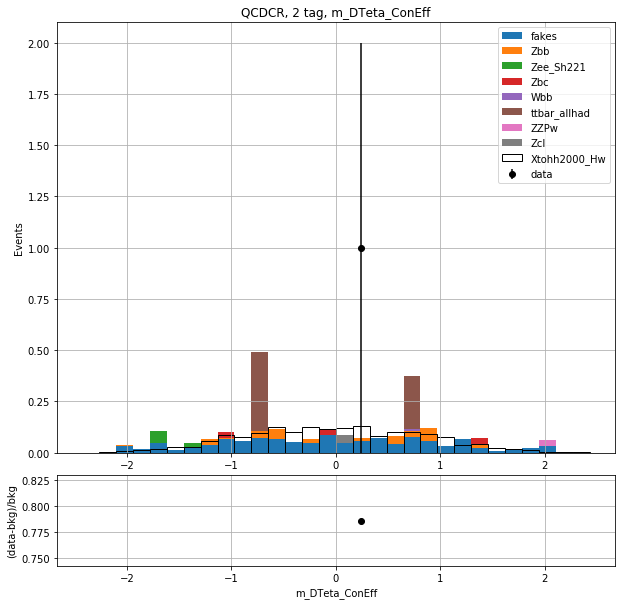

::: QCDCR 2 m_DTphi_ConEff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.50054987 0.24035412 0.22826827 0.41195311 0.59991045 0.58069029
 0.60577926 0.39475603 0.53847357 0.60078668 0.36495271 0.28565049
 1.47051409 0.53954341 0.38329219 0.45642328 0.26264381 0.19085741
 0.78361972 1.01259725 0.33931743 0.44721086 0.40322127 0.25500059
 0.86392945 0.21320248 0.78108037 0.35508685 0.2425642  0.35480976]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.31996571 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


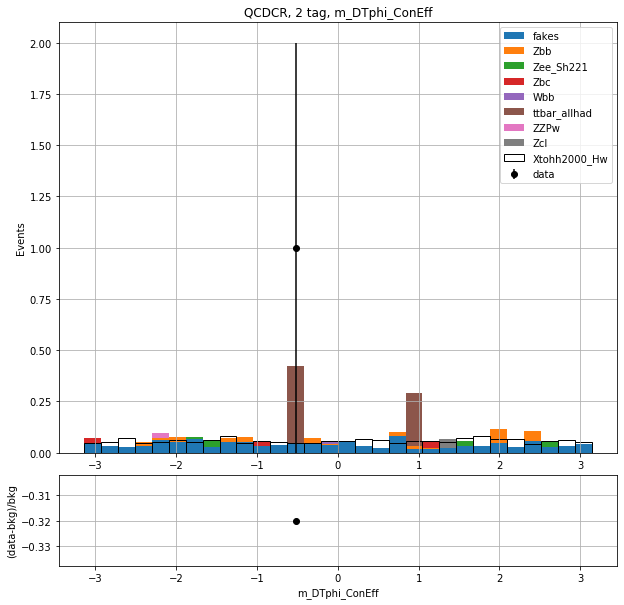

::: QCDCR 2 m_DTm_ConEff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         14.70704302  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.93200537         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan   

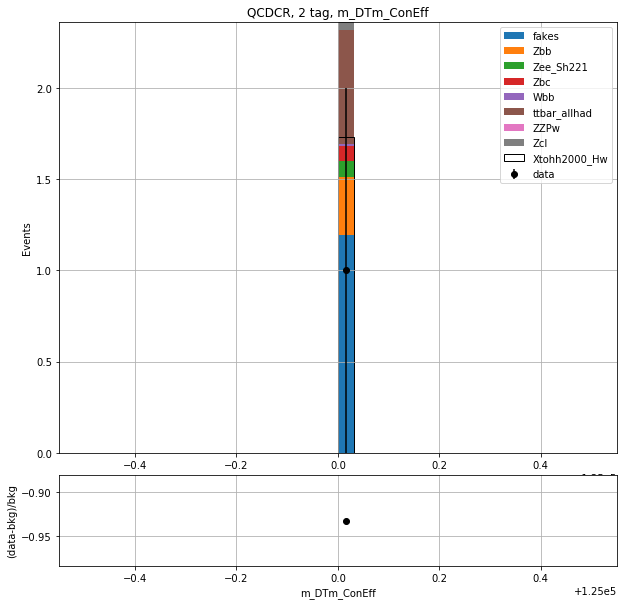

::: QCDCR 2 m_DTpt_ConVis
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 2.60520190e-01  8.77968311e-01  9.67667818e-01  1.75878482e+00
  1.10171264e+00  2.13003253e+00  1.16060471e+00  1.05611756e+00
  7.65064791e-01  1.15420311e+00  9.25753471e-01  8.52826610e-01
  3.39129448e-01  1.89712614e-01  4.33552742e-01  2.04006195e-01
  3.02367538e-01 -5.90324402e-04  1.24881744e-01  0.00000000e+00
 -1.00135803e-04  1.02924347e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.91821289e-05]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -0.13360137 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.

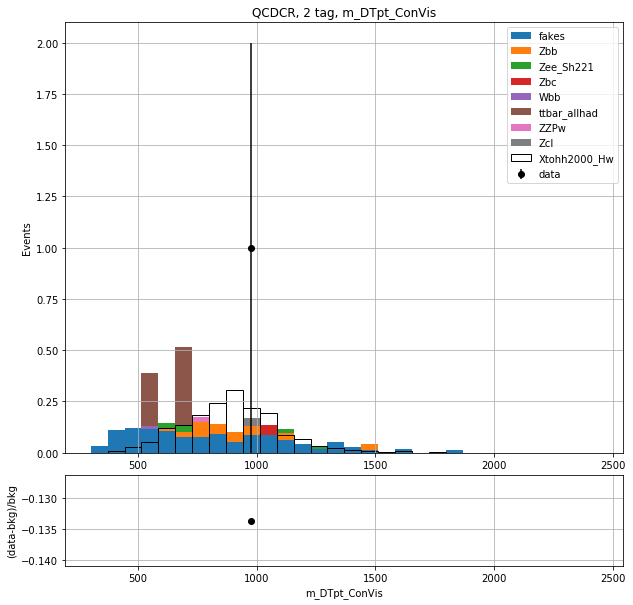

::: QCDCR 2 m_DTeta_ConVis
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.22283317 0.17996117 0.58702398 0.22956541 0.03873289 0.46110247
 0.31589697 0.48056722 0.3943013  0.85469389 1.73270402 0.75932413
 0.43450785 0.49888791 0.66357565 0.48401138 0.60591156 0.48087439
 0.42199098 0.55464801 1.7486091  0.59623486 0.35425854 0.51564976
 0.20741674 0.26642609 0.0887022  0.13579603 0.09186649 0.30096817]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.          0.65040588 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


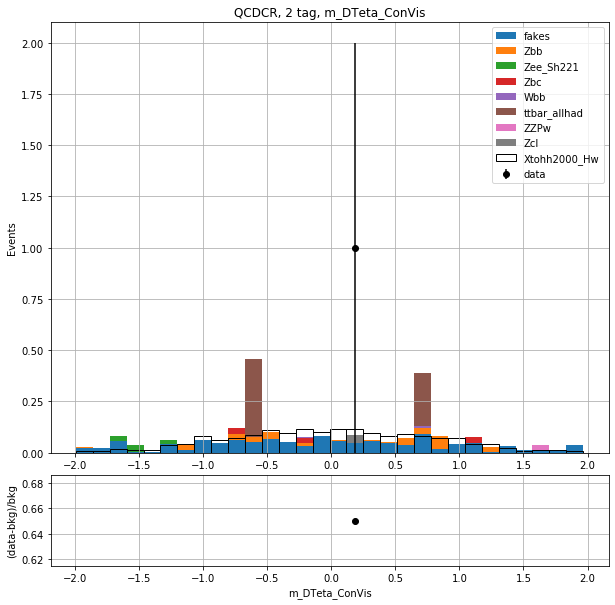

::: QCDCR 2 m_DTphi_ConVis
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.49120439 0.28000057 0.12566197 0.63183103 0.64110097 0.43392743
 0.47554979 0.52469129 0.52766632 0.61141586 0.25281024 0.42356148
 1.47352818 0.45313946 0.41508732 0.32718468 0.41355848 0.23063898
 1.40523992 0.26283202 0.39717142 0.47234518 0.45015993 0.20382118
 0.88614765 0.30821231 0.67668641 0.44630866 0.16093826 0.30461788]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.32135672 -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.        ]


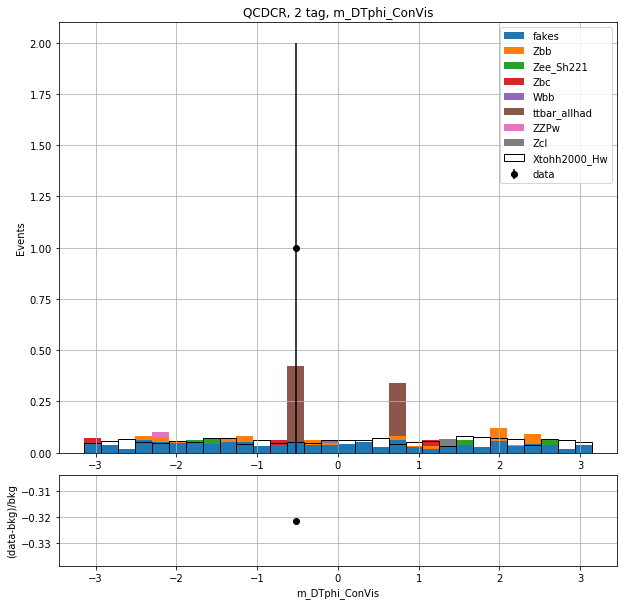

::: QCDCR 2 m_DTm_ConVis
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         14.70704302  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.93200537         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan   

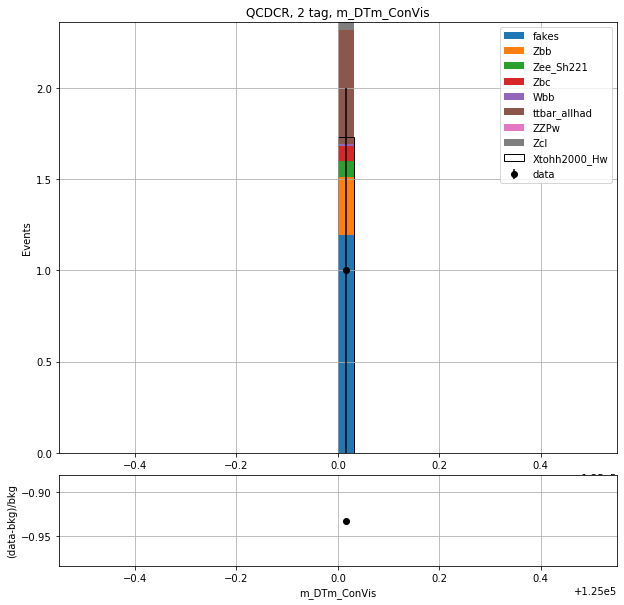

::: QCDCR 2 m_dPhiFTwDT
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
BACK [-4.07147963e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.57126391e-02  2.27149744e-02  0.00000000e+00
 -2.97389925e-05  6.23977929e-02  5.14620394e-02 -1.91032887e-04
  3.86815369e-02 -8.60165060e-03  6.21152669e-02  3.88955658e-02
 -1.00835264e-02  5.10963500e-02  7.36294994e-02  1.42465532e-01
  3.58180098e-01  7.94951320e-02  2.82006595e-01  4.21707630e-01
  5.67726906e-01  6.83092844e-01  1.59920095e+00  3.18779707e+00
  3.01245522e+00  3.96515918e+00]
DIFF [-1.                 nan         nan         nan         nan -1.
 -1.                 nan -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.  

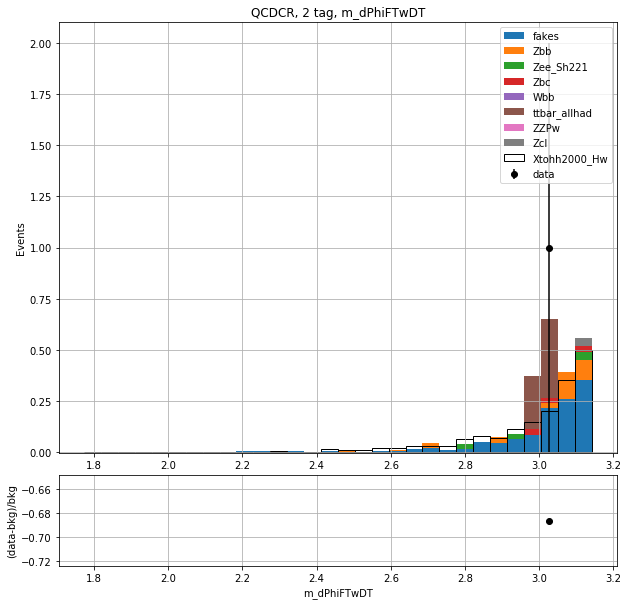

::: QCDCR 2 m_dRFJwDT
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.87634188e-02 -1.30411237e-04  6.24165796e-02  2.55177617e-02
  2.12482214e-02  3.68033201e-02  1.95515054e-01  3.81279383e-01
  6.64207552e-01  1.87501431e-01  3.36192466e+00  2.83368886e+00
  1.82463102e+00  1.20452077e+00  8.54795188e-01  7.44350553e-01
  6.33800983e-01  4.04983759e-01  4.37174484e-01  2.36951292e-01
  8.47492218e-02  9.00630951e-02  2.81305313e-01  0.00000000e+00
  7.71751404e-02  0.00000000e+00  0.00000000e+00 -1.49936676e-02
  0.00000000e+00  3.87935638e-02]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.45194399 -1.         -1.         -1.         -1.         -1.
 -1.    

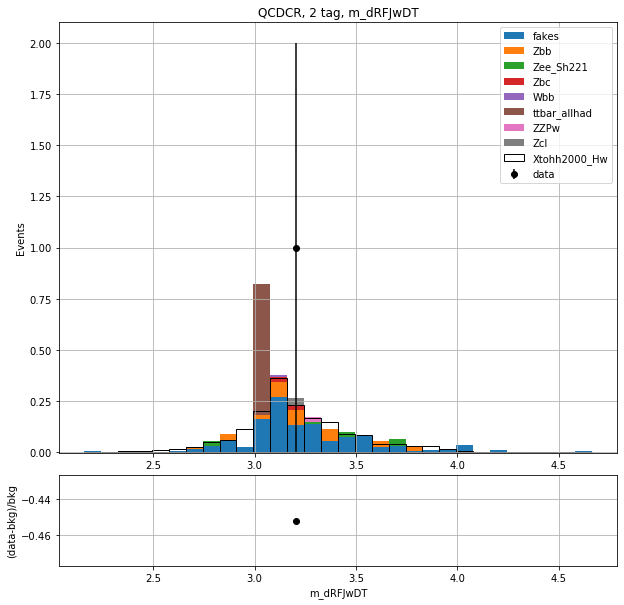

::: QCDCR 2 m_dPhiDTwMET
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
BACK [ 2.28885083  1.25500781  1.00646086  0.92911449  0.53826594  2.03028136
  0.32670784  0.15256453  0.07597208  0.12620211 -0.03419781  0.
  0.          0.          0.          0.          0.          0.
  0.         -0.01441431  0.49643796  0.25466061  0.42302585  0.43879415
  0.20229673  0.41681685  0.36414954  0.35940647  1.36655085  1.70409141]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.                 nan
         nan         nan         nan         nan         nan         nan
         nan -1.         -1.         -1.         -1.         -1.
 -1.          1.39913528 -1.         -1.         -1.         -1

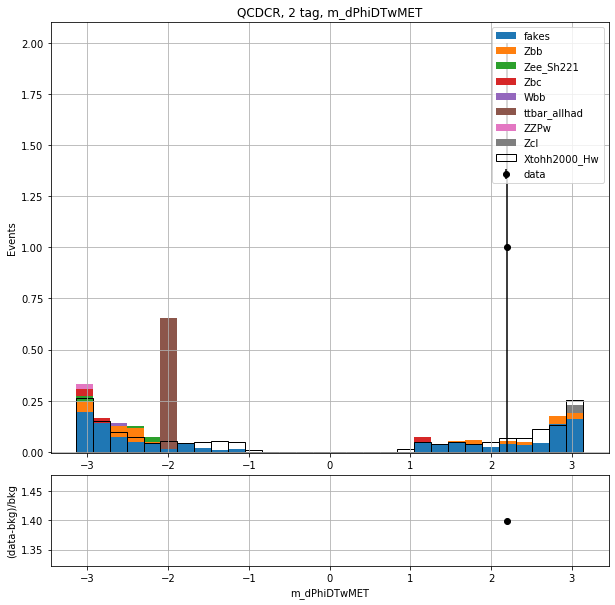

::: QCDCR 2 m_MET
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.77690351e+00  5.33383417e+00  2.61609560e+00  1.00914024e+00
  9.21614561e-01  3.71630490e-01  3.05686206e-01  5.78632355e-02
  2.04124674e-01 -8.37326050e-04 -9.55581665e-04  6.18801117e-02
  5.11617661e-02 -8.39233398e-05 -2.16484070e-04 -9.15527344e-05
 -1.70707703e-04 -1.00135803e-04 -2.95639038e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.29696655e-05 -1.95503235e-04
  0.00000000e+00 -1.30653381e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -0.81251761 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.        

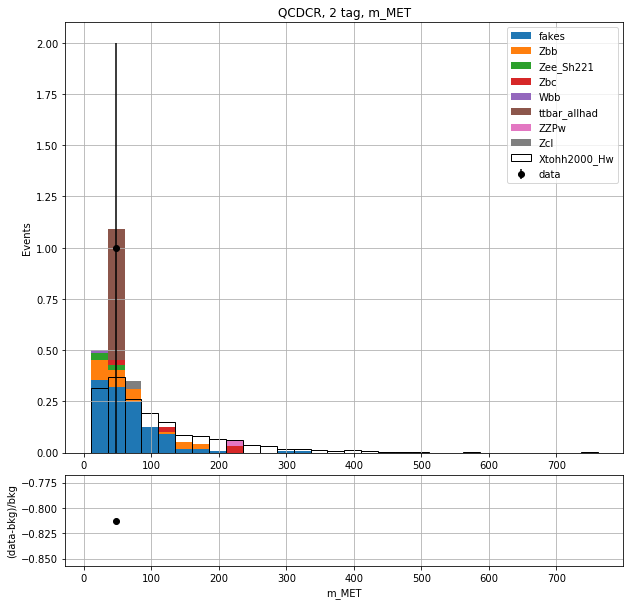

::: QCDCR 2 m_hhm
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.94634914e-01  6.08042182e-01  1.33129757e+00  1.13133104e+00
  2.66782460e+00  2.75140503e+00  7.73702711e-01  1.01041927e+00
  1.13176647e+00  7.91190132e-01  5.31023048e-01  3.10873985e-01
  4.44886208e-01  4.50839996e-02  1.75561905e-01  2.12444305e-01
  1.23468399e-01 -5.10215759e-04  5.13734818e-02  2.21604586e-01
  6.18267953e-02  5.14621735e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.87935638e-02 -1.49936676e-02  0.00000000e+00
  0.00000000e+00  6.25286102e-02]
DIFF [-1.         -1.         -1.         -1.         -0.62516276 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.        

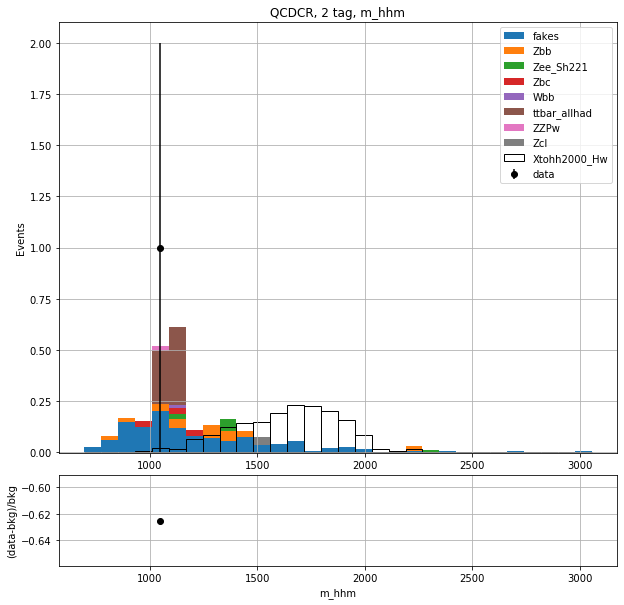

::: QCDCR 2 m_bbttpt
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.91940054e+00  5.25212755e+00  2.23406943e+00  1.77214092e+00
  1.03354962e+00  8.37947465e-01  2.49856517e-01  8.31778131e-01
  2.22774714e-01  3.40101421e-02  1.12669945e-01 -8.73565674e-04
 -1.64556503e-02  3.76274288e-02  6.21442795e-02  2.53219604e-02
 -1.93595886e-04 -1.07765198e-04  2.20115185e-02  3.86171341e-02
  0.00000000e+00 -1.11579895e-04 -2.57492065e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.00543213e-05  3.87935638e-02
  0.00000000e+00  0.00000000e+00]
DIFF [-1.         -1.         -0.55238634 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.     

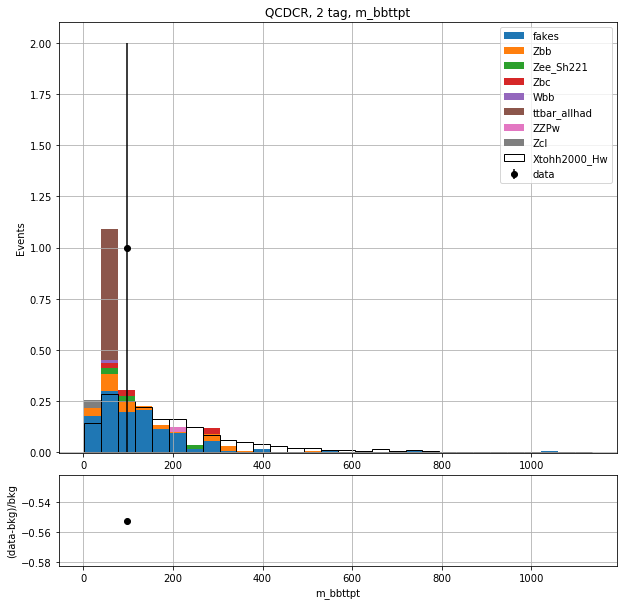

::: QCDCR 2 m_hhm_Coll
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         14.70704302  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
DIFF [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.93200537         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan     

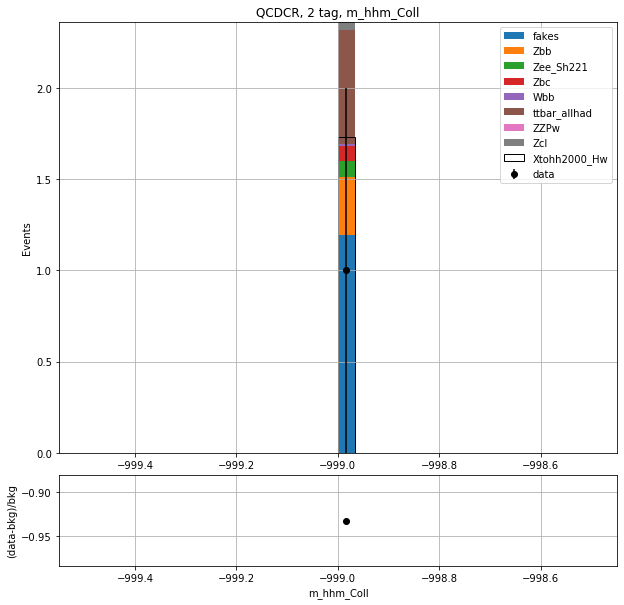

::: QCDCR 2 m_hhm_Eff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 1.59286469e-01  7.01139808e-01  1.30507064e+00  1.32249033e+00
  2.35674500e+00  2.24712456e+00  1.37236833e+00  1.07832459e+00
  7.28652589e-01  1.35625063e+00  1.84326731e-01  4.62326527e-01
  4.59143639e-01  8.26368332e-02  9.66844559e-02  2.61950493e-01
  6.07795715e-02 -6.16073608e-04  5.12399673e-02  2.83425659e-01
  0.00000000e+00  5.13629913e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.87935638e-02 -1.49936676e-02  0.00000000e+00
  0.00000000e+00  6.25286102e-02]
DIFF [-1.         -1.         -1.         -1.         -0.57568596 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.    

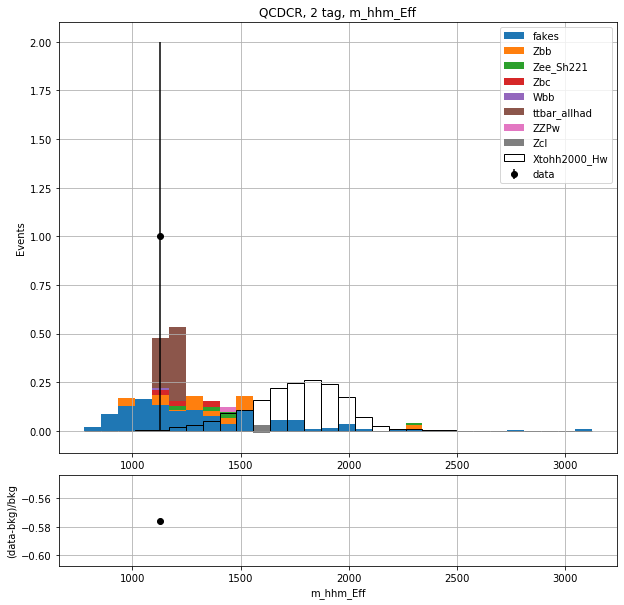

::: QCDCR 2 m_hhm_ConEff
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [ 3.84951308e-02  2.55600087e-01  1.19058281e+00  9.03115414e-01
  1.16216548e+00  1.06409936e+00  1.88296485e+00  1.38151337e+00
  2.78638808e+00  7.17403427e-01  6.87520698e-01  5.82344584e-01
  3.56352329e-01  4.00885582e-01  3.72809649e-01  2.08548009e-01
  2.26141930e-01  9.95912552e-02  3.84340286e-02  5.10034561e-02
  8.58659744e-02  6.14548624e-02  1.02541924e-01  5.12704849e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.95910645e-05]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.27615612 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1. 

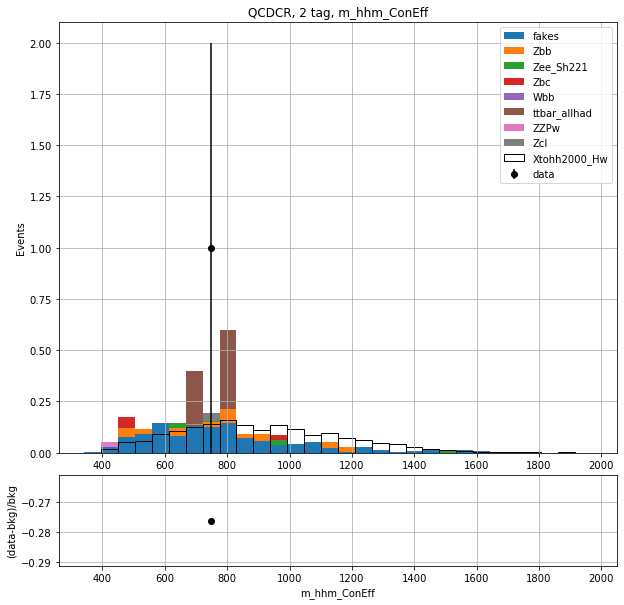

::: QCDCR 2 m_hhm_ConVis
df_data.shape (1, 3)
df_signal.shape (1499, 3)
fakes 775 1.1938269
Zbb 18 0.31873068
Zee_Sh221 4 0.08859101
Zbc 3 0.082398534
Wbb 2 0.0120642735
ttbar_allhad 2 0.64112276
ZZPw 1 0.024872046
Zcl 1 -0.039604582
DATA [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BACK [0.15862262 0.35289401 0.65120508 1.77941238 1.09310278 2.63167581
 1.4756166  1.15742244 1.54721871 0.76614322 0.38289329 0.53361022
 0.61857022 0.26468372 0.13520408 0.113554   0.11326981 0.3296586
 0.09899712 0.22145391 0.10292435 0.07758713 0.         0.
 0.         0.03879356 0.         0.         0.         0.06252861]
DIFF [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.13601122 -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.                 nan         nan
         nan -1.                 nan         nan         nan -1.        ]


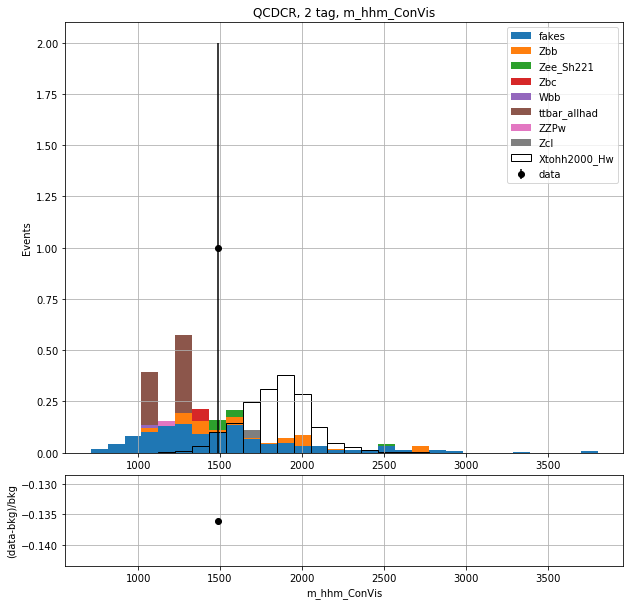

In [17]:
regions = ["SR", "QCDCR"]
tags = [0,1,2]
features = list(df_base.columns)


features.remove('sample')
features.remove('m_region')
features.remove('EventWeightNoXSec')
features.remove('EventWeight')
features.remove('EventNumber')
features.remove('m_FJNbtagJets')

#features = ['m_hhm','m_FJphi']#, 'm_FJm']#, 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm']
signal = "Xtohh2000_Hw"

for region in regions:
    for tag in tags:
        df = df_base[df_base["m_region"] == region]
        df = df[df["m_FJNbtagJets"] == tag]
        print("-->df.shape", df.shape)
        for feature in features:
            print(":::", region, tag, feature)
            df0 = df[['sample',feature,"EventWeight"]] # taking only three columns
            df1 = df0[df0["sample"]!="data"] # taking without data, (PERO TIENEN SIGNAL!!)
            df_data = df0[df0["sample"]=="data"] # taking only data
            df_signal = df0[df0["sample"]==signal] # taking only signal
            signal_weights = df_signal["EventWeight"].values
            df1 = df1[df1["sample"]!=signal] #taking only background
            hmin=df0[feature].values.min()
            hmax=df0[feature].values.max()
            
            print("df_data.shape", df_data.shape)
            print("df_signal.shape", df_signal.shape)
            d = df1["sample"].value_counts()
            
            stack_list, weights_list, names = get_stacks(d,feature)
            
            get_histogram(region,str(tag), feature, hmin, hmax, stack_list, weights_list, names,
                          df_signal[feature].values,signal_weights, signal, df_data[feature].values)
